In [2]:
#Import Libraries
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras 
import tensorflow

In [3]:
#import data
data=pd.read_excel("Concrete_Data.xls")

In [4]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': "Cement",
                    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' :"Blast_Furnace_Slag",
                    'Fly Ash (component 3)(kg in a m^3 mixture)':"Fly_Ash",
                    'Water  (component 4)(kg in a m^3 mixture)':'Water',
                    'Superplasticizer (component 5)(kg in a m^3 mixture)':"Superplasticizer",
                    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"Coarse_Aggregate",
                    'Fine Aggregate (component 7)(kg in a m^3 mixture)':"Fine_Aggregate", 
                    'Age (day)':"Age",
                    'Concrete compressive strength(MPa, megapascals) ':"Concrete_Compressive_Strength"},inplace=True)

In [7]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


##  1. Data Exploration

### 1.1 Data Description 

In [8]:
data.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_Compressive_Strength    float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_Compressive_Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
data.describe(include='all')

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [11]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [12]:
data.tail()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


In [16]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [17]:
y=data.Concrete_Compressive_Strength
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete_Compressive_Strength, dtype: float64

### 1.2 Creating Plots

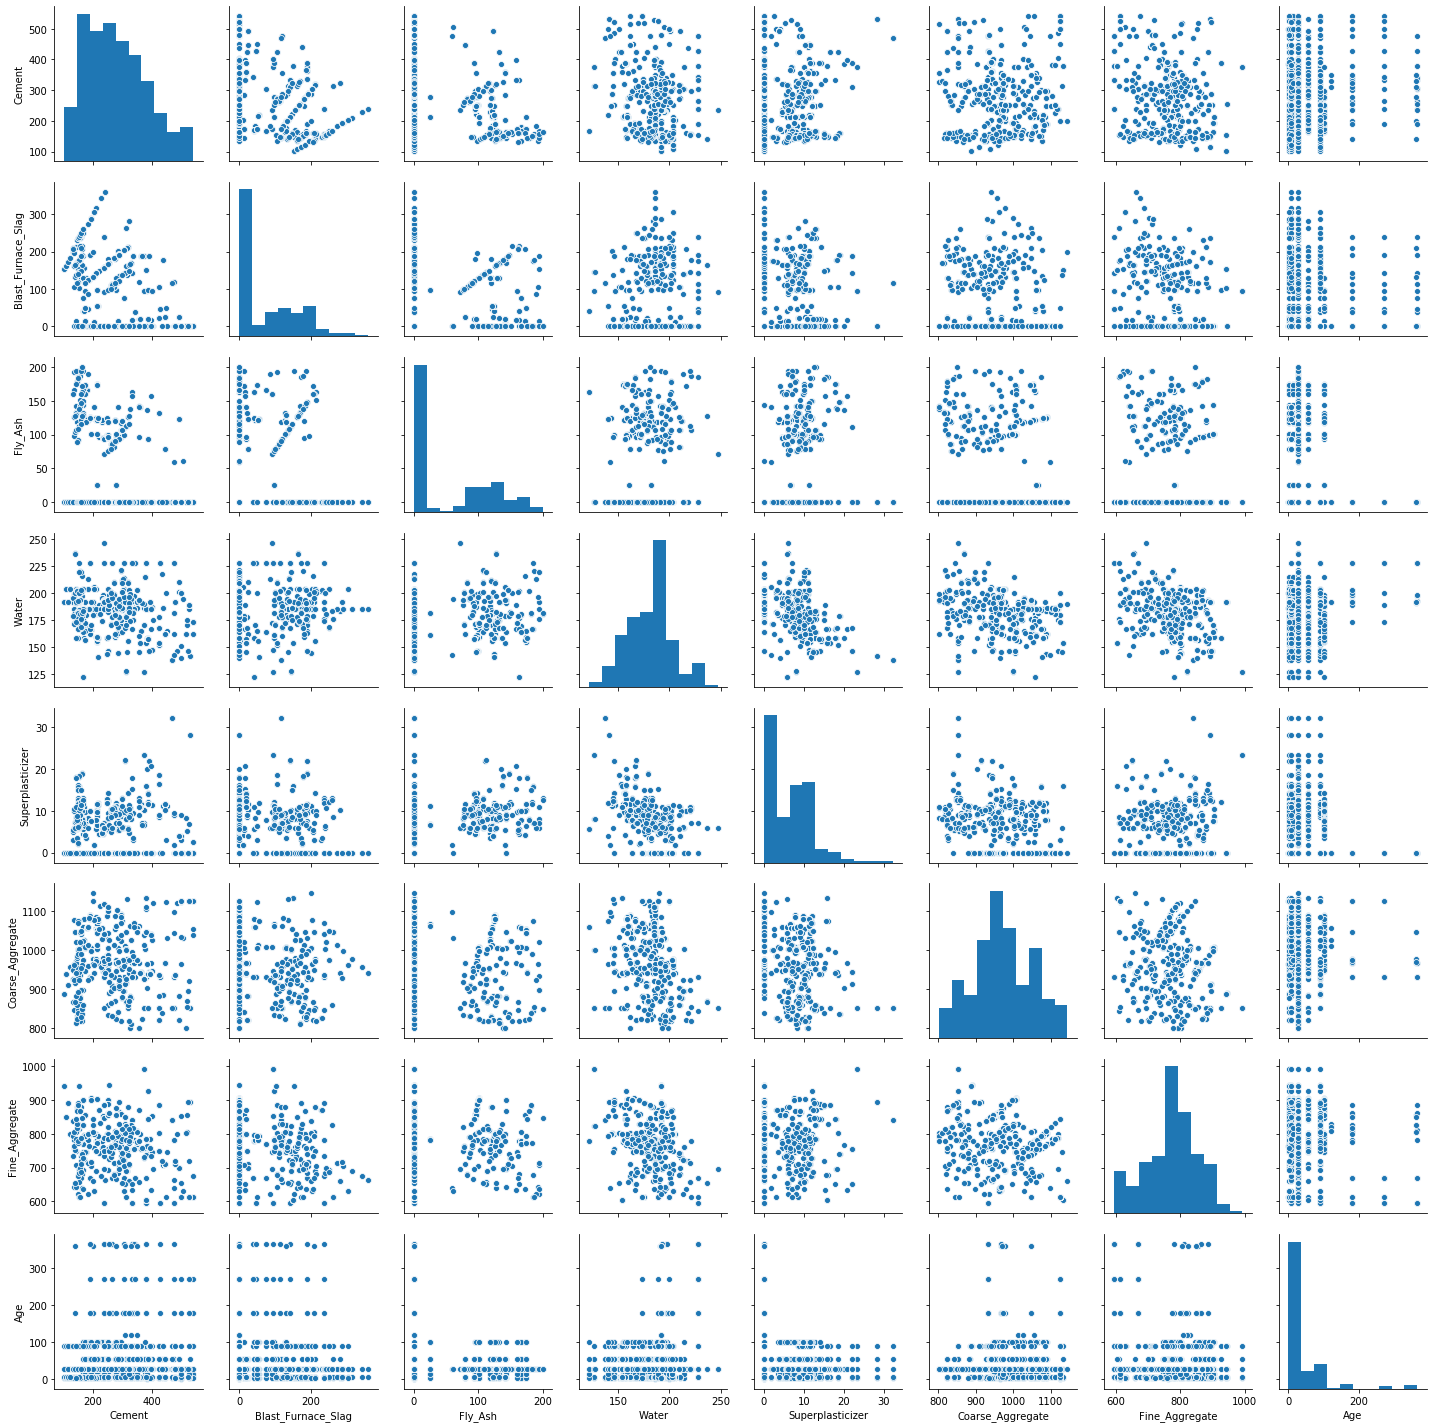

In [19]:
pairplot=sns.pairplot(X,palette="Set2")

In [20]:
pairplot.savefig("Pairplot_Independent_Variables.png",dpi=300)

### 1.3 Missing_Values_Treatment   

In [21]:
data.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_Compressive_Strength    0
dtype: int64

No missing values. So no need to perform any kind of missing value treatment here.

### 1.4 Data_Transformation

### Cement Content

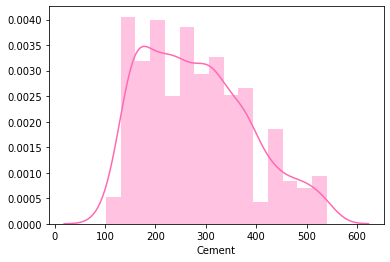

In [26]:
sns.distplot(data.Cement,color ='hotpink')
plt.show()

In [27]:
data.Cement=np.log(data.Cement)

### Blast_Furnace_Slag

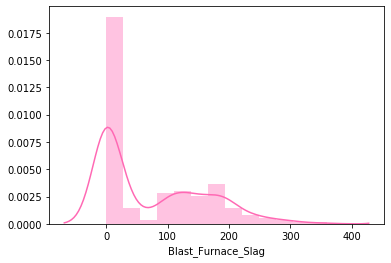

In [30]:
sns.distplot(data.Blast_Furnace_Slag,color ='hotpink')
plt.show()

In [31]:
data.Blast_Furnace_Slag.mean()

73.89548543689324

In [32]:
def Blast_Furnace_Imputer(value):
    if value==0:
        return(150)
    else:
        return(value)
        

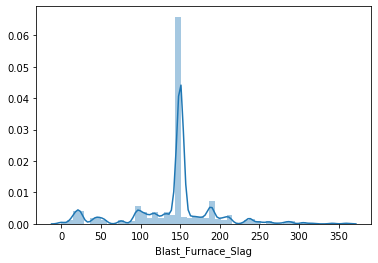

In [33]:
sns.distplot(data.Blast_Furnace_Slag.apply(lambda x: Blast_Furnace_Imputer(x)))
plt.show()

In [34]:
data.Blast_Furnace_Slag=data.Blast_Furnace_Slag.apply(lambda x: Blast_Furnace_Imputer(x))

### Flyash

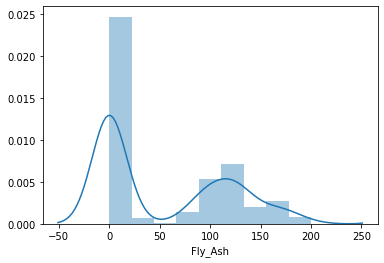

In [35]:
sns.distplot(data.Fly_Ash)
plt.show()

In [36]:
def Flyash_Imputer(value):
    if value==0:
        return(125)
    else:
        return(value)
        

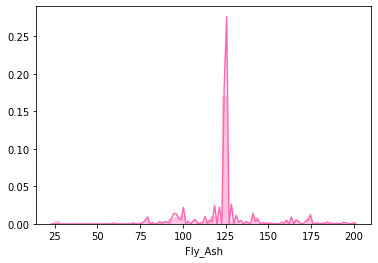

In [37]:
sns.distplot(data.Fly_Ash.apply(lambda x: Flyash_Imputer(x)),color ='hotpink')
plt.show()

In [38]:
data.Fly_Ash=data.Fly_Ash.apply(lambda x: Flyash_Imputer(x))

### Age

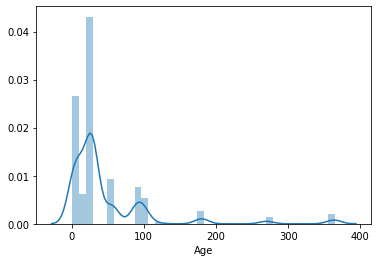

In [39]:
sns.distplot(data.Age)
plt.show()

In [40]:
data.Age=data.Age/365.0

## Processed_Data

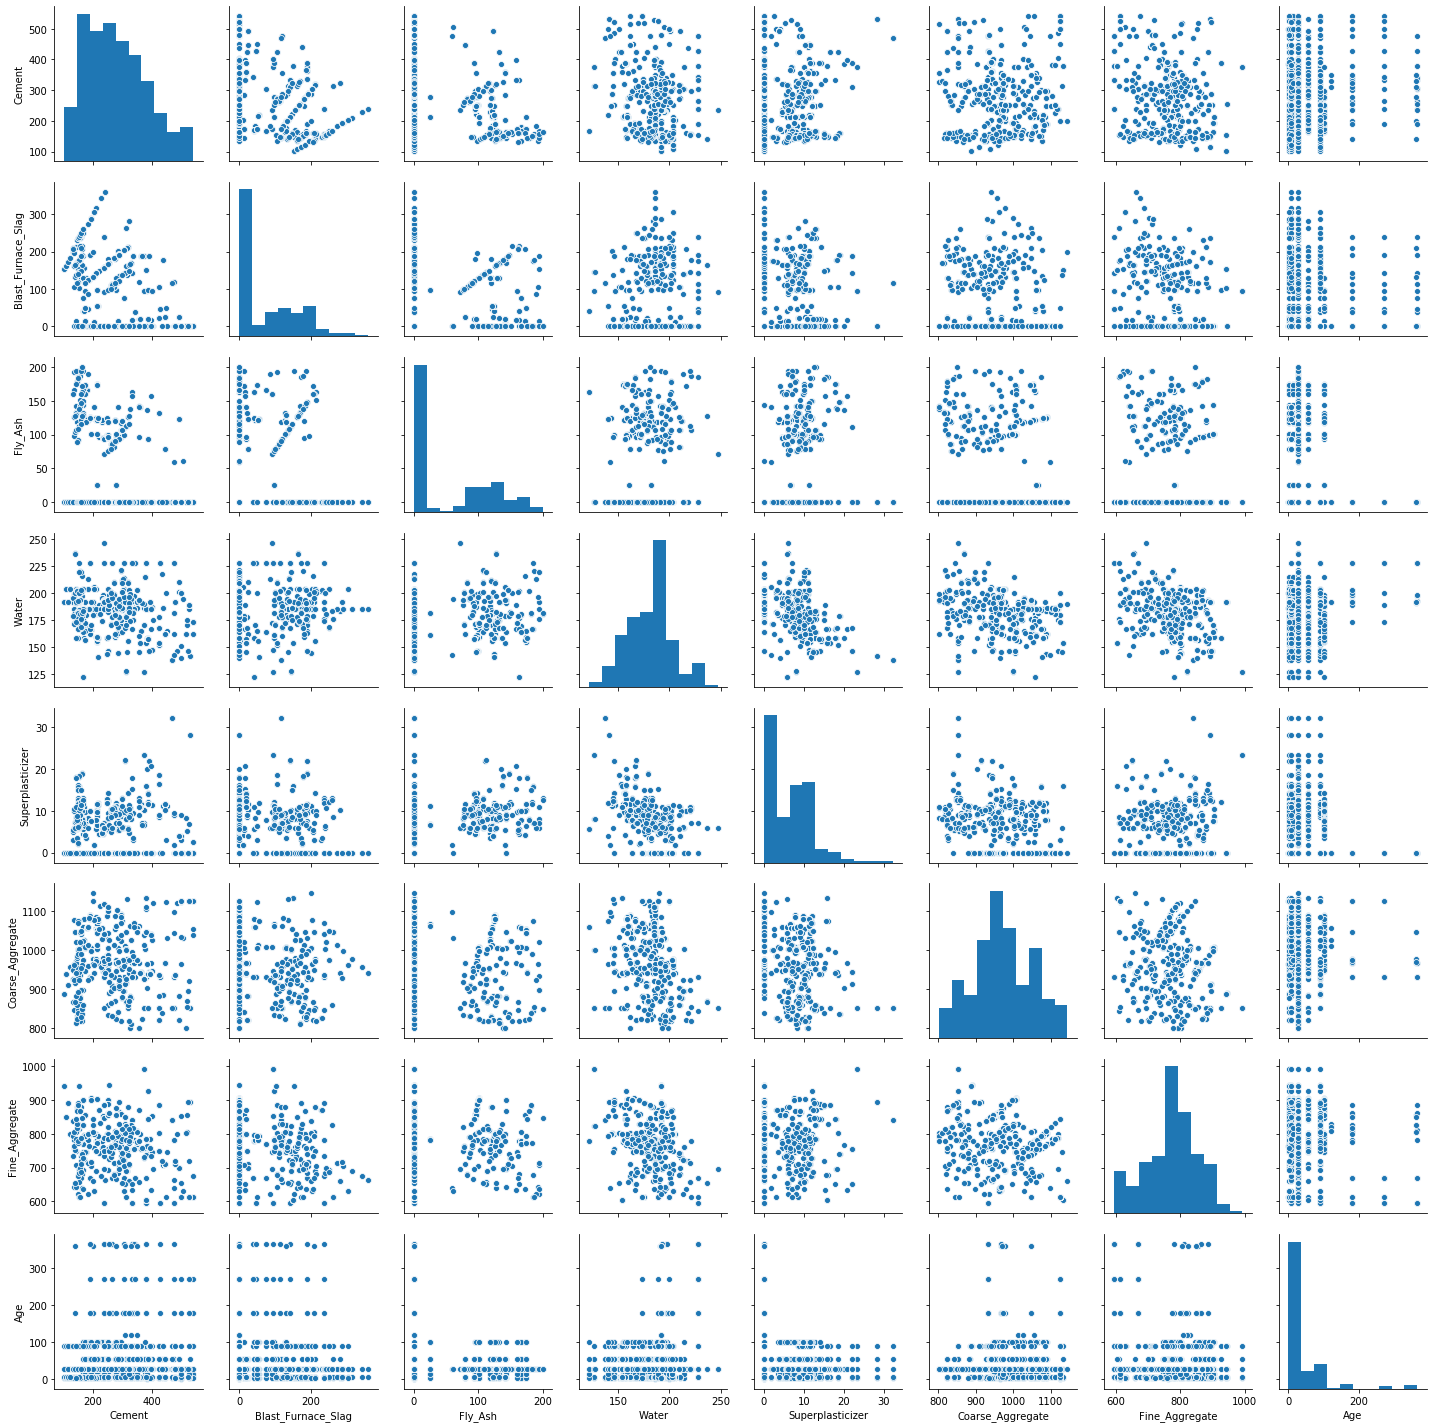

In [41]:
pairplot_2=sns.pairplot(X)

In [42]:
pairplot_2.savefig("Processed_Pairplot.png",dpi=300)

In [73]:
data.to_csv("Processed_Data.csv",index=False)

## 2. Modelling

### 2.1 Base_Model

In [43]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)

In [44]:
y=data["Concrete_Compressive_Strength"]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [50]:
X_train=mm.fit_transform(X_train)

In [51]:
X_test=mm.transform(X_test)

In [52]:
from keras.layers import Dense
from keras.models import Sequential

In [53]:
Neural_Network=Sequential()

Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))#1st Hidden Layer
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform')) #2nd Hidden Layer
Neural_Network.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))# Output Layer
Neural_Network.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
Neural_Network.fit(X_train,y_train,batch_size=40, epochs=100)

Epoch 1/100
824/824 [==============================] - 0s 30us/step - loss: 125.2573
Epoch 2/100
824/824 [==============================] - 0s 28us/step - loss: 125.2244
Epoch 3/100
824/824 [==============================] - 0s 25us/step - loss: 125.1716
Epoch 4/100
824/824 [==============================] - 0s 25us/step - loss: 125.2382
Epoch 5/100
824/824 [==============================] - 0s 23us/step - loss: 125.1526
Epoch 6/100
824/824 [==============================] - 0s 28us/step - loss: 125.1251
Epoch 7/100
824/824 [==============================] - 0s 31us/step - loss: 125.1135
Epoch 8/100
824/824 [==============================] - 0s 23us/step - loss: 125.1163
Epoch 9/100
824/824 [==============================] - 0s 28us/step - loss: 125.1806
Epoch 10/100
824/824 [==============================] - 0s 30us/step - loss: 125.0693
Epoch 11/100
824/824 [==============================] - 0s 28us/step - loss: 125.0570
Epoch 12/100
824/824 [==============================] - 0s 29us

824/824 [==============================] - 0s 40us/step - loss: 123.2158
Epoch 97/100
824/824 [==============================] - 0s 42us/step - loss: 123.3357
Epoch 98/100
824/824 [==============================] - 0s 36us/step - loss: 123.4636
Epoch 99/100
824/824 [==============================] - 0s 54us/step - loss: 123.1350
Epoch 100/100
824/824 [==============================] - 0s 46us/step - loss: 123.1665


## Prediction

In [58]:
pred=Neural_Network.predict(X_test)
pred

array([[18.538809],
       [21.426157],
       [28.061834],
       [23.949333],
       [55.56281 ],
       [51.667824],
       [48.602276],
       [17.065722],
       [44.590477],
       [35.34753 ],
       [23.3786  ],
       [31.13191 ],
       [16.044292],
       [75.71495 ],
       [24.69253 ],
       [31.252272],
       [25.214308],
       [34.960888],
       [14.103591],
       [21.8485  ],
       [28.77423 ],
       [33.824635],
       [40.754215],
       [30.595007],
       [58.36751 ],
       [37.35752 ],
       [31.784155],
       [28.491629],
       [38.356182],
       [47.52277 ],
       [25.323965],
       [81.24339 ],
       [12.985125],
       [51.410507],
       [24.777285],
       [27.508684],
       [34.49056 ],
       [47.293297],
       [28.559698],
       [32.233475],
       [41.058113],
       [36.25085 ],
       [60.26459 ],
       [48.621014],
       [48.01201 ],
       [27.908552],
       [35.967007],
       [28.614103],
       [45.903477],
       [40.519123],


## Evaluation

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(y_test,pred)

158.9254599669158

In [61]:
mean_squared_error(y_test,pred)

158.9254599669158

In [62]:
mean_squared_error(y_test,pred)

158.9254599669158

In [63]:
mean_squared_error(y_test,pred)

158.9254599669158

### Cross Validation

In [64]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [65]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [66]:

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=40)
results = cross_val_score(estimator, X_train, y_train, cv=15)


Epoch 1/100
769/769 [==============================] - 0s 198us/step - loss: 1521.2393
Epoch 2/100
769/769 [==============================] - 0s 27us/step - loss: 1519.5027
Epoch 3/100
769/769 [==============================] - 0s 35us/step - loss: 1517.0639
Epoch 4/100
769/769 [==============================] - 0s 30us/step - loss: 1513.1953
Epoch 5/100
769/769 [==============================] - 0s 35us/step - loss: 1506.9706
Epoch 6/100
769/769 [==============================] - 0s 35us/step - loss: 1497.0727
Epoch 7/100
769/769 [==============================] - 0s 31us/step - loss: 1482.6733
Epoch 8/100
769/769 [==============================] - 0s 32us/step - loss: 1462.3185
Epoch 9/100
769/769 [==============================] - 0s 32us/step - loss: 1435.3381
Epoch 10/100
769/769 [==============================] - 0s 29us/step - loss: 1400.4742
Epoch 11/100
769/769 [==============================] - 0s 42us/step - loss: 1357.8164
Epoch 12/100
769/769 [=============================

769/769 [==============================] - 0s 43us/step - loss: 192.6583
Epoch 97/100
769/769 [==============================] - 0s 48us/step - loss: 191.6304
Epoch 98/100
769/769 [==============================] - 0s 48us/step - loss: 190.7464
Epoch 99/100
769/769 [==============================] - 0s 42us/step - loss: 189.7816
Epoch 100/100
55/55 [==============================] - 0s 1ms/step
Epoch 1/100
769/769 [==============================] - 0s 239us/step - loss: 1561.3489
Epoch 2/100
769/769 [==============================] - 0s 30us/step - loss: 1559.4899
Epoch 3/100
769/769 [==============================] - 0s 38us/step - loss: 1556.7925
Epoch 4/100
769/769 [==============================] - 0s 28us/step - loss: 1552.4828
Epoch 5/100
769/769 [==============================] - 0s 36us/step - loss: 1545.5221
Epoch 6/100
769/769 [==============================] - 0s 30us/step - loss: 1534.9763
Epoch 7/100
769/769 [==============================] - 0s 35us/step - loss: 1519.6067

769/769 [==============================] - 0s 40us/step - loss: 199.0183
Epoch 91/100
769/769 [==============================] - 0s 35us/step - loss: 198.1867
Epoch 92/100
769/769 [==============================] - 0s 43us/step - loss: 197.2139
Epoch 93/100
769/769 [==============================] - 0s 42us/step - loss: 196.3279
Epoch 94/100
769/769 [==============================] - 0s 36us/step - loss: 195.2216
Epoch 95/100
769/769 [==============================] - 0s 34us/step - loss: 194.2897
Epoch 96/100
769/769 [==============================] - 0s 27us/step - loss: 193.3497
Epoch 97/100
769/769 [==============================] - 0s 35us/step - loss: 192.3529
Epoch 98/100
769/769 [==============================] - 0s 35us/step - loss: 191.3384
Epoch 99/100
769/769 [==============================] - 0s 26us/step - loss: 190.4142
Epoch 100/100
55/55 [==============================] - 0s 1ms/step
Epoch 1/100
769/769 [==============================] - 0s 250us/step - loss: 1567.5798

769/769 [==============================] - 0s 31us/step - loss: 1567.5798
Epoch 84/100
769/769 [==============================] - 0s 30us/step - loss: 1567.5798
Epoch 85/100
769/769 [==============================] - 0s 31us/step - loss: 1567.5798
Epoch 86/100
769/769 [==============================] - 0s 30us/step - loss: 1567.5798
Epoch 87/100
769/769 [==============================] - 0s 30us/step - loss: 1567.5798
Epoch 88/100
769/769 [==============================] - 0s 34us/step - loss: 1567.5798
Epoch 89/100
769/769 [==============================] - 0s 38us/step - loss: 1567.5798
Epoch 90/100
769/769 [==============================] - 0s 43us/step - loss: 1567.5798
Epoch 91/100
769/769 [==============================] - 0s 38us/step - loss: 1567.5798
Epoch 92/100
769/769 [==============================] - 0s 36us/step - loss: 1567.5798
Epoch 93/100
769/769 [==============================] - 0s 32us/step - loss: 1567.5798
Epoch 94/100
769/769 [==============================] - 

769/769 [==============================] - 0s 39us/step - loss: 234.9166
Epoch 78/100
769/769 [==============================] - 0s 40us/step - loss: 234.3292
Epoch 79/100
769/769 [==============================] - 0s 42us/step - loss: 233.7298
Epoch 80/100
769/769 [==============================] - 0s 35us/step - loss: 233.2505
Epoch 81/100
769/769 [==============================] - 0s 44us/step - loss: 232.8035
Epoch 82/100
769/769 [==============================] - 0s 35us/step - loss: 232.0043
Epoch 83/100
769/769 [==============================] - 0s 30us/step - loss: 231.4287
Epoch 84/100
769/769 [==============================] - 0s 32us/step - loss: 230.8349
Epoch 85/100
769/769 [==============================] - 0s 30us/step - loss: 230.2598
Epoch 86/100
769/769 [==============================] - 0s 38us/step - loss: 229.6641
Epoch 87/100
769/769 [==============================] - 0s 40us/step - loss: 229.0749
Epoch 88/100
769/769 [==============================] - 0s 38us/ste

769/769 [==============================] - 0s 34us/step - loss: 218.9601
Epoch 72/100
769/769 [==============================] - 0s 32us/step - loss: 218.0643
Epoch 73/100
769/769 [==============================] - 0s 35us/step - loss: 217.2151
Epoch 74/100
769/769 [==============================] - 0s 31us/step - loss: 216.3121
Epoch 75/100
769/769 [==============================] - 0s 39us/step - loss: 215.4698
Epoch 76/100
769/769 [==============================] - 0s 34us/step - loss: 214.6289
Epoch 77/100
769/769 [==============================] - 0s 32us/step - loss: 213.6538
Epoch 78/100
769/769 [==============================] - 0s 27us/step - loss: 212.7966
Epoch 79/100
769/769 [==============================] - 0s 31us/step - loss: 211.9380
Epoch 80/100
769/769 [==============================] - 0s 29us/step - loss: 210.9695
Epoch 81/100
769/769 [==============================] - 0s 31us/step - loss: 210.0328
Epoch 82/100
769/769 [==============================] - 0s 32us/ste

769/769 [==============================] - 0s 34us/step - loss: 243.2930
Epoch 66/100
769/769 [==============================] - 0s 34us/step - loss: 242.8711
Epoch 67/100
769/769 [==============================] - 0s 35us/step - loss: 242.4256
Epoch 68/100
769/769 [==============================] - 0s 31us/step - loss: 241.9952
Epoch 69/100
769/769 [==============================] - 0s 32us/step - loss: 241.5884
Epoch 70/100
769/769 [==============================] - 0s 31us/step - loss: 241.0528
Epoch 71/100
769/769 [==============================] - 0s 34us/step - loss: 240.6749
Epoch 72/100
769/769 [==============================] - 0s 34us/step - loss: 240.2451
Epoch 73/100
769/769 [==============================] - 0s 29us/step - loss: 239.7812
Epoch 74/100
769/769 [==============================] - 0s 30us/step - loss: 239.3452
Epoch 75/100
769/769 [==============================] - 0s 30us/step - loss: 238.9073
Epoch 76/100
769/769 [==============================] - 0s 31us/ste

769/769 [==============================] - 0s 54us/step - loss: 235.6986
Epoch 60/100
769/769 [==============================] - 0s 49us/step - loss: 234.9917
Epoch 61/100
769/769 [==============================] - 0s 53us/step - loss: 234.3157
Epoch 62/100
769/769 [==============================] - 0s 54us/step - loss: 233.6894
Epoch 63/100
769/769 [==============================] - 0s 64us/step - loss: 232.9378
Epoch 64/100
769/769 [==============================] - 0s 62us/step - loss: 232.2176
Epoch 65/100
769/769 [==============================] - 0s 58us/step - loss: 231.5138
Epoch 66/100
769/769 [==============================] - 0s 48us/step - loss: 230.7211
Epoch 67/100
769/769 [==============================] - 0s 65us/step - loss: 230.1804
Epoch 68/100
769/769 [==============================] - 0s 54us/step - loss: 229.4049
Epoch 69/100
769/769 [==============================] - 0s 57us/step - loss: 228.6573
Epoch 70/100
769/769 [==============================] - 0s 70us/ste

769/769 [==============================] - 0s 57us/step - loss: 251.9313
Epoch 54/100
769/769 [==============================] - 0s 62us/step - loss: 251.4010
Epoch 55/100
769/769 [==============================] - 0s 54us/step - loss: 250.9066
Epoch 56/100
769/769 [==============================] - 0s 60us/step - loss: 250.4783
Epoch 57/100
769/769 [==============================] - 0s 64us/step - loss: 250.0203
Epoch 58/100
769/769 [==============================] - 0s 49us/step - loss: 249.4183
Epoch 59/100
769/769 [==============================] - 0s 49us/step - loss: 248.9632
Epoch 60/100
769/769 [==============================] - 0s 51us/step - loss: 248.5393
Epoch 61/100
769/769 [==============================] - 0s 53us/step - loss: 247.9518
Epoch 62/100
769/769 [==============================] - 0s 45us/step - loss: 247.4059
Epoch 63/100
769/769 [==============================] - 0s 40us/step - loss: 246.8886
Epoch 64/100
769/769 [==============================] - 0s 48us/ste

769/769 [==============================] - 0s 34us/step - loss: 1549.2703
Epoch 47/100
769/769 [==============================] - 0s 35us/step - loss: 1549.2703
Epoch 48/100
769/769 [==============================] - 0s 35us/step - loss: 1549.2703
Epoch 49/100
769/769 [==============================] - 0s 34us/step - loss: 1549.2703
Epoch 50/100
769/769 [==============================] - 0s 32us/step - loss: 1549.2703
Epoch 51/100
769/769 [==============================] - 0s 41us/step - loss: 1549.2703
Epoch 52/100
769/769 [==============================] - 0s 47us/step - loss: 1549.2702
Epoch 53/100
769/769 [==============================] - 0s 44us/step - loss: 1549.2703
Epoch 54/100
769/769 [==============================] - 0s 45us/step - loss: 1549.2703
Epoch 55/100
769/769 [==============================] - ETA: 0s - loss: 1825.18 - 0s 47us/step - loss: 1549.2703
Epoch 56/100
769/769 [==============================] - 0s 32us/step - loss: 1549.2703
Epoch 57/100
769/769 [========

769/769 [==============================] - 0s 47us/step - loss: 242.9566
Epoch 40/100
769/769 [==============================] - 0s 38us/step - loss: 242.0869
Epoch 41/100
769/769 [==============================] - 0s 35us/step - loss: 241.2465
Epoch 42/100
769/769 [==============================] - 0s 29us/step - loss: 240.4554
Epoch 43/100
769/769 [==============================] - 0s 32us/step - loss: 239.6588
Epoch 44/100
769/769 [==============================] - 0s 31us/step - loss: 238.8130
Epoch 45/100
769/769 [==============================] - 0s 34us/step - loss: 237.9283
Epoch 46/100
769/769 [==============================] - 0s 30us/step - loss: 237.0920
Epoch 47/100
769/769 [==============================] - 0s 31us/step - loss: 236.2293
Epoch 48/100
769/769 [==============================] - 0s 29us/step - loss: 235.4299
Epoch 49/100
769/769 [==============================] - 0s 32us/step - loss: 234.5999
Epoch 50/100
769/769 [==============================] - 0s 29us/ste

769/769 [==============================] - 0s 38us/step - loss: 656.1266
Epoch 34/100
769/769 [==============================] - 0s 44us/step - loss: 610.3479
Epoch 35/100
769/769 [==============================] - 0s 36us/step - loss: 567.0872
Epoch 36/100
769/769 [==============================] - 0s 34us/step - loss: 526.3023
Epoch 37/100
769/769 [==============================] - 0s 38us/step - loss: 488.0167
Epoch 38/100
769/769 [==============================] - 0s 34us/step - loss: 452.9046
Epoch 39/100
769/769 [==============================] - 0s 32us/step - loss: 421.7841
Epoch 40/100
769/769 [==============================] - 0s 43us/step - loss: 394.5505
Epoch 41/100
769/769 [==============================] - 0s 45us/step - loss: 369.9142
Epoch 42/100
769/769 [==============================] - 0s 43us/step - loss: 348.2795
Epoch 43/100
769/769 [==============================] - 0s 42us/step - loss: 330.2971
Epoch 44/100
769/769 [==============================] - 0s 41us/ste

769/769 [==============================] - 0s 40us/step - loss: 606.8627
Epoch 28/100
769/769 [==============================] - 0s 39us/step - loss: 549.9384
Epoch 29/100
769/769 [==============================] - 0s 15us/step - loss: 498.9306
Epoch 30/100
769/769 [==============================] - 0s 42us/step - loss: 451.8045
Epoch 31/100
769/769 [==============================] - 0s 57us/step - loss: 410.7667
Epoch 32/100
769/769 [==============================] - 0s 47us/step - loss: 375.7986
Epoch 33/100
769/769 [==============================] - 0s 44us/step - loss: 346.3081
Epoch 34/100
769/769 [==============================] - 0s 44us/step - loss: 321.7350
Epoch 35/100
769/769 [==============================] - 0s 39us/step - loss: 301.9894
Epoch 36/100
769/769 [==============================] - 0s 34us/step - loss: 287.0054
Epoch 37/100
769/769 [==============================] - 0s 32us/step - loss: 275.8498
Epoch 38/100
769/769 [==============================] - 0s 40us/ste

769/769 [==============================] - 0s 40us/step - loss: 1209.2083
Epoch 22/100
769/769 [==============================] - 0s 39us/step - loss: 1166.4067
Epoch 23/100
769/769 [==============================] - 0s 41us/step - loss: 1120.7634
Epoch 24/100
769/769 [==============================] - 0s 34us/step - loss: 1073.4514
Epoch 25/100
769/769 [==============================] - 0s 32us/step - loss: 1024.8998
Epoch 26/100
769/769 [==============================] - 0s 42us/step - loss: 974.2852
Epoch 27/100
769/769 [==============================] - 0s 44us/step - loss: 923.6263
Epoch 28/100
769/769 [==============================] - 0s 43us/step - loss: 871.9712
Epoch 29/100
769/769 [==============================] - 0s 49us/step - loss: 820.1812
Epoch 30/100
769/769 [==============================] - 0s 41us/step - loss: 770.0699
Epoch 31/100
769/769 [==============================] - 0s 34us/step - loss: 719.9032
Epoch 32/100
769/769 [==============================] - 0s 41u

769/769 [==============================] - 0s 38us/step - loss: 1550.6629
Epoch 16/100
769/769 [==============================] - 0s 39us/step - loss: 1550.6629
Epoch 17/100
769/769 [==============================] - 0s 39us/step - loss: 1550.6629
Epoch 18/100
769/769 [==============================] - 0s 36us/step - loss: 1550.6629
Epoch 19/100
769/769 [==============================] - 0s 34us/step - loss: 1550.6629
Epoch 20/100
769/769 [==============================] - 0s 38us/step - loss: 1550.6629
Epoch 21/100
769/769 [==============================] - 0s 39us/step - loss: 1550.6629
Epoch 22/100
769/769 [==============================] - 0s 36us/step - loss: 1550.6629
Epoch 23/100
769/769 [==============================] - 0s 32us/step - loss: 1550.6629
Epoch 24/100
769/769 [==============================] - 0s 42us/step - loss: 1550.6630
Epoch 25/100
769/769 [==============================] - 0s 45us/step - loss: 1550.6629
Epoch 26/100
769/769 [==============================] - 

770/770 [==============================] - 0s 39us/step - loss: 1572.4677
Epoch 9/100
770/770 [==============================] - 0s 38us/step - loss: 1572.4677
Epoch 10/100
770/770 [==============================] - 0s 34us/step - loss: 1572.4677
Epoch 11/100
770/770 [==============================] - 0s 36us/step - loss: 1572.4678
Epoch 12/100
770/770 [==============================] - 0s 34us/step - loss: 1572.4678
Epoch 13/100
770/770 [==============================] - 0s 32us/step - loss: 1572.4678
Epoch 14/100
770/770 [==============================] - 0s 31us/step - loss: 1572.4677
Epoch 15/100
770/770 [==============================] - 0s 40us/step - loss: 1572.4677
Epoch 16/100
770/770 [==============================] - 0s 45us/step - loss: 1572.4678
Epoch 17/100
770/770 [==============================] - 0s 43us/step - loss: 1572.4677
Epoch 18/100
770/770 [==============================] - 0s 44us/step - loss: 1572.4677
Epoch 19/100
770/770 [==============================] - 0

## Hypermeter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [75]:
def baseline_model():
    model=Sequential()
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
    model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [76]:
estimator = KerasRegressor(build_fn=baseline_model)

In [77]:
parameters = {'batch_size': [15,25, 40],'epochs': [100, 300 ,500]}
grid_search = GridSearchCV(estimator = estimator,param_grid = parameters,cv = 10)

In [78]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

In [79]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
741/741 [==============================] - 1s 734us/step - loss: 1529.6576
Epoch 2/100
741/741 [==============================] - 0s 121us/step - loss: 1529.6576
Epoch 3/100
741/741 [==============================] - 0s 127us/step - loss: 1529.6576
Epoch 4/100
741/741 [==============================] - 0s 98us/step - loss: 1529.6576
Epoch 5/100
741/741 [==============================] - 0s 104us/step - loss: 1529.6577
Epoch 6/100
741/741 [==============================] - 0s 97us/step - loss: 1529.6576
Epoch 7/100
741/741 [==============================] - 0s 125us/step - loss: 1529.6576
Epoch 8/100
741/741 [==============================] - 0s 102us/step - loss: 1529.6576
Epoch 9/100
741/741 [==============================] - 0s 105us/step - loss: 1529.6576
Epoch 10/100
741/741 [==============================] - 0s 110us/step - loss: 1529.6576
Epoch 11/100
741/741 [==============================] - 0s 114us/step - loss: 1529.6576
Epoch 12/100
741/741 [=====================

741/741 [==============================] - 0s 107us/step - loss: 1529.6576
Epoch 95/100
741/741 [==============================] - 0s 138us/step - loss: 1529.6576
Epoch 96/100
741/741 [==============================] - 0s 96us/step - loss: 1529.6576
Epoch 97/100
741/741 [==============================] - 0s 87us/step - loss: 1529.6576
Epoch 98/100
741/741 [==============================] - 0s 90us/step - loss: 1529.6576
Epoch 99/100
741/741 [==============================] - 0s 92us/step - loss: 1529.6576
Epoch 100/100
83/83 [==============================] - 0s 5ms/step
Epoch 1/100
741/741 [==============================] - 1s 886us/step - loss: 1566.5830
Epoch 2/100
741/741 [==============================] - 0s 107us/step - loss: 1561.3085
Epoch 3/100
741/741 [==============================] - 0s 117us/step - loss: 1551.5949
Epoch 4/100
741/741 [==============================] - 0s 139us/step - loss: 1533.6540
Epoch 5/100
741/741 [==============================] - 0s 112us/step - los

741/741 [==============================] - 0s 108us/step - loss: 173.5193
Epoch 89/100
741/741 [==============================] - 0s 87us/step - loss: 172.5014
Epoch 90/100
741/741 [==============================] - 0s 90us/step - loss: 171.1574
Epoch 91/100
741/741 [==============================] - 0s 90us/step - loss: 170.2964
Epoch 92/100
741/741 [==============================] - 0s 89us/step - loss: 168.9921
Epoch 93/100
741/741 [==============================] - 0s 90us/step - loss: 167.7912
Epoch 94/100
741/741 [==============================] - 0s 102us/step - loss: 166.7606
Epoch 95/100
741/741 [==============================] - 0s 121us/step - loss: 165.6462
Epoch 96/100
741/741 [==============================] - 0s 104us/step - loss: 164.3752
Epoch 97/100
741/741 [==============================] - 0s 92us/step - loss: 163.3427
Epoch 98/100
741/741 [==============================] - 0s 93us/step - loss: 162.2798
Epoch 99/100
741/741 [==============================] - 0s 93us

741/741 [==============================] - 0s 89us/step - loss: 167.0399
Epoch 83/100
741/741 [==============================] - 0s 97us/step - loss: 166.0441
Epoch 84/100
741/741 [==============================] - 0s 117us/step - loss: 164.8028
Epoch 85/100
741/741 [==============================] - 0s 125us/step - loss: 163.4451
Epoch 86/100
741/741 [==============================] - 0s 104us/step - loss: 162.2171
Epoch 87/100
741/741 [==============================] - 0s 90us/step - loss: 160.9986
Epoch 88/100
741/741 [==============================] - 0s 94us/step - loss: 159.9038
Epoch 89/100
741/741 [==============================] - 0s 94us/step - loss: 158.8206
Epoch 90/100
741/741 [==============================] - 0s 93us/step - loss: 157.5848
Epoch 91/100
741/741 [==============================] - 0s 92us/step - loss: 156.6239
Epoch 92/100
741/741 [==============================] - 0s 90us/step - loss: 155.5709
Epoch 93/100
741/741 [==============================] - 0s 92us/

741/741 [==============================] - 0s 122us/step - loss: 167.0268
Epoch 77/100
741/741 [==============================] - 0s 127us/step - loss: 165.7437
Epoch 78/100
741/741 [==============================] - 0s 101us/step - loss: 164.4743
Epoch 79/100
741/741 [==============================] - 0s 98us/step - loss: 163.3655
Epoch 80/100
741/741 [==============================] - 0s 96us/step - loss: 162.0003
Epoch 81/100
741/741 [==============================] - 0s 101us/step - loss: 161.0408
Epoch 82/100
741/741 [==============================] - 0s 101us/step - loss: 159.5694
Epoch 83/100
741/741 [==============================] - 0s 151us/step - loss: 158.4200
Epoch 84/100
741/741 [==============================] - 0s 132us/step - loss: 157.3524
Epoch 85/100
741/741 [==============================] - 0s 101us/step - loss: 156.3570
Epoch 86/100
741/741 [==============================] - 0s 109us/step - loss: 155.3061
Epoch 87/100
741/741 [==============================] - 0s

742/742 [==============================] - 0s 108us/step - loss: 200.3320
Epoch 70/100
742/742 [==============================] - 0s 126us/step - loss: 199.2060
Epoch 71/100
742/742 [==============================] - 0s 106us/step - loss: 197.7791
Epoch 72/100
742/742 [==============================] - 0s 98us/step - loss: 196.5608
Epoch 73/100
742/742 [==============================] - 0s 121us/step - loss: 195.3382
Epoch 74/100
742/742 [==============================] - 0s 132us/step - loss: 193.8315
Epoch 75/100
742/742 [==============================] - 0s 138us/step - loss: 192.7278
Epoch 76/100
742/742 [==============================] - 0s 99us/step - loss: 191.5290
Epoch 77/100
742/742 [==============================] - 0s 101us/step - loss: 190.2872
Epoch 78/100
742/742 [==============================] - 0s 98us/step - loss: 188.9346
Epoch 79/100
742/742 [==============================] - 0s 97us/step - loss: 187.7424
Epoch 80/100
742/742 [==============================] - 0s 1

742/742 [==============================] - 0s 141us/step - loss: 205.5634
Epoch 63/100
742/742 [==============================] - 0s 118us/step - loss: 204.1576
Epoch 64/100
742/742 [==============================] - 0s 99us/step - loss: 202.8779
Epoch 65/100
742/742 [==============================] - 0s 101us/step - loss: 201.6451
Epoch 66/100
742/742 [==============================] - 0s 101us/step - loss: 200.3148
Epoch 67/100
742/742 [==============================] - 0s 97us/step - loss: 199.2320
Epoch 68/100
742/742 [==============================] - 0s 101us/step - loss: 197.9656
Epoch 69/100
742/742 [==============================] - 0s 95us/step - loss: 196.6470
Epoch 70/100
742/742 [==============================] - 0s 101us/step - loss: 195.3760
Epoch 71/100
742/742 [==============================] - 0s 99us/step - loss: 194.1798
Epoch 72/100
742/742 [==============================] - 0s 140us/step - loss: 193.0666
Epoch 73/100
742/742 [==============================] - 0s 1

742/742 [==============================] - 0s 191us/step - loss: 201.7974
Epoch 56/100
742/742 [==============================] - 0s 179us/step - loss: 200.0679
Epoch 57/100
742/742 [==============================] - 0s 262us/step - loss: 198.6246
Epoch 58/100
742/742 [==============================] - 0s 168us/step - loss: 197.2759
Epoch 59/100
742/742 [==============================] - 0s 132us/step - loss: 195.5605
Epoch 60/100
742/742 [==============================] - 0s 108us/step - loss: 194.1638
Epoch 61/100
742/742 [==============================] - 0s 98us/step - loss: 192.6876
Epoch 62/100
742/742 [==============================] - 0s 106us/step - loss: 190.9734
Epoch 63/100
742/742 [==============================] - 0s 105us/step - loss: 189.5573
Epoch 64/100
742/742 [==============================] - 0s 114us/step - loss: 188.1254
Epoch 65/100
742/742 [==============================] - 0s 144us/step - loss: 186.5044
Epoch 66/100
742/742 [==============================] - 0

742/742 [==============================] - 0s 138us/step - loss: 210.1834
Epoch 49/100
742/742 [==============================] - 0s 104us/step - loss: 208.8156
Epoch 50/100
742/742 [==============================] - 0s 98us/step - loss: 207.2580
Epoch 51/100
742/742 [==============================] - 0s 95us/step - loss: 205.7322
Epoch 52/100
742/742 [==============================] - 0s 102us/step - loss: 204.1635
Epoch 53/100
742/742 [==============================] - 0s 101us/step - loss: 202.6049
Epoch 54/100
742/742 [==============================] - 0s 98us/step - loss: 201.2447
Epoch 55/100
742/742 [==============================] - 0s 101us/step - loss: 199.7695
Epoch 56/100
742/742 [==============================] - 0s 101us/step - loss: 198.1294
Epoch 57/100
742/742 [==============================] - 0s 108us/step - loss: 196.7152
Epoch 58/100
742/742 [==============================] - 0s 117us/step - loss: 195.0689
Epoch 59/100
742/742 [==============================] - 0s 

742/742 [==============================] - 0s 142us/step - loss: 1549.0170
Epoch 42/100
742/742 [==============================] - 0s 120us/step - loss: 1549.0170
Epoch 43/100
742/742 [==============================] - 0s 218us/step - loss: 1549.0170
Epoch 44/100
742/742 [==============================] - 0s 180us/step - loss: 1549.0170
Epoch 45/100
742/742 [==============================] - 0s 133us/step - loss: 1549.0170
Epoch 46/100
742/742 [==============================] - 0s 136us/step - loss: 1549.0170
Epoch 47/100
742/742 [==============================] - 0s 200us/step - loss: 1549.0170
Epoch 48/100
742/742 [==============================] - 0s 203us/step - loss: 1549.0170
Epoch 49/100
742/742 [==============================] - 0s 216us/step - loss: 1549.0170
Epoch 50/100
742/742 [==============================] - 0s 257us/step - loss: 1549.0170
Epoch 51/100
742/742 [==============================] - 0s 207us/step - loss: 1549.0170
Epoch 52/100
742/742 [=======================

742/742 [==============================] - 0s 114us/step - loss: 215.1737
Epoch 35/100
742/742 [==============================] - 0s 148us/step - loss: 213.4592
Epoch 36/100
742/742 [==============================] - 0s 132us/step - loss: 211.3010
Epoch 37/100
742/742 [==============================] - 0s 109us/step - loss: 209.5392
Epoch 38/100
742/742 [==============================] - 0s 116us/step - loss: 207.8561
Epoch 39/100
742/742 [==============================] - 0s 112us/step - loss: 205.6771
Epoch 40/100
742/742 [==============================] - 0s 109us/step - loss: 203.8532
Epoch 41/100
742/742 [==============================] - 0s 126us/step - loss: 201.8775
Epoch 42/100
742/742 [==============================] - 0s 156us/step - loss: 200.1438
Epoch 43/100
742/742 [==============================] - 0s 121us/step - loss: 198.1442
Epoch 44/100
742/742 [==============================] - 0s 161us/step - loss: 196.2976
Epoch 45/100
742/742 [==============================] - 

741/741 [==============================] - 0s 183us/step - loss: 1529.6577
Epoch 28/300
741/741 [==============================] - 0s 182us/step - loss: 1529.6576
Epoch 29/300
741/741 [==============================] - 0s 221us/step - loss: 1529.6576
Epoch 30/300
741/741 [==============================] - 0s 197us/step - loss: 1529.6576
Epoch 31/300
741/741 [==============================] - 0s 247us/step - loss: 1529.6576
Epoch 32/300
741/741 [==============================] - 0s 207us/step - loss: 1529.6576
Epoch 33/300
741/741 [==============================] - 0s 199us/step - loss: 1529.6576
Epoch 34/300
741/741 [==============================] - 0s 179us/step - loss: 1529.6576
Epoch 35/300
741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 36/300
741/741 [==============================] - 0s 179us/step - loss: 1529.6576
Epoch 37/300
741/741 [==============================] - 0s 166us/step - loss: 1529.6576
Epoch 38/300
741/741 [=======================

741/741 [==============================] - 0s 112us/step - loss: 1529.6576
Epoch 121/300
741/741 [==============================] - 0s 100us/step - loss: 1529.6576
Epoch 122/300
741/741 [==============================] - 0s 203us/step - loss: 1529.6576
Epoch 123/300
741/741 [==============================] - 0s 230us/step - loss: 1529.6576
Epoch 124/300
741/741 [==============================] - 0s 180us/step - loss: 1529.6576
Epoch 125/300
741/741 [==============================] - 0s 172us/step - loss: 1529.6576
Epoch 126/300
741/741 [==============================] - 0s 153us/step - loss: 1529.6576
Epoch 127/300
741/741 [==============================] - 0s 175us/step - loss: 1529.6576
Epoch 128/300
741/741 [==============================] - 0s 187us/step - loss: 1529.6576
Epoch 129/300
741/741 [==============================] - 0s 148us/step - loss: 1529.6576
Epoch 130/300
741/741 [==============================] - 0s 144us/step - loss: 1529.6576
Epoch 131/300
741/741 [============

741/741 [==============================] - 0s 98us/step - loss: 1529.6576
Epoch 213/300
741/741 [==============================] - 0s 96us/step - loss: 1529.6576
Epoch 214/300
741/741 [==============================] - 0s 96us/step - loss: 1529.6577
Epoch 215/300
741/741 [==============================] - 0s 98us/step - loss: 1529.6577
Epoch 216/300
741/741 [==============================] - 0s 116us/step - loss: 1529.6576
Epoch 217/300
741/741 [==============================] - 0s 187us/step - loss: 1529.6576
Epoch 218/300
741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 219/300
741/741 [==============================] - 0s 135us/step - loss: 1529.6576
Epoch 220/300
741/741 [==============================] - 0s 99us/step - loss: 1529.6577
Epoch 221/300
741/741 [==============================] - 0s 97us/step - loss: 1529.6576
Epoch 222/300
741/741 [==============================] - 0s 128us/step - loss: 1529.6576
Epoch 223/300
741/741 [==================

741/741 [==============================] - 0s 175us/step - loss: 1568.4949
Epoch 4/300
741/741 [==============================] - 0s 113us/step - loss: 1568.4949
Epoch 5/300
741/741 [==============================] - 0s 166us/step - loss: 1568.4949
Epoch 6/300
741/741 [==============================] - 0s 184us/step - loss: 1568.4949
Epoch 7/300
741/741 [==============================] - 0s 138us/step - loss: 1568.4949
Epoch 8/300
741/741 [==============================] - 0s 187us/step - loss: 1568.4949
Epoch 9/300
741/741 [==============================] - 0s 237us/step - loss: 1568.4949
Epoch 10/300
741/741 [==============================] - 0s 145us/step - loss: 1568.4949
Epoch 11/300
741/741 [==============================] - 0s 131us/step - loss: 1568.4949
Epoch 12/300
741/741 [==============================] - 0s 137us/step - loss: 1568.4950
Epoch 13/300
741/741 [==============================] - 0s 184us/step - loss: 1568.4949
Epoch 14/300
741/741 [=============================

741/741 [==============================] - 0s 122us/step - loss: 1568.4949
Epoch 97/300
741/741 [==============================] - 0s 122us/step - loss: 1568.4949
Epoch 98/300
741/741 [==============================] - 0s 121us/step - loss: 1568.4949
Epoch 99/300
741/741 [==============================] - 0s 122us/step - loss: 1568.4949
Epoch 100/300
741/741 [==============================] - 0s 125us/step - loss: 1568.4949
Epoch 101/300
741/741 [==============================] - 0s 166us/step - loss: 1568.4949
Epoch 102/300
741/741 [==============================] - 0s 148us/step - loss: 1568.4949
Epoch 103/300
741/741 [==============================] - 0s 120us/step - loss: 1568.4949
Epoch 104/300
741/741 [==============================] - 0s 125us/step - loss: 1568.4949
Epoch 105/300
741/741 [==============================] - 0s 118us/step - loss: 1568.4949
Epoch 106/300
741/741 [==============================] - 0s 180us/step - loss: 1568.4949
Epoch 107/300
741/741 [===============

741/741 [==============================] - 0s 118us/step - loss: 1568.4949
Epoch 189/300
741/741 [==============================] - 0s 122us/step - loss: 1568.4949
Epoch 190/300
741/741 [==============================] - 0s 121us/step - loss: 1568.4949
Epoch 191/300
741/741 [==============================] - 0s 124us/step - loss: 1568.4949
Epoch 192/300
741/741 [==============================] - 0s 118us/step - loss: 1568.4949
Epoch 193/300
741/741 [==============================] - 0s 124us/step - loss: 1568.4949
Epoch 194/300
741/741 [==============================] - 0s 117us/step - loss: 1568.4949
Epoch 195/300
741/741 [==============================] - 0s 127us/step - loss: 1568.4949
Epoch 196/300
741/741 [==============================] - 0s 117us/step - loss: 1568.4949
Epoch 197/300
741/741 [==============================] - 0s 124us/step - loss: 1568.4949
Epoch 198/300
741/741 [==============================] - 0s 118us/step - loss: 1568.4949
Epoch 199/300
741/741 [============

741/741 [==============================] - 0s 133us/step - loss: 1568.4949
Epoch 281/300
741/741 [==============================] - 0s 127us/step - loss: 1568.4949
Epoch 282/300
741/741 [==============================] - 0s 262us/step - loss: 1568.4949
Epoch 283/300
741/741 [==============================] - 0s 211us/step - loss: 1568.4949
Epoch 284/300
741/741 [==============================] - 0s 166us/step - loss: 1568.4949
Epoch 285/300
741/741 [==============================] - 0s 190us/step - loss: 1568.4949
Epoch 286/300
741/741 [==============================] - 0s 184us/step - loss: 1568.4949
Epoch 287/300
741/741 [==============================] - 0s 167us/step - loss: 1568.4949
Epoch 288/300
741/741 [==============================] - 0s 233us/step - loss: 1568.4949
Epoch 289/300
741/741 [==============================] - 0s 157us/step - loss: 1568.4949
Epoch 290/300
741/741 [==============================] - 0s 139us/step - loss: 1568.4950
Epoch 291/300
741/741 [============

741/741 [==============================] - 0s 101us/step - loss: 158.4826
Epoch 74/300
741/741 [==============================] - 0s 106us/step - loss: 157.1147
Epoch 75/300
741/741 [==============================] - 0s 106us/step - loss: 155.8903
Epoch 76/300
741/741 [==============================] - 0s 101us/step - loss: 154.6349
Epoch 77/300
741/741 [==============================] - 0s 100us/step - loss: 153.5319
Epoch 78/300
741/741 [==============================] - 0s 100us/step - loss: 152.3007
Epoch 79/300
741/741 [==============================] - 0s 100us/step - loss: 150.9277
Epoch 80/300
741/741 [==============================] - 0s 103us/step - loss: 149.9581
Epoch 81/300
741/741 [==============================] - 0s 108us/step - loss: 148.5561
Epoch 82/300
741/741 [==============================] - 0s 101us/step - loss: 147.6366
Epoch 83/300
741/741 [==============================] - 0s 101us/step - loss: 146.7215
Epoch 84/300
741/741 [==============================] - 

741/741 [==============================] - 0s 128us/step - loss: 128.1098
Epoch 167/300
741/741 [==============================] - 0s 114us/step - loss: 128.1716
Epoch 168/300
741/741 [==============================] - 0s 110us/step - loss: 128.0905
Epoch 169/300
741/741 [==============================] - 0s 103us/step - loss: 128.0088
Epoch 170/300
741/741 [==============================] - 0s 103us/step - loss: 127.9759
Epoch 171/300
741/741 [==============================] - 0s 105us/step - loss: 128.0858
Epoch 172/300
741/741 [==============================] - 0s 107us/step - loss: 127.9784
Epoch 173/300
741/741 [==============================] - 0s 106us/step - loss: 127.8896
Epoch 174/300
741/741 [==============================] - 0s 111us/step - loss: 127.9372
Epoch 175/300
741/741 [==============================] - 0s 104us/step - loss: 127.7959
Epoch 176/300
741/741 [==============================] - 0s 106us/step - loss: 127.7490
Epoch 177/300
741/741 [=======================

Epoch 259/300
741/741 [==============================] - 0s 133us/step - loss: 124.7509
Epoch 260/300
741/741 [==============================] - 0s 281us/step - loss: 124.5040
Epoch 261/300
741/741 [==============================] - 0s 324us/step - loss: 124.5228
Epoch 262/300
741/741 [==============================] - 0s 290us/step - loss: 124.6716
Epoch 263/300
741/741 [==============================] - 0s 237us/step - loss: 124.4380
Epoch 264/300
741/741 [==============================] - 0s 233us/step - loss: 124.4306
Epoch 265/300
741/741 [==============================] - 0s 264us/step - loss: 124.3236
Epoch 266/300
741/741 [==============================] - 0s 178us/step - loss: 124.2802
Epoch 267/300
741/741 [==============================] - 0s 197us/step - loss: 124.4493
Epoch 268/300
741/741 [==============================] - 0s 222us/step - loss: 124.3432
Epoch 269/300
741/741 [==============================] - 0s 151us/step - loss: 124.2581
Epoch 270/300
741/741 [=========

741/741 [==============================] - 0s 195us/step - loss: 209.4429
Epoch 52/300
741/741 [==============================] - 0s 167us/step - loss: 208.0831
Epoch 53/300
741/741 [==============================] - 0s 171us/step - loss: 206.8415
Epoch 54/300
741/741 [==============================] - 0s 155us/step - loss: 205.5112
Epoch 55/300
741/741 [==============================] - 0s 180us/step - loss: 204.3697
Epoch 56/300
741/741 [==============================] - 0s 215us/step - loss: 202.9986
Epoch 57/300
741/741 [==============================] - 0s 327us/step - loss: 201.7642
Epoch 58/300
741/741 [==============================] - 0s 269us/step - loss: 200.3119
Epoch 59/300
741/741 [==============================] - 0s 246us/step - loss: 199.1623
Epoch 60/300
741/741 [==============================] - 0s 170us/step - loss: 198.2394
Epoch 61/300
741/741 [==============================] - 0s 211us/step - loss: 196.7080
Epoch 62/300
741/741 [==============================] - 

741/741 [==============================] - 0s 194us/step - loss: 131.3582
Epoch 145/300
741/741 [==============================] - 0s 190us/step - loss: 131.0324
Epoch 146/300
741/741 [==============================] - 0s 172us/step - loss: 131.0682
Epoch 147/300
741/741 [==============================] - 0s 167us/step - loss: 130.7899
Epoch 148/300
741/741 [==============================] - 0s 160us/step - loss: 130.8297
Epoch 149/300
741/741 [==============================] - 0s 217us/step - loss: 130.5907
Epoch 150/300
741/741 [==============================] - 0s 240us/step - loss: 130.5124
Epoch 151/300
741/741 [==============================] - 0s 246us/step - loss: 130.3726
Epoch 152/300
741/741 [==============================] - 0s 261us/step - loss: 130.4458
Epoch 153/300
741/741 [==============================] - 0s 213us/step - loss: 130.1459
Epoch 154/300
741/741 [==============================] - 0s 186us/step - loss: 130.1165
Epoch 155/300
741/741 [=======================

741/741 [==============================] - 0s 378us/step - loss: 126.2667
Epoch 236/300
741/741 [==============================] - 0s 270us/step - loss: 126.1048
Epoch 237/300
741/741 [==============================] - 0s 312us/step - loss: 126.2407
Epoch 238/300
741/741 [==============================] - 0s 378us/step - loss: 125.9706
Epoch 239/300
741/741 [==============================] - 0s 339us/step - loss: 126.1127
Epoch 240/300
741/741 [==============================] - 0s 348us/step - loss: 126.0668
Epoch 241/300
741/741 [==============================] - 0s 348us/step - loss: 126.0096
Epoch 242/300
741/741 [==============================] - 0s 314us/step - loss: 126.1516
Epoch 243/300
741/741 [==============================] - 0s 331us/step - loss: 126.0346
Epoch 244/300
741/741 [==============================] - 0s 337us/step - loss: 125.8203
Epoch 245/300
741/741 [==============================] - 0s 334us/step - loss: 125.7123
Epoch 246/300
741/741 [=======================

742/742 [==============================] - 0s 281us/step - loss: 241.6671
Epoch 28/300
742/742 [==============================] - 0s 176us/step - loss: 240.3295
Epoch 29/300
742/742 [==============================] - 0s 229us/step - loss: 239.1336
Epoch 30/300
742/742 [==============================] - 0s 227us/step - loss: 237.8747
Epoch 31/300
742/742 [==============================] - 0s 320us/step - loss: 236.6544
Epoch 32/300
742/742 [==============================] - 0s 290us/step - loss: 235.3523
Epoch 33/300
742/742 [==============================] - 0s 352us/step - loss: 234.0971
Epoch 34/300
742/742 [==============================] - 0s 313us/step - loss: 232.8305
Epoch 35/300
742/742 [==============================] - 0s 329us/step - loss: 231.6300
Epoch 36/300
742/742 [==============================] - 0s 272us/step - loss: 230.4442
Epoch 37/300
742/742 [==============================] - 0s 285us/step - loss: 229.2160
Epoch 38/300
742/742 [==============================] - 

742/742 [==============================] - 0s 209us/step - loss: 136.6111
Epoch 121/300
742/742 [==============================] - 0s 313us/step - loss: 136.0726
Epoch 122/300
742/742 [==============================] - 0s 321us/step - loss: 135.7973
Epoch 123/300
742/742 [==============================] - 0s 262us/step - loss: 135.4906
Epoch 124/300
742/742 [==============================] - 0s 283us/step - loss: 135.1215
Epoch 125/300
742/742 [==============================] - 0s 325us/step - loss: 134.9646
Epoch 126/300
742/742 [==============================] - 0s 246us/step - loss: 134.6086
Epoch 127/300
742/742 [==============================] - 0s 305us/step - loss: 134.2240
Epoch 128/300
742/742 [==============================] - 0s 234us/step - loss: 134.0506
Epoch 129/300
742/742 [==============================] - 0s 236us/step - loss: 133.9845
Epoch 130/300
742/742 [==============================] - 0s 240us/step - loss: 133.5139
Epoch 131/300
742/742 [=======================

742/742 [==============================] - 0s 258us/step - loss: 127.6065
Epoch 214/300
742/742 [==============================] - 0s 249us/step - loss: 127.5952
Epoch 215/300
742/742 [==============================] - 0s 252us/step - loss: 127.4217
Epoch 216/300
742/742 [==============================] - 0s 232us/step - loss: 127.5450
Epoch 217/300
742/742 [==============================] - 0s 262us/step - loss: 127.5015
Epoch 218/300
742/742 [==============================] - 0s 321us/step - loss: 127.3190
Epoch 219/300
742/742 [==============================] - 0s 261us/step - loss: 127.6481
Epoch 220/300
742/742 [==============================] - 0s 249us/step - loss: 127.2943
Epoch 221/300
742/742 [==============================] - 0s 320us/step - loss: 127.1794
Epoch 222/300
742/742 [==============================] - 0s 326us/step - loss: 127.1542 0s - loss: 121.2
Epoch 223/300
742/742 [==============================] - 0s 265us/step - loss: 127.2758
Epoch 224/300
742/742 [======

742/742 [==============================] - 0s 259us/step - loss: 1462.2661
Epoch 6/300
742/742 [==============================] - 0s 258us/step - loss: 1399.3279
Epoch 7/300
742/742 [==============================] - 0s 257us/step - loss: 1312.5356
Epoch 8/300
742/742 [==============================] - 0s 288us/step - loss: 1202.5873
Epoch 9/300
742/742 [==============================] - 0s 247us/step - loss: 1066.5917
Epoch 10/300
742/742 [==============================] - 0s 276us/step - loss: 880.8731
Epoch 11/300
742/742 [==============================] - 0s 336us/step - loss: 679.1353
Epoch 12/300
742/742 [==============================] - 0s 278us/step - loss: 501.3217
Epoch 13/300
742/742 [==============================] - 0s 270us/step - loss: 372.9388
Epoch 14/300
742/742 [==============================] - 0s 276us/step - loss: 300.2538
Epoch 15/300
742/742 [==============================] - 0s 273us/step - loss: 267.4928
Epoch 16/300
742/742 [==============================] -

742/742 [==============================] - 0s 238us/step - loss: 139.4149
Epoch 100/300
742/742 [==============================] - 0s 283us/step - loss: 138.8016
Epoch 101/300
742/742 [==============================] - 0s 282us/step - loss: 138.3667
Epoch 102/300
742/742 [==============================] - 0s 265us/step - loss: 137.8473
Epoch 103/300
742/742 [==============================] - 0s 246us/step - loss: 137.3135
Epoch 104/300
742/742 [==============================] - 0s 282us/step - loss: 136.9770
Epoch 105/300
742/742 [==============================] - 0s 313us/step - loss: 136.8469
Epoch 106/300
742/742 [==============================] - 0s 257us/step - loss: 136.3536
Epoch 107/300
742/742 [==============================] - 0s 260us/step - loss: 136.0384
Epoch 108/300
742/742 [==============================] - 0s 246us/step - loss: 135.5725
Epoch 109/300
742/742 [==============================] - 0s 281us/step - loss: 135.4855
Epoch 110/300
742/742 [=======================

742/742 [==============================] - 0s 266us/step - loss: 128.7773
Epoch 192/300
742/742 [==============================] - 0s 253us/step - loss: 128.6577
Epoch 193/300
742/742 [==============================] - 0s 282us/step - loss: 128.5556
Epoch 194/300
742/742 [==============================] - 0s 270us/step - loss: 128.5831
Epoch 195/300
742/742 [==============================] - 0s 254us/step - loss: 128.5043
Epoch 196/300
742/742 [==============================] - 0s 306us/step - loss: 128.4092
Epoch 197/300
742/742 [==============================] - 0s 270us/step - loss: 128.4973 0s - loss: 127.851
Epoch 198/300
742/742 [==============================] - 0s 228us/step - loss: 128.3536
Epoch 199/300
742/742 [==============================] - 0s 264us/step - loss: 128.4605
Epoch 200/300
742/742 [==============================] - 0s 250us/step - loss: 128.3004
Epoch 201/300
742/742 [==============================] - 0s 272us/step - loss: 128.3159
Epoch 202/300
742/742 [====

742/742 [==============================] - 0s 347us/step - loss: 125.7815
Epoch 284/300
742/742 [==============================] - 0s 255us/step - loss: 125.7390
Epoch 285/300
742/742 [==============================] - 0s 280us/step - loss: 125.7117
Epoch 286/300
742/742 [==============================] - 0s 259us/step - loss: 125.6281
Epoch 287/300
742/742 [==============================] - 0s 269us/step - loss: 125.6893
Epoch 288/300
742/742 [==============================] - 0s 234us/step - loss: 126.2082
Epoch 289/300
742/742 [==============================] - 0s 332us/step - loss: 125.6954
Epoch 290/300
742/742 [==============================] - 0s 251us/step - loss: 125.5573
Epoch 291/300
742/742 [==============================] - 0s 279us/step - loss: 125.6078
Epoch 292/300
742/742 [==============================] - 0s 318us/step - loss: 125.6512
Epoch 293/300
742/742 [==============================] - 0s 189us/step - loss: 125.4277
Epoch 294/300
742/742 [=======================

742/742 [==============================] - 0s 277us/step - loss: 156.1889
Epoch 77/300
742/742 [==============================] - 0s 330us/step - loss: 154.8132
Epoch 78/300
742/742 [==============================] - 0s 482us/step - loss: 153.6881 0s - loss: 160.
Epoch 79/300
742/742 [==============================] - 0s 346us/step - loss: 152.2689
Epoch 80/300
742/742 [==============================] - 1s 694us/step - loss: 151.3567
Epoch 81/300
742/742 [==============================] - 0s 255us/step - loss: 150.0847
Epoch 82/300
742/742 [==============================] - 0s 266us/step - loss: 149.1390
Epoch 83/300
742/742 [==============================] - 0s 276us/step - loss: 148.1473
Epoch 84/300
742/742 [==============================] - 0s 331us/step - loss: 147.2198
Epoch 85/300
742/742 [==============================] - 0s 270us/step - loss: 146.3688
Epoch 86/300
742/742 [==============================] - 0s 167us/step - loss: 145.3631
Epoch 87/300
742/742 [==================

742/742 [==============================] - 0s 366us/step - loss: 130.5157
Epoch 169/300
742/742 [==============================] - 0s 250us/step - loss: 130.4545
Epoch 170/300
742/742 [==============================] - 0s 236us/step - loss: 130.3817
Epoch 171/300
742/742 [==============================] - 0s 297us/step - loss: 130.3239
Epoch 172/300
742/742 [==============================] - 0s 270us/step - loss: 130.2871
Epoch 173/300
742/742 [==============================] - 0s 263us/step - loss: 130.4829
Epoch 174/300
742/742 [==============================] - 0s 261us/step - loss: 130.2546
Epoch 175/300
742/742 [==============================] - 0s 299us/step - loss: 130.2168
Epoch 176/300
742/742 [==============================] - 0s 293us/step - loss: 130.2112
Epoch 177/300
742/742 [==============================] - 0s 238us/step - loss: 130.1337
Epoch 178/300
742/742 [==============================] - 0s 243us/step - loss: 129.9986
Epoch 179/300
742/742 [=======================

742/742 [==============================] - 0s 233us/step - loss: 127.2570
Epoch 261/300
742/742 [==============================] - 0s 320us/step - loss: 127.2178
Epoch 262/300
742/742 [==============================] - 0s 307us/step - loss: 127.2125
Epoch 263/300
742/742 [==============================] - 0s 394us/step - loss: 127.2628
Epoch 264/300
742/742 [==============================] - 0s 333us/step - loss: 127.0838
Epoch 265/300
742/742 [==============================] - 0s 327us/step - loss: 127.2604
Epoch 266/300
742/742 [==============================] - 0s 246us/step - loss: 127.1652
Epoch 267/300
742/742 [==============================] - 0s 210us/step - loss: 127.2433
Epoch 268/300
742/742 [==============================] - 0s 219us/step - loss: 127.1752
Epoch 269/300
742/742 [==============================] - 0s 246us/step - loss: 126.9752
Epoch 270/300
742/742 [==============================] - 0s 251us/step - loss: 126.9807 0s - loss: 126.770
Epoch 271/300
742/742 [====

742/742 [==============================] - 0s 286us/step - loss: 203.2416
Epoch 53/300
742/742 [==============================] - 0s 323us/step - loss: 201.7816
Epoch 54/300
742/742 [==============================] - 0s 324us/step - loss: 200.2235
Epoch 55/300
742/742 [==============================] - 0s 341us/step - loss: 198.7183
Epoch 56/300
742/742 [==============================] - 0s 286us/step - loss: 197.3409
Epoch 57/300
742/742 [==============================] - 0s 277us/step - loss: 195.7574
Epoch 58/300
742/742 [==============================] - 0s 324us/step - loss: 194.2418
Epoch 59/300
742/742 [==============================] - 0s 295us/step - loss: 192.8588
Epoch 60/300
742/742 [==============================] - 0s 283us/step - loss: 191.2131
Epoch 61/300
742/742 [==============================] - 0s 309us/step - loss: 189.9991
Epoch 62/300
742/742 [==============================] - 0s 237us/step - loss: 188.2064
Epoch 63/300
742/742 [==============================] - 

742/742 [==============================] - 0s 262us/step - loss: 129.5949
Epoch 146/300
742/742 [==============================] - 0s 260us/step - loss: 129.5341
Epoch 147/300
742/742 [==============================] - 0s 268us/step - loss: 129.5002
Epoch 148/300
742/742 [==============================] - 0s 277us/step - loss: 129.4012
Epoch 149/300
742/742 [==============================] - 0s 323us/step - loss: 129.2614
Epoch 150/300
742/742 [==============================] - 0s 287us/step - loss: 129.2628
Epoch 151/300
742/742 [==============================] - 0s 323us/step - loss: 129.2534
Epoch 152/300
742/742 [==============================] - 0s 274us/step - loss: 129.2579
Epoch 153/300
742/742 [==============================] - 0s 271us/step - loss: 129.0622
Epoch 154/300
742/742 [==============================] - 0s 270us/step - loss: 129.1988
Epoch 155/300
742/742 [==============================] - 0s 264us/step - loss: 129.3133
Epoch 156/300
742/742 [=======================

742/742 [==============================] - 0s 312us/step - loss: 125.7958
Epoch 239/300
742/742 [==============================] - 0s 299us/step - loss: 125.8043
Epoch 240/300
742/742 [==============================] - 0s 290us/step - loss: 125.8681
Epoch 241/300
742/742 [==============================] - 0s 303us/step - loss: 125.7659
Epoch 242/300
742/742 [==============================] - 0s 286us/step - loss: 125.6354
Epoch 243/300
742/742 [==============================] - 0s 281us/step - loss: 125.8338
Epoch 244/300
742/742 [==============================] - 0s 276us/step - loss: 125.7813
Epoch 245/300
742/742 [==============================] - 0s 335us/step - loss: 125.5779
Epoch 246/300
742/742 [==============================] - 0s 311us/step - loss: 125.5143
Epoch 247/300
742/742 [==============================] - 0s 272us/step - loss: 125.5513
Epoch 248/300
742/742 [==============================] - 0s 349us/step - loss: 125.5244
Epoch 249/300
742/742 [=======================

742/742 [==============================] - 0s 308us/step - loss: 1549.0170
Epoch 31/300
742/742 [==============================] - 0s 270us/step - loss: 1549.0170
Epoch 32/300
742/742 [==============================] - 0s 267us/step - loss: 1549.0170
Epoch 33/300
742/742 [==============================] - 0s 288us/step - loss: 1549.0170
Epoch 34/300
742/742 [==============================] - 0s 314us/step - loss: 1549.0170
Epoch 35/300
742/742 [==============================] - 0s 279us/step - loss: 1549.01700s - loss: 163
Epoch 36/300
742/742 [==============================] - 0s 276us/step - loss: 1549.0170
Epoch 37/300
742/742 [==============================] - 0s 284us/step - loss: 1549.0170
Epoch 38/300
742/742 [==============================] - 0s 261us/step - loss: 1549.0170
Epoch 39/300
742/742 [==============================] - 0s 298us/step - loss: 1549.0170
Epoch 40/300
742/742 [==============================] - 0s 270us/step - loss: 1549.0170
Epoch 41/300
742/742 [=========

742/742 [==============================] - 0s 265us/step - loss: 1549.0170
Epoch 123/300
742/742 [==============================] - 0s 263us/step - loss: 1549.0170
Epoch 124/300
742/742 [==============================] - 0s 266us/step - loss: 1549.0170
Epoch 125/300
742/742 [==============================] - 0s 274us/step - loss: 1549.0170
Epoch 126/300
742/742 [==============================] - 0s 279us/step - loss: 1549.0170
Epoch 127/300
742/742 [==============================] - 0s 274us/step - loss: 1549.0170
Epoch 128/300
742/742 [==============================] - 0s 264us/step - loss: 1549.0170
Epoch 129/300
742/742 [==============================] - 0s 269us/step - loss: 1549.0170
Epoch 130/300
742/742 [==============================] - 0s 319us/step - loss: 1549.0170
Epoch 131/300
742/742 [==============================] - 0s 287us/step - loss: 1549.0170
Epoch 132/300
742/742 [==============================] - 0s 265us/step - loss: 1549.0170
Epoch 133/300
742/742 [============

742/742 [==============================] - 0s 285us/step - loss: 1549.0170
Epoch 215/300
742/742 [==============================] - 0s 395us/step - loss: 1549.0170
Epoch 216/300
742/742 [==============================] - 0s 271us/step - loss: 1549.0170
Epoch 217/300
742/742 [==============================] - 0s 270us/step - loss: 1549.0170
Epoch 218/300
742/742 [==============================] - 0s 322us/step - loss: 1549.0170
Epoch 219/300
742/742 [==============================] - 0s 277us/step - loss: 1549.0170
Epoch 220/300
742/742 [==============================] - 0s 304us/step - loss: 1549.0170
Epoch 221/300
742/742 [==============================] - 0s 250us/step - loss: 1549.0170
Epoch 222/300
742/742 [==============================] - 0s 274us/step - loss: 1549.0170
Epoch 223/300
742/742 [==============================] - 0s 298us/step - loss: 1549.0170
Epoch 224/300
742/742 [==============================] - 0s 282us/step - loss: 1549.0171
Epoch 225/300
742/742 [============

742/742 [==============================] - 0s 252us/step - loss: 1358.1814
Epoch 6/300
742/742 [==============================] - 0s 255us/step - loss: 1196.8684
Epoch 7/300
742/742 [==============================] - 0s 278us/step - loss: 995.4455
Epoch 8/300
742/742 [==============================] - 0s 285us/step - loss: 774.8371
Epoch 9/300
742/742 [==============================] - 0s 263us/step - loss: 571.6921
Epoch 10/300
742/742 [==============================] - 0s 274us/step - loss: 414.4935
Epoch 11/300
742/742 [==============================] - 0s 272us/step - loss: 319.2010
Epoch 12/300
742/742 [==============================] - 0s 256us/step - loss: 274.9755
Epoch 13/300
742/742 [==============================] - 0s 299us/step - loss: 258.0918
Epoch 14/300
742/742 [==============================] - 0s 285us/step - loss: 252.6728
Epoch 15/300
742/742 [==============================] - 0s 281us/step - loss: 249.7415
Epoch 16/300
742/742 [==============================] - 0s

Epoch 99/300
742/742 [==============================] - 0s 265us/step - loss: 130.7063
Epoch 100/300
742/742 [==============================] - 0s 349us/step - loss: 130.3673
Epoch 101/300
742/742 [==============================] - 0s 311us/step - loss: 130.3760
Epoch 102/300
742/742 [==============================] - 0s 273us/step - loss: 130.0406 0s - loss: 135.3
Epoch 103/300
742/742 [==============================] - 0s 294us/step - loss: 129.8994
Epoch 104/300
742/742 [==============================] - 0s 321us/step - loss: 129.8388
Epoch 105/300
742/742 [==============================] - 0s 279us/step - loss: 129.6818
Epoch 106/300
742/742 [==============================] - 0s 270us/step - loss: 129.5243
Epoch 107/300
742/742 [==============================] - 0s 276us/step - loss: 129.4579
Epoch 108/300
742/742 [==============================] - 0s 277us/step - loss: 129.3782
Epoch 109/300
742/742 [==============================] - 0s 273us/step - loss: 129.1683
Epoch 110/300
74

742/742 [==============================] - 0s 329us/step - loss: 124.8148
Epoch 192/300
742/742 [==============================] - 0s 313us/step - loss: 124.7306
Epoch 193/300
742/742 [==============================] - 0s 297us/step - loss: 124.6132
Epoch 194/300
742/742 [==============================] - 0s 277us/step - loss: 124.7776
Epoch 195/300
742/742 [==============================] - 0s 273us/step - loss: 124.6125
Epoch 196/300
742/742 [==============================] - 0s 266us/step - loss: 124.7664
Epoch 197/300
742/742 [==============================] - 0s 270us/step - loss: 124.4799
Epoch 198/300
742/742 [==============================] - 0s 271us/step - loss: 124.3710
Epoch 199/300
742/742 [==============================] - 0s 259us/step - loss: 124.3644
Epoch 200/300
742/742 [==============================] - 0s 276us/step - loss: 124.3923
Epoch 201/300
742/742 [==============================] - 0s 263us/step - loss: 124.3055
Epoch 202/300
742/742 [=======================

742/742 [==============================] - 0s 283us/step - loss: 121.5679
Epoch 285/300
742/742 [==============================] - 0s 284us/step - loss: 121.6131
Epoch 286/300
742/742 [==============================] - 0s 299us/step - loss: 121.3261
Epoch 287/300
742/742 [==============================] - 0s 267us/step - loss: 121.2865
Epoch 288/300
742/742 [==============================] - 0s 277us/step - loss: 121.2682
Epoch 289/300
742/742 [==============================] - 0s 268us/step - loss: 121.1518
Epoch 290/300
742/742 [==============================] - 0s 261us/step - loss: 121.3256
Epoch 291/300
742/742 [==============================] - 0s 260us/step - loss: 121.3813
Epoch 292/300
742/742 [==============================] - 0s 250us/step - loss: 121.4265
Epoch 293/300
742/742 [==============================] - 0s 259us/step - loss: 121.0794
Epoch 294/300
742/742 [==============================] - 0s 264us/step - loss: 120.9862
Epoch 295/300
742/742 [=======================

741/741 [==============================] - 0s 270us/step - loss: 139.7240
Epoch 78/500
741/741 [==============================] - 0s 267us/step - loss: 139.1168
Epoch 79/500
741/741 [==============================] - 0s 268us/step - loss: 138.0357
Epoch 80/500
741/741 [==============================] - 0s 277us/step - loss: 137.3700
Epoch 81/500
741/741 [==============================] - 0s 273us/step - loss: 136.5588
Epoch 82/500
741/741 [==============================] - 0s 270us/step - loss: 136.2296
Epoch 83/500
741/741 [==============================] - 0s 268us/step - loss: 135.2833
Epoch 84/500
741/741 [==============================] - 0s 275us/step - loss: 134.8625
Epoch 85/500
741/741 [==============================] - 0s 279us/step - loss: 134.2615
Epoch 86/500
741/741 [==============================] - 0s 270us/step - loss: 133.6795
Epoch 87/500
741/741 [==============================] - 0s 284us/step - loss: 133.2158
Epoch 88/500
741/741 [==============================] - 

741/741 [==============================] - 0s 274us/step - loss: 124.3792
Epoch 171/500
741/741 [==============================] - 0s 269us/step - loss: 124.3879
Epoch 172/500
741/741 [==============================] - 0s 267us/step - loss: 124.4481
Epoch 173/500
741/741 [==============================] - 0s 259us/step - loss: 124.2698
Epoch 174/500
741/741 [==============================] - 0s 270us/step - loss: 124.2630
Epoch 175/500
741/741 [==============================] - 0s 267us/step - loss: 124.1491
Epoch 176/500
741/741 [==============================] - 0s 275us/step - loss: 124.1013
Epoch 177/500
741/741 [==============================] - 0s 264us/step - loss: 123.9953
Epoch 178/500
741/741 [==============================] - 0s 265us/step - loss: 124.2396
Epoch 179/500
741/741 [==============================] - 0s 270us/step - loss: 124.0887
Epoch 180/500
741/741 [==============================] - 0s 277us/step - loss: 123.9508
Epoch 181/500
741/741 [=======================

741/741 [==============================] - 0s 270us/step - loss: 121.2788
Epoch 264/500
741/741 [==============================] - 0s 269us/step - loss: 120.9882
Epoch 265/500
741/741 [==============================] - 0s 270us/step - loss: 120.8492
Epoch 266/500
741/741 [==============================] - 0s 262us/step - loss: 120.8330
Epoch 267/500
741/741 [==============================] - 0s 282us/step - loss: 121.0001
Epoch 268/500
741/741 [==============================] - 0s 301us/step - loss: 120.9192
Epoch 269/500
741/741 [==============================] - 0s 271us/step - loss: 120.9114
Epoch 270/500
741/741 [==============================] - 0s 267us/step - loss: 120.7832
Epoch 271/500
741/741 [==============================] - 0s 280us/step - loss: 120.7217
Epoch 272/500
741/741 [==============================] - 0s 271us/step - loss: 120.8262
Epoch 273/500
741/741 [==============================] - 0s 269us/step - loss: 120.8229
Epoch 274/500
741/741 [=======================

741/741 [==============================] - 0s 268us/step - loss: 118.0675
Epoch 357/500
741/741 [==============================] - 0s 285us/step - loss: 118.2411
Epoch 358/500
741/741 [==============================] - 0s 275us/step - loss: 117.9380
Epoch 359/500
741/741 [==============================] - 0s 273us/step - loss: 117.8769
Epoch 360/500
741/741 [==============================] - 0s 272us/step - loss: 118.0755
Epoch 361/500
741/741 [==============================] - 0s 266us/step - loss: 117.9558
Epoch 362/500
741/741 [==============================] - 0s 262us/step - loss: 118.0553
Epoch 363/500
741/741 [==============================] - ETA: 0s - loss: 116.569 - 0s 268us/step - loss: 117.8158
Epoch 364/500
741/741 [==============================] - 0s 272us/step - loss: 117.7615
Epoch 365/500
741/741 [==============================] - 0s 271us/step - loss: 117.8343
Epoch 366/500
741/741 [==============================] - 0s 276us/step - loss: 117.7791
Epoch 367/500
741/74

741/741 [==============================] - 0s 270us/step - loss: 115.4632
Epoch 449/500
741/741 [==============================] - 0s 267us/step - loss: 115.4981
Epoch 450/500
741/741 [==============================] - 0s 273us/step - loss: 115.2216
Epoch 451/500
741/741 [==============================] - 0s 275us/step - loss: 115.3716
Epoch 452/500
741/741 [==============================] - 0s 262us/step - loss: 115.4964
Epoch 453/500
741/741 [==============================] - 0s 270us/step - loss: 115.2139
Epoch 454/500
741/741 [==============================] - 0s 273us/step - loss: 115.1804
Epoch 455/500
741/741 [==============================] - 0s 268us/step - loss: 115.2382
Epoch 456/500
741/741 [==============================] - 0s 271us/step - loss: 115.2287
Epoch 457/500
741/741 [==============================] - 0s 264us/step - loss: 115.0035
Epoch 458/500
741/741 [==============================] - 0s 269us/step - loss: 115.4506
Epoch 459/500
741/741 [=======================

741/741 [==============================] - 0s 261us/step - loss: 232.5922
Epoch 41/500
741/741 [==============================] - 0s 312us/step - loss: 231.4319
Epoch 42/500
741/741 [==============================] - 0s 285us/step - loss: 230.3447
Epoch 43/500
741/741 [==============================] - 0s 272us/step - loss: 229.1615
Epoch 44/500
741/741 [==============================] - 0s 286us/step - loss: 227.8615
Epoch 45/500
741/741 [==============================] - 0s 264us/step - loss: 226.7234
Epoch 46/500
741/741 [==============================] - 0s 254us/step - loss: 225.4565
Epoch 47/500
741/741 [==============================] - 0s 312us/step - loss: 224.4504
Epoch 48/500
741/741 [==============================] - 0s 282us/step - loss: 223.1636
Epoch 49/500
741/741 [==============================] - 0s 318us/step - loss: 221.9549
Epoch 50/500
741/741 [==============================] - 0s 307us/step - loss: 220.6420
Epoch 51/500
741/741 [==============================] - 

741/741 [==============================] - 0s 288us/step - loss: 136.4269
Epoch 134/500
741/741 [==============================] - 0s 259us/step - loss: 136.0929
Epoch 135/500
741/741 [==============================] - 0s 272us/step - loss: 135.6369
Epoch 136/500
741/741 [==============================] - 0s 284us/step - loss: 135.5389
Epoch 137/500
741/741 [==============================] - 0s 272us/step - loss: 134.9060
Epoch 138/500
741/741 [==============================] - 0s 274us/step - loss: 134.6630
Epoch 139/500
741/741 [==============================] - 0s 257us/step - loss: 134.2956
Epoch 140/500
741/741 [==============================] - 0s 267us/step - loss: 133.9979
Epoch 141/500
741/741 [==============================] - 0s 276us/step - loss: 133.6935
Epoch 142/500
741/741 [==============================] - 0s 247us/step - loss: 133.4897
Epoch 143/500
741/741 [==============================] - 0s 261us/step - loss: 133.2112
Epoch 144/500
741/741 [=======================

741/741 [==============================] - 0s 260us/step - loss: 126.6564
Epoch 227/500
741/741 [==============================] - 0s 313us/step - loss: 126.6818
Epoch 228/500
741/741 [==============================] - 0s 269us/step - loss: 126.5555
Epoch 229/500
741/741 [==============================] - 0s 315us/step - loss: 126.8171
Epoch 230/500
741/741 [==============================] - 0s 305us/step - loss: 126.5914
Epoch 231/500
741/741 [==============================] - 0s 233us/step - loss: 126.3948
Epoch 232/500
741/741 [==============================] - 0s 277us/step - loss: 126.4311
Epoch 233/500
741/741 [==============================] - 0s 277us/step - loss: 126.4914
Epoch 234/500
741/741 [==============================] - 0s 300us/step - loss: 126.5089
Epoch 235/500
741/741 [==============================] - 0s 280us/step - loss: 126.5030
Epoch 236/500
741/741 [==============================] - 0s 213us/step - loss: 126.5041
Epoch 237/500
741/741 [=======================

Epoch 319/500
741/741 [==============================] - 0s 310us/step - loss: 124.1712
Epoch 320/500
741/741 [==============================] - ETA: 0s - loss: 127.883 - 0s 321us/step - loss: 124.2219
Epoch 321/500
741/741 [==============================] - 0s 279us/step - loss: 124.1986
Epoch 322/500
741/741 [==============================] - 0s 318us/step - loss: 124.1472
Epoch 323/500
741/741 [==============================] - 0s 311us/step - loss: 124.1868
Epoch 324/500
741/741 [==============================] - 0s 293us/step - loss: 124.0498
Epoch 325/500
741/741 [==============================] - 0s 273us/step - loss: 124.0864
Epoch 326/500
741/741 [==============================] - 0s 264us/step - loss: 124.0978
Epoch 327/500
741/741 [==============================] - 0s 284us/step - loss: 124.0792
Epoch 328/500
741/741 [==============================] - 0s 285us/step - loss: 123.9316
Epoch 329/500
741/741 [==============================] - 0s 281us/step - loss: 123.8975
Epoch 

741/741 [==============================] - 0s 226us/step - loss: 122.1479
Epoch 412/500
741/741 [==============================] - 0s 277us/step - loss: 122.2241
Epoch 413/500
741/741 [==============================] - 0s 262us/step - loss: 122.2090
Epoch 414/500
741/741 [==============================] - 0s 271us/step - loss: 122.2702
Epoch 415/500
741/741 [==============================] - 0s 260us/step - loss: 122.3074
Epoch 416/500
741/741 [==============================] - 0s 278us/step - loss: 122.3534
Epoch 417/500
741/741 [==============================] - 0s 262us/step - loss: 122.1948
Epoch 418/500
741/741 [==============================] - 0s 264us/step - loss: 122.3403
Epoch 419/500
741/741 [==============================] - 0s 268us/step - loss: 122.3797
Epoch 420/500
741/741 [==============================] - 0s 270us/step - loss: 122.0657
Epoch 421/500
741/741 [==============================] - 0s 263us/step - loss: 122.0326
Epoch 422/500
741/741 [=======================

741/741 [==============================] - 0s 272us/step - loss: 1549.5101
Epoch 4/500
741/741 [==============================] - 0s 259us/step - loss: 1549.5101
Epoch 5/500
741/741 [==============================] - 0s 261us/step - loss: 1549.5101
Epoch 6/500
741/741 [==============================] - 0s 275us/step - loss: 1549.5101
Epoch 7/500
741/741 [==============================] - 0s 261us/step - loss: 1549.5101
Epoch 8/500
741/741 [==============================] - 0s 259us/step - loss: 1549.5101
Epoch 9/500
741/741 [==============================] - 0s 277us/step - loss: 1549.5101
Epoch 10/500
741/741 [==============================] - 0s 265us/step - loss: 1549.5101
Epoch 11/500
741/741 [==============================] - 0s 257us/step - loss: 1549.5101
Epoch 12/500
741/741 [==============================] - 0s 288us/step - loss: 1549.5101
Epoch 13/500
741/741 [==============================] - 0s 253us/step - loss: 1549.5101
Epoch 14/500
741/741 [=============================

741/741 [==============================] - 0s 269us/step - loss: 1549.5101
Epoch 97/500
741/741 [==============================] - 0s 309us/step - loss: 1549.5101
Epoch 98/500
741/741 [==============================] - 0s 279us/step - loss: 1549.5101
Epoch 99/500
741/741 [==============================] - 0s 278us/step - loss: 1549.5101
Epoch 100/500
741/741 [==============================] - 0s 303us/step - loss: 1549.5101
Epoch 101/500
741/741 [==============================] - 0s 278us/step - loss: 1549.5101
Epoch 102/500
741/741 [==============================] - 0s 309us/step - loss: 1549.5101
Epoch 103/500
741/741 [==============================] - 0s 314us/step - loss: 1549.5101
Epoch 104/500
741/741 [==============================] - 0s 255us/step - loss: 1549.5101
Epoch 105/500
741/741 [==============================] - 0s 271us/step - loss: 1549.5101
Epoch 106/500
741/741 [==============================] - 0s 321us/step - loss: 1549.5101
Epoch 107/500
741/741 [===============

741/741 [==============================] - 0s 245us/step - loss: 1549.5101
Epoch 189/500
741/741 [==============================] - 0s 279us/step - loss: 1549.5101
Epoch 190/500
741/741 [==============================] - 0s 282us/step - loss: 1549.5101
Epoch 191/500
741/741 [==============================] - 0s 269us/step - loss: 1549.5101
Epoch 192/500
741/741 [==============================] - 0s 289us/step - loss: 1549.5101
Epoch 193/500
741/741 [==============================] - 0s 361us/step - loss: 1549.5101
Epoch 194/500
741/741 [==============================] - 0s 328us/step - loss: 1549.5101
Epoch 195/500
741/741 [==============================] - 0s 305us/step - loss: 1549.5101
Epoch 196/500
741/741 [==============================] - 0s 313us/step - loss: 1549.5101
Epoch 197/500
741/741 [==============================] - 0s 328us/step - loss: 1549.5101
Epoch 198/500
741/741 [==============================] - 0s 312us/step - loss: 1549.5101
Epoch 199/500
741/741 [============

741/741 [==============================] - 0s 260us/step - loss: 1549.5101
Epoch 281/500
741/741 [==============================] - 0s 280us/step - loss: 1549.5101
Epoch 282/500
741/741 [==============================] - 0s 301us/step - loss: 1549.5101
Epoch 283/500
741/741 [==============================] - 0s 311us/step - loss: 1549.5101
Epoch 284/500
741/741 [==============================] - 0s 299us/step - loss: 1549.5101
Epoch 285/500
741/741 [==============================] - 0s 278us/step - loss: 1549.5101
Epoch 286/500
741/741 [==============================] - 0s 281us/step - loss: 1549.5101
Epoch 287/500
741/741 [==============================] - 0s 288us/step - loss: 1549.5101
Epoch 288/500
741/741 [==============================] - 0s 270us/step - loss: 1549.5101
Epoch 289/500
741/741 [==============================] - 0s 296us/step - loss: 1549.5101
Epoch 290/500
741/741 [==============================] - 0s 301us/step - loss: 1549.5101
Epoch 291/500
741/741 [============

741/741 [==============================] - 0s 283us/step - loss: 1549.5101
Epoch 373/500
741/741 [==============================] - 0s 284us/step - loss: 1549.5101
Epoch 374/500
741/741 [==============================] - 0s 296us/step - loss: 1549.5101
Epoch 375/500
741/741 [==============================] - 0s 260us/step - loss: 1549.5101
Epoch 376/500
741/741 [==============================] - 0s 287us/step - loss: 1549.5101
Epoch 377/500
741/741 [==============================] - 0s 251us/step - loss: 1549.5101
Epoch 378/500
741/741 [==============================] - 0s 298us/step - loss: 1549.5101
Epoch 379/500
741/741 [==============================] - 0s 270us/step - loss: 1549.5101
Epoch 380/500
741/741 [==============================] - 0s 321us/step - loss: 1549.5101
Epoch 381/500
741/741 [==============================] - 0s 344us/step - loss: 1549.5101
Epoch 382/500
741/741 [==============================] - 0s 300us/step - loss: 1549.5101
Epoch 383/500
741/741 [============

741/741 [==============================] - 0s 250us/step - loss: 1549.5101
Epoch 465/500
741/741 [==============================] - 0s 275us/step - loss: 1549.5101
Epoch 466/500
741/741 [==============================] - 0s 198us/step - loss: 1549.5101
Epoch 467/500
741/741 [==============================] - 0s 251us/step - loss: 1549.5101
Epoch 468/500
741/741 [==============================] - 0s 205us/step - loss: 1549.5101
Epoch 469/500
741/741 [==============================] - 0s 192us/step - loss: 1549.5101
Epoch 470/500
741/741 [==============================] - 0s 200us/step - loss: 1549.5101
Epoch 471/500
741/741 [==============================] - 0s 263us/step - loss: 1549.5101
Epoch 472/500
741/741 [==============================] - 0s 271us/step - loss: 1549.5101
Epoch 473/500
741/741 [==============================] - 0s 190us/step - loss: 1549.5101
Epoch 474/500
741/741 [==============================] - 0s 180us/step - loss: 1549.5101
Epoch 475/500
741/741 [============

741/741 [==============================] - 0s 268us/step - loss: 1542.1819
Epoch 57/500
741/741 [==============================] - 0s 256us/step - loss: 1542.1819
Epoch 58/500
741/741 [==============================] - 0s 280us/step - loss: 1542.1819
Epoch 59/500
741/741 [==============================] - 0s 251us/step - loss: 1542.1819
Epoch 60/500
741/741 [==============================] - 0s 253us/step - loss: 1542.1819
Epoch 61/500
741/741 [==============================] - 0s 270us/step - loss: 1542.1819
Epoch 62/500
741/741 [==============================] - 0s 264us/step - loss: 1542.1819
Epoch 63/500
741/741 [==============================] - 0s 276us/step - loss: 1542.1819
Epoch 64/500
741/741 [==============================] - 0s 267us/step - loss: 1542.1819
Epoch 65/500
741/741 [==============================] - 0s 266us/step - loss: 1542.1818
Epoch 66/500
741/741 [==============================] - 0s 265us/step - loss: 1542.1819
Epoch 67/500
741/741 [=======================

741/741 [==============================] - 0s 275us/step - loss: 1542.1819
Epoch 149/500
741/741 [==============================] - 0s 252us/step - loss: 1542.1819
Epoch 150/500
741/741 [==============================] - 0s 266us/step - loss: 1542.1819
Epoch 151/500
741/741 [==============================] - 0s 271us/step - loss: 1542.1819
Epoch 152/500
741/741 [==============================] - 0s 274us/step - loss: 1542.1819
Epoch 153/500
741/741 [==============================] - 0s 255us/step - loss: 1542.1819
Epoch 154/500
741/741 [==============================] - 0s 267us/step - loss: 1542.1819
Epoch 155/500
741/741 [==============================] - 0s 268us/step - loss: 1542.1819
Epoch 156/500
741/741 [==============================] - 0s 253us/step - loss: 1542.1819
Epoch 157/500
741/741 [==============================] - 0s 269us/step - loss: 1542.1819
Epoch 158/500
741/741 [==============================] - 0s 269us/step - loss: 1542.1819
Epoch 159/500
741/741 [============

741/741 [==============================] - 0s 273us/step - loss: 1542.1818
Epoch 240/500
741/741 [==============================] - 0s 263us/step - loss: 1542.1819
Epoch 241/500
741/741 [==============================] - 0s 252us/step - loss: 1542.1819
Epoch 242/500
741/741 [==============================] - 0s 279us/step - loss: 1542.1818
Epoch 243/500
741/741 [==============================] - 0s 247us/step - loss: 1542.1819
Epoch 244/500
741/741 [==============================] - 0s 284us/step - loss: 1542.1819
Epoch 245/500
741/741 [==============================] - 0s 255us/step - loss: 1542.1819
Epoch 246/500
741/741 [==============================] - 0s 286us/step - loss: 1542.1819
Epoch 247/500
741/741 [==============================] - 0s 264us/step - loss: 1542.1819
Epoch 248/500
741/741 [==============================] - 0s 263us/step - loss: 1542.1819
Epoch 249/500
741/741 [==============================] - 0s 271us/step - loss: 1542.1819
Epoch 250/500
741/741 [============

741/741 [==============================] - 0s 269us/step - loss: 1542.1819
Epoch 332/500
741/741 [==============================] - 0s 262us/step - loss: 1542.1819
Epoch 333/500
741/741 [==============================] - 0s 269us/step - loss: 1542.1819
Epoch 334/500
741/741 [==============================] - 0s 256us/step - loss: 1542.1819
Epoch 335/500
741/741 [==============================] - 0s 267us/step - loss: 1542.1819
Epoch 336/500
741/741 [==============================] - 0s 257us/step - loss: 1542.1819
Epoch 337/500
741/741 [==============================] - 0s 284us/step - loss: 1542.1819
Epoch 338/500
741/741 [==============================] - 0s 278us/step - loss: 1542.1819
Epoch 339/500
741/741 [==============================] - ETA: 0s - loss: 1564.46 - 0s 251us/step - loss: 1542.1819
Epoch 340/500
741/741 [==============================] - 0s 286us/step - loss: 1542.1819
Epoch 341/500
741/741 [==============================] - 0s 259us/step - loss: 1542.1819
Epoch 342

741/741 [==============================] - 0s 257us/step - loss: 1542.1819
Epoch 423/500
741/741 [==============================] - 0s 298us/step - loss: 1542.1819
Epoch 424/500
741/741 [==============================] - 0s 267us/step - loss: 1542.1819
Epoch 425/500
741/741 [==============================] - 0s 251us/step - loss: 1542.1819
Epoch 426/500
741/741 [==============================] - 0s 270us/step - loss: 1542.1819
Epoch 427/500
741/741 [==============================] - 0s 276us/step - loss: 1542.1819
Epoch 428/500
741/741 [==============================] - 0s 251us/step - loss: 1542.1819
Epoch 429/500
741/741 [==============================] - 0s 273us/step - loss: 1542.1819
Epoch 430/500
741/741 [==============================] - 0s 255us/step - loss: 1542.1819
Epoch 431/500
741/741 [==============================] - 0s 270us/step - loss: 1542.1819
Epoch 432/500
741/741 [==============================] - 0s 286us/step - loss: 1542.1819
Epoch 433/500
741/741 [============

742/742 [==============================] - 0s 445us/step - loss: 398.3348 0s - loss: 435.
Epoch 14/500
742/742 [==============================] - 0s 332us/step - loss: 327.5893
Epoch 15/500
742/742 [==============================] - 0s 231us/step - loss: 286.3103
Epoch 16/500
742/742 [==============================] - 0s 212us/step - loss: 265.0893
Epoch 17/500
742/742 [==============================] - 0s 256us/step - loss: 255.1890
Epoch 18/500
742/742 [==============================] - 0s 268us/step - loss: 250.8875
Epoch 19/500
742/742 [==============================] - 0s 299us/step - loss: 248.7687
Epoch 20/500
742/742 [==============================] - 0s 329us/step - loss: 247.0721
Epoch 21/500
742/742 [==============================] - 0s 325us/step - loss: 245.8488
Epoch 22/500
742/742 [==============================] - 0s 339us/step - loss: 244.5659
Epoch 23/500
742/742 [==============================] - 0s 616us/step - loss: 243.2177
Epoch 24/500
742/742 [==================

742/742 [==============================] - 0s 244us/step - loss: 138.2143
Epoch 107/500
742/742 [==============================] - 0s 234us/step - loss: 137.6457
Epoch 108/500
742/742 [==============================] - 0s 238us/step - loss: 137.4598
Epoch 109/500
742/742 [==============================] - 0s 248us/step - loss: 136.8401
Epoch 110/500
742/742 [==============================] - 0s 237us/step - loss: 136.3515
Epoch 111/500
742/742 [==============================] - 0s 240us/step - loss: 136.3017
Epoch 112/500
742/742 [==============================] - 0s 242us/step - loss: 135.5943
Epoch 113/500
742/742 [==============================] - 0s 232us/step - loss: 135.4137
Epoch 114/500
742/742 [==============================] - 0s 248us/step - loss: 135.0868
Epoch 115/500
742/742 [==============================] - 0s 235us/step - loss: 134.5750
Epoch 116/500
742/742 [==============================] - 0s 233us/step - loss: 134.3753
Epoch 117/500
742/742 [=======================

Epoch 199/500
742/742 [==============================] - 0s 298us/step - loss: 127.1270
Epoch 200/500
742/742 [==============================] - 0s 286us/step - loss: 127.0302
Epoch 201/500
742/742 [==============================] - 0s 294us/step - loss: 127.0095
Epoch 202/500
742/742 [==============================] - 0s 295us/step - loss: 126.9752
Epoch 203/500
742/742 [==============================] - 0s 314us/step - loss: 126.9112
Epoch 204/500
742/742 [==============================] - 0s 305us/step - loss: 126.9983
Epoch 205/500
742/742 [==============================] - 0s 283us/step - loss: 126.9297
Epoch 206/500
742/742 [==============================] - 0s 307us/step - loss: 127.0174
Epoch 207/500
742/742 [==============================] - 0s 316us/step - loss: 126.8321
Epoch 208/500
742/742 [==============================] - 0s 295us/step - loss: 126.7496
Epoch 209/500
742/742 [==============================] - 0s 303us/step - loss: 126.7823
Epoch 210/500
742/742 [=========

742/742 [==============================] - 0s 311us/step - loss: 124.0663
Epoch 293/500
742/742 [==============================] - 0s 251us/step - loss: 124.0136
Epoch 294/500
742/742 [==============================] - 0s 315us/step - loss: 123.9751
Epoch 295/500
742/742 [==============================] - 0s 249us/step - loss: 123.9719
Epoch 296/500
742/742 [==============================] - 0s 312us/step - loss: 123.9522
Epoch 297/500
742/742 [==============================] - 0s 285us/step - loss: 123.9511 0s - loss: 123.057
Epoch 298/500
742/742 [==============================] - 0s 308us/step - loss: 123.8318
Epoch 299/500
742/742 [==============================] - 0s 289us/step - loss: 123.7738
Epoch 300/500
742/742 [==============================] - 0s 337us/step - loss: 123.7605
Epoch 301/500
742/742 [==============================] - 0s 278us/step - loss: 123.8349
Epoch 302/500
742/742 [==============================] - 0s 320us/step - loss: 123.8382
Epoch 303/500
742/742 [====

742/742 [==============================] - 0s 324us/step - loss: 121.5480
Epoch 385/500
742/742 [==============================] - 0s 308us/step - loss: 121.4466
Epoch 386/500
742/742 [==============================] - 0s 275us/step - loss: 121.3703
Epoch 387/500
742/742 [==============================] - 0s 282us/step - loss: 121.3754
Epoch 388/500
742/742 [==============================] - 0s 276us/step - loss: 121.2852
Epoch 389/500
742/742 [==============================] - 0s 296us/step - loss: 121.3041
Epoch 390/500
742/742 [==============================] - 0s 242us/step - loss: 121.4184
Epoch 391/500
742/742 [==============================] - 0s 275us/step - loss: 121.3303
Epoch 392/500
742/742 [==============================] - 0s 279us/step - loss: 121.4444
Epoch 393/500
742/742 [==============================] - 0s 292us/step - loss: 121.4093
Epoch 394/500
742/742 [==============================] - 0s 290us/step - loss: 121.2182
Epoch 395/500
742/742 [=======================

742/742 [==============================] - 0s 272us/step - loss: 119.2543
Epoch 477/500
742/742 [==============================] - 0s 295us/step - loss: 119.2702
Epoch 478/500
742/742 [==============================] - 0s 279us/step - loss: 119.1320
Epoch 479/500
742/742 [==============================] - 0s 276us/step - loss: 119.1240
Epoch 480/500
742/742 [==============================] - 0s 281us/step - loss: 119.2232
Epoch 481/500
742/742 [==============================] - 0s 274us/step - loss: 119.1241
Epoch 482/500
742/742 [==============================] - 0s 280us/step - loss: 119.1480
Epoch 483/500
742/742 [==============================] - 0s 258us/step - loss: 119.1699
Epoch 484/500
742/742 [==============================] - 0s 262us/step - loss: 118.9757
Epoch 485/500
742/742 [==============================] - 0s 306us/step - loss: 119.0614
Epoch 486/500
742/742 [==============================] - 0s 291us/step - loss: 118.9441
Epoch 487/500
742/742 [=======================

Epoch 69/500
742/742 [==============================] - 0s 259us/step - loss: 184.5876
Epoch 70/500
742/742 [==============================] - 0s 266us/step - loss: 183.2074
Epoch 71/500
742/742 [==============================] - 0s 285us/step - loss: 181.7796
Epoch 72/500
742/742 [==============================] - 0s 362us/step - loss: 180.4909
Epoch 73/500
742/742 [==============================] - 0s 322us/step - loss: 179.1508
Epoch 74/500
742/742 [==============================] - 0s 332us/step - loss: 177.7016
Epoch 75/500
742/742 [==============================] - 0s 474us/step - loss: 176.2120
Epoch 76/500
742/742 [==============================] - 0s 513us/step - loss: 174.8812
Epoch 77/500
742/742 [==============================] - 0s 355us/step - loss: 173.5245
Epoch 78/500
742/742 [==============================] - 0s 384us/step - loss: 172.2331
Epoch 79/500
742/742 [==============================] - 0s 531us/step - loss: 170.9933
Epoch 80/500
742/742 [=====================

742/742 [==============================] - 0s 330us/step - loss: 130.5822
Epoch 163/500
742/742 [==============================] - 0s 392us/step - loss: 130.4972
Epoch 164/500
742/742 [==============================] - 0s 351us/step - loss: 130.5002
Epoch 165/500
742/742 [==============================] - 0s 326us/step - loss: 130.5447
Epoch 166/500
742/742 [==============================] - 0s 318us/step - loss: 130.3440
Epoch 167/500
742/742 [==============================] - 0s 283us/step - loss: 130.3255
Epoch 168/500
742/742 [==============================] - 0s 341us/step - loss: 130.3814
Epoch 169/500
742/742 [==============================] - 0s 309us/step - loss: 130.2257
Epoch 170/500
742/742 [==============================] - 0s 214us/step - loss: 130.2511
Epoch 171/500
742/742 [==============================] - 0s 274us/step - loss: 130.2477
Epoch 172/500
742/742 [==============================] - 0s 307us/step - loss: 130.3786
Epoch 173/500
742/742 [=======================

742/742 [==============================] - 0s 316us/step - loss: 127.3073
Epoch 255/500
742/742 [==============================] - 0s 286us/step - loss: 127.2691
Epoch 256/500
742/742 [==============================] - 0s 281us/step - loss: 127.4062
Epoch 257/500
742/742 [==============================] - 0s 321us/step - loss: 127.3329
Epoch 258/500
742/742 [==============================] - 0s 323us/step - loss: 127.2561
Epoch 259/500
742/742 [==============================] - 0s 266us/step - loss: 127.1946
Epoch 260/500
742/742 [==============================] - 0s 238us/step - loss: 127.2783
Epoch 261/500
742/742 [==============================] - 0s 318us/step - loss: 127.4107
Epoch 262/500
742/742 [==============================] - 0s 235us/step - loss: 127.0763
Epoch 263/500
742/742 [==============================] - 0s 235us/step - loss: 127.0961
Epoch 264/500
742/742 [==============================] - 0s 234us/step - loss: 127.0466
Epoch 265/500
742/742 [=======================

742/742 [==============================] - 0s 241us/step - loss: 125.0562
Epoch 347/500
742/742 [==============================] - 0s 236us/step - loss: 124.9667
Epoch 348/500
742/742 [==============================] - 0s 385us/step - loss: 125.0531
Epoch 349/500
742/742 [==============================] - 0s 263us/step - loss: 124.9609
Epoch 350/500
742/742 [==============================] - 0s 248us/step - loss: 124.8611
Epoch 351/500
742/742 [==============================] - 0s 308us/step - loss: 124.8658
Epoch 352/500
742/742 [==============================] - 0s 248us/step - loss: 124.8068
Epoch 353/500
742/742 [==============================] - 0s 321us/step - loss: 124.9088
Epoch 354/500
742/742 [==============================] - 0s 328us/step - loss: 124.8236
Epoch 355/500
742/742 [==============================] - 0s 318us/step - loss: 124.7743
Epoch 356/500
742/742 [==============================] - 0s 260us/step - loss: 124.7735
Epoch 357/500
742/742 [=======================

742/742 [==============================] - 0s 214us/step - loss: 123.0459
Epoch 439/500
742/742 [==============================] - 0s 267us/step - loss: 122.9941
Epoch 440/500
742/742 [==============================] - 0s 285us/step - loss: 122.8147
Epoch 441/500
742/742 [==============================] - 0s 313us/step - loss: 122.7612
Epoch 442/500
742/742 [==============================] - 0s 278us/step - loss: 122.9473
Epoch 443/500
742/742 [==============================] - 0s 247us/step - loss: 122.9784
Epoch 444/500
742/742 [==============================] - 0s 249us/step - loss: 122.6854
Epoch 445/500
742/742 [==============================] - 0s 251us/step - loss: 122.7519
Epoch 446/500
742/742 [==============================] - 0s 251us/step - loss: 122.7340
Epoch 447/500
742/742 [==============================] - 0s 248us/step - loss: 122.6194
Epoch 448/500
742/742 [==============================] - 0s 255us/step - loss: 122.6199
Epoch 449/500
742/742 [=======================

Epoch 30/500
742/742 [==============================] - 0s 311us/step - loss: 1563.3060
Epoch 31/500
742/742 [==============================] - 0s 332us/step - loss: 1563.3060
Epoch 32/500
742/742 [==============================] - 0s 250us/step - loss: 1563.3060
Epoch 33/500
742/742 [==============================] - 0s 225us/step - loss: 1563.3060
Epoch 34/500
742/742 [==============================] - 0s 254us/step - loss: 1563.3060
Epoch 35/500
742/742 [==============================] - 0s 263us/step - loss: 1563.3060
Epoch 36/500
742/742 [==============================] - 0s 224us/step - loss: 1563.3060
Epoch 37/500
742/742 [==============================] - 0s 210us/step - loss: 1563.3060
Epoch 38/500
742/742 [==============================] - 0s 210us/step - loss: 1563.3060
Epoch 39/500
742/742 [==============================] - 0s 236us/step - loss: 1563.3060
Epoch 40/500
742/742 [==============================] - 0s 400us/step - loss: 1563.3060
Epoch 41/500
742/742 [==========

742/742 [==============================] - 0s 411us/step - loss: 1563.3060
Epoch 123/500
742/742 [==============================] - 0s 451us/step - loss: 1563.3060
Epoch 124/500
742/742 [==============================] - 0s 551us/step - loss: 1563.3060
Epoch 125/500
742/742 [==============================] - 0s 444us/step - loss: 1563.3060
Epoch 126/500
742/742 [==============================] - 0s 345us/step - loss: 1563.3060
Epoch 127/500
742/742 [==============================] - 0s 342us/step - loss: 1563.3060
Epoch 128/500
742/742 [==============================] - 0s 356us/step - loss: 1563.3060
Epoch 129/500
742/742 [==============================] - 0s 372us/step - loss: 1563.3060
Epoch 130/500
742/742 [==============================] - 0s 402us/step - loss: 1563.3060
Epoch 131/500
742/742 [==============================] - 0s 399us/step - loss: 1563.3060
Epoch 132/500
742/742 [==============================] - 0s 356us/step - loss: 1563.30600s - loss: 1
Epoch 133/500
742/742 [

742/742 [==============================] - 0s 343us/step - loss: 1563.3060
Epoch 214/500
742/742 [==============================] - 0s 408us/step - loss: 1563.3060
Epoch 215/500
742/742 [==============================] - 0s 326us/step - loss: 1563.3060
Epoch 216/500
742/742 [==============================] - 0s 338us/step - loss: 1563.3060
Epoch 217/500
742/742 [==============================] - 0s 322us/step - loss: 1563.3060
Epoch 218/500
742/742 [==============================] - 0s 341us/step - loss: 1563.3060
Epoch 219/500
742/742 [==============================] - 0s 358us/step - loss: 1563.3060
Epoch 220/500
742/742 [==============================] - 0s 330us/step - loss: 1563.3060
Epoch 221/500
742/742 [==============================] - 0s 348us/step - loss: 1563.3060
Epoch 222/500
742/742 [==============================] - 0s 410us/step - loss: 1563.3060
Epoch 223/500
742/742 [==============================] - 0s 407us/step - loss: 1563.3060
Epoch 224/500
742/742 [============

742/742 [==============================] - 0s 377us/step - loss: 1563.3060
Epoch 306/500
742/742 [==============================] - 0s 347us/step - loss: 1563.3060
Epoch 307/500
742/742 [==============================] - 0s 406us/step - loss: 1563.3060
Epoch 308/500
742/742 [==============================] - 0s 389us/step - loss: 1563.3060
Epoch 309/500
742/742 [==============================] - 0s 339us/step - loss: 1563.3060
Epoch 310/500
742/742 [==============================] - 0s 313us/step - loss: 1563.3060
Epoch 311/500
742/742 [==============================] - 0s 379us/step - loss: 1563.3060
Epoch 312/500
742/742 [==============================] - 0s 338us/step - loss: 1563.30600s - loss: 1514.
Epoch 313/500
742/742 [==============================] - 0s 323us/step - loss: 1563.3060
Epoch 314/500
742/742 [==============================] - 0s 323us/step - loss: 1563.3060
Epoch 315/500
742/742 [==============================] - 0s 331us/step - loss: 1563.3060
Epoch 316/500
742/7

Epoch 396/500
742/742 [==============================] - 0s 354us/step - loss: 1563.3060
Epoch 397/500
742/742 [==============================] - 0s 280us/step - loss: 1563.3060
Epoch 398/500
742/742 [==============================] - 0s 270us/step - loss: 1563.3060
Epoch 399/500
742/742 [==============================] - 0s 345us/step - loss: 1563.3060
Epoch 400/500
742/742 [==============================] - 0s 314us/step - loss: 1563.3060
Epoch 401/500
742/742 [==============================] - 0s 297us/step - loss: 1563.3060
Epoch 402/500
742/742 [==============================] - 0s 310us/step - loss: 1563.3060
Epoch 403/500
742/742 [==============================] - 0s 269us/step - loss: 1563.3060
Epoch 404/500
742/742 [==============================] - 0s 261us/step - loss: 1563.3060
Epoch 405/500
742/742 [==============================] - 0s 298us/step - loss: 1563.3060
Epoch 406/500
742/742 [==============================] - 0s 291us/step - loss: 1563.3060
Epoch 407/500
742/742

742/742 [==============================] - 0s 360us/step - loss: 1563.3060
Epoch 488/500
742/742 [==============================] - 0s 286us/step - loss: 1563.3060
Epoch 489/500
742/742 [==============================] - 0s 347us/step - loss: 1563.3060
Epoch 490/500
742/742 [==============================] - 0s 324us/step - loss: 1563.3060
Epoch 491/500
742/742 [==============================] - 0s 309us/step - loss: 1563.3060
Epoch 492/500
742/742 [==============================] - 0s 335us/step - loss: 1563.3060
Epoch 493/500
742/742 [==============================] - 0s 334us/step - loss: 1563.3060
Epoch 494/500
742/742 [==============================] - 0s 350us/step - loss: 1563.3060
Epoch 495/500
742/742 [==============================] - 0s 339us/step - loss: 1563.3060
Epoch 496/500
742/742 [==============================] - 0s 337us/step - loss: 1563.3060
Epoch 497/500
742/742 [==============================] - 0s 338us/step - loss: 1563.3060
Epoch 498/500
742/742 [============

742/742 [==============================] - 0s 347us/step - loss: 163.1908
Epoch 80/500
742/742 [==============================] - 0s 375us/step - loss: 161.7592
Epoch 81/500
742/742 [==============================] - 0s 371us/step - loss: 160.5181 0s - loss: 168.6
Epoch 82/500
742/742 [==============================] - 0s 385us/step - loss: 159.1374
Epoch 83/500
742/742 [==============================] - 0s 337us/step - loss: 157.8084
Epoch 84/500
742/742 [==============================] - 0s 380us/step - loss: 156.6377
Epoch 85/500
742/742 [==============================] - 0s 236us/step - loss: 155.4695
Epoch 86/500
742/742 [==============================] - 0s 344us/step - loss: 154.2138
Epoch 87/500
742/742 [==============================] - 0s 393us/step - loss: 153.0850
Epoch 88/500
742/742 [==============================] - 0s 344us/step - loss: 152.1623 0s - loss: 175.
Epoch 89/500
742/742 [==============================] - 0s 389us/step - loss: 151.1000
Epoch 90/500
742/742 [=

742/742 [==============================] - 0s 340us/step - loss: 128.2203
Epoch 172/500
742/742 [==============================] - 0s 331us/step - loss: 127.9930
Epoch 173/500
742/742 [==============================] - 0s 354us/step - loss: 127.9812
Epoch 174/500
742/742 [==============================] - 0s 418us/step - loss: 127.9927
Epoch 175/500
742/742 [==============================] - 0s 343us/step - loss: 128.0792
Epoch 176/500
742/742 [==============================] - 0s 323us/step - loss: 128.0896
Epoch 177/500
742/742 [==============================] - 0s 310us/step - loss: 127.8502
Epoch 178/500
742/742 [==============================] - 0s 345us/step - loss: 127.7894
Epoch 179/500
742/742 [==============================] - 0s 345us/step - loss: 127.7179
Epoch 180/500
742/742 [==============================] - 0s 308us/step - loss: 127.6713
Epoch 181/500
742/742 [==============================] - 0s 320us/step - loss: 127.6702 0s - loss: 125.0
Epoch 182/500
742/742 [======

742/742 [==============================] - 0s 262us/step - loss: 125.1760
Epoch 263/500
742/742 [==============================] - 0s 256us/step - loss: 124.9431
Epoch 264/500
742/742 [==============================] - 0s 259us/step - loss: 125.0866
Epoch 265/500
742/742 [==============================] - 0s 262us/step - loss: 125.0745
Epoch 266/500
742/742 [==============================] - 0s 319us/step - loss: 124.8572
Epoch 267/500
742/742 [==============================] - 0s 287us/step - loss: 124.9217 0s - loss: 128.05
Epoch 268/500
742/742 [==============================] - 0s 245us/step - loss: 124.9280
Epoch 269/500
742/742 [==============================] - 0s 258us/step - loss: 124.8610
Epoch 270/500
742/742 [==============================] - 0s 259us/step - loss: 124.8415
Epoch 271/500
742/742 [==============================] - 0s 265us/step - loss: 124.7741
Epoch 272/500
742/742 [==============================] - 0s 256us/step - loss: 124.8927
Epoch 273/500
742/742 [=====

742/742 [==============================] - 0s 267us/step - loss: 122.8140
Epoch 355/500
742/742 [==============================] - 0s 259us/step - loss: 122.6997
Epoch 356/500
742/742 [==============================] - 0s 257us/step - loss: 122.5388
Epoch 357/500
742/742 [==============================] - 0s 253us/step - loss: 122.7069
Epoch 358/500
742/742 [==============================] - 0s 241us/step - loss: 122.5940
Epoch 359/500
742/742 [==============================] - 0s 235us/step - loss: 122.5287
Epoch 360/500
742/742 [==============================] - 0s 254us/step - loss: 122.4626
Epoch 361/500
742/742 [==============================] - 0s 253us/step - loss: 122.3945
Epoch 362/500
742/742 [==============================] - 0s 242us/step - loss: 122.4051
Epoch 363/500
742/742 [==============================] - 0s 263us/step - loss: 122.3084
Epoch 364/500
742/742 [==============================] - 0s 266us/step - loss: 122.4146
Epoch 365/500
742/742 [=======================

742/742 [==============================] - ETA: 0s - loss: 121.933 - 0s 353us/step - loss: 120.5014
Epoch 447/500
742/742 [==============================] - 0s 347us/step - loss: 120.3345 0s - loss: 121.02
Epoch 448/500
742/742 [==============================] - 0s 368us/step - loss: 120.3236
Epoch 449/500
742/742 [==============================] - 0s 364us/step - loss: 120.3266
Epoch 450/500
742/742 [==============================] - 0s 389us/step - loss: 120.3750
Epoch 451/500
742/742 [==============================] - 0s 391us/step - loss: 120.1908
Epoch 452/500
742/742 [==============================] - 0s 416us/step - loss: 120.2945
Epoch 453/500
742/742 [==============================] - 0s 364us/step - loss: 120.3061
Epoch 454/500
742/742 [==============================] - 0s 377us/step - loss: 120.1474
Epoch 455/500
742/742 [==============================] - 0s 349us/step - loss: 120.1364
Epoch 456/500
742/742 [==============================] - 0s 349us/step - loss: 120.3304
Ep

742/742 [==============================] - 0s 304us/step - loss: 230.6869
Epoch 38/500
742/742 [==============================] - 0s 294us/step - loss: 229.2150
Epoch 39/500
742/742 [==============================] - 0s 304us/step - loss: 227.9325
Epoch 40/500
742/742 [==============================] - 0s 322us/step - loss: 226.5076
Epoch 41/500
742/742 [==============================] - 0s 317us/step - loss: 225.2139
Epoch 42/500
742/742 [==============================] - 0s 340us/step - loss: 223.6146
Epoch 43/500
742/742 [==============================] - 0s 315us/step - loss: 222.3507
Epoch 44/500
742/742 [==============================] - 0s 309us/step - loss: 220.9000
Epoch 45/500
742/742 [==============================] - 0s 290us/step - loss: 219.5162
Epoch 46/500
742/742 [==============================] - 0s 301us/step - loss: 218.0395
Epoch 47/500
742/742 [==============================] - 0s 286us/step - loss: 216.6187
Epoch 48/500
742/742 [==============================] - 

742/742 [==============================] - 0s 239us/step - loss: 132.2021
Epoch 131/500
742/742 [==============================] - 0s 309us/step - loss: 132.1034
Epoch 132/500
742/742 [==============================] - 0s 277us/step - loss: 131.6945
Epoch 133/500
742/742 [==============================] - 0s 329us/step - loss: 131.6634
Epoch 134/500
742/742 [==============================] - 0s 305us/step - loss: 131.3644
Epoch 135/500
742/742 [==============================] - 0s 259us/step - loss: 131.2133
Epoch 136/500
742/742 [==============================] - 0s 281us/step - loss: 131.0398
Epoch 137/500
742/742 [==============================] - 0s 231us/step - loss: 130.8574
Epoch 138/500
742/742 [==============================] - 0s 249us/step - loss: 130.7817
Epoch 139/500
742/742 [==============================] - 0s 302us/step - loss: 130.5876
Epoch 140/500
742/742 [==============================] - 0s 285us/step - loss: 130.4922
Epoch 141/500
742/742 [=======================

742/742 [==============================] - 0s 376us/step - loss: 126.1035
Epoch 224/500
742/742 [==============================] - ETA: 0s - loss: 127.233 - 0s 371us/step - loss: 126.0754
Epoch 225/500
742/742 [==============================] - 0s 279us/step - loss: 126.0604
Epoch 226/500
742/742 [==============================] - 0s 308us/step - loss: 126.0850
Epoch 227/500
742/742 [==============================] - 0s 279us/step - loss: 125.9409
Epoch 228/500
742/742 [==============================] - 0s 316us/step - loss: 126.0363
Epoch 229/500
742/742 [==============================] - 0s 312us/step - loss: 125.8964
Epoch 230/500
742/742 [==============================] - 0s 329us/step - loss: 125.8053
Epoch 231/500
742/742 [==============================] - 0s 377us/step - loss: 125.7793
Epoch 232/500
742/742 [==============================] - 0s 339us/step - loss: 125.7325
Epoch 233/500
742/742 [==============================] - 0s 354us/step - loss: 125.9379
Epoch 234/500
742/74

742/742 [==============================] - 0s 344us/step - loss: 123.5885
Epoch 315/500
742/742 [==============================] - 0s 355us/step - loss: 123.5934
Epoch 316/500
742/742 [==============================] - 0s 307us/step - loss: 123.4173
Epoch 317/500
742/742 [==============================] - 0s 332us/step - loss: 123.3523
Epoch 318/500
742/742 [==============================] - 0s 287us/step - loss: 123.3628
Epoch 319/500
742/742 [==============================] - 0s 297us/step - loss: 123.3651
Epoch 320/500
742/742 [==============================] - 0s 352us/step - loss: 123.3888
Epoch 321/500
742/742 [==============================] - 0s 376us/step - loss: 123.2229
Epoch 322/500
742/742 [==============================] - 0s 305us/step - loss: 123.2148
Epoch 323/500
742/742 [==============================] - 0s 297us/step - loss: 123.2695
Epoch 324/500
742/742 [==============================] - 0s 297us/step - loss: 123.2069
Epoch 325/500
742/742 [=======================

742/742 [==============================] - 0s 316us/step - loss: 121.2311
Epoch 408/500
742/742 [==============================] - 0s 336us/step - loss: 121.0246
Epoch 409/500
742/742 [==============================] - 0s 344us/step - loss: 121.0105
Epoch 410/500
742/742 [==============================] - 0s 360us/step - loss: 121.0266
Epoch 411/500
742/742 [==============================] - 0s 336us/step - loss: 120.9642
Epoch 412/500
742/742 [==============================] - 0s 380us/step - loss: 121.0295
Epoch 413/500
742/742 [==============================] - 0s 306us/step - loss: 121.0532
Epoch 414/500
742/742 [==============================] - 0s 407us/step - loss: 120.8938
Epoch 415/500
742/742 [==============================] - 0s 269us/step - loss: 120.9016
Epoch 416/500
742/742 [==============================] - 0s 309us/step - loss: 120.9677
Epoch 417/500
742/742 [==============================] - 0s 380us/step - loss: 120.9778
Epoch 418/500
742/742 [=======================

742/742 [==============================] - 0s 289us/step - loss: 118.9879
Epoch 500/500
82/82 [==============================] - 2s 28ms/step
Epoch 1/500
742/742 [==============================] - 3s 4ms/step - loss: 1568.7369
Epoch 2/500
742/742 [==============================] - 0s 357us/step - loss: 1563.6181
Epoch 3/500
742/742 [==============================] - 0s 373us/step - loss: 1554.1938
Epoch 4/500
742/742 [==============================] - 0s 380us/step - loss: 1536.4704
Epoch 5/500
742/742 [==============================] - 0s 362us/step - loss: 1506.7609
Epoch 6/500
742/742 [==============================] - 0s 346us/step - loss: 1462.0009
Epoch 7/500
742/742 [==============================] - 0s 332us/step - loss: 1399.9576
Epoch 8/500
742/742 [==============================] - 0s 363us/step - loss: 1319.8117
Epoch 9/500
742/742 [==============================] - 0s 375us/step - loss: 1222.3333
Epoch 10/500
742/742 [==============================] - 0s 365us/step - loss:

742/742 [==============================] - 0s 290us/step - loss: 168.1399
Epoch 93/500
742/742 [==============================] - 0s 355us/step - loss: 166.9716
Epoch 94/500
742/742 [==============================] - 0s 373us/step - loss: 165.8819
Epoch 95/500
742/742 [==============================] - 0s 329us/step - loss: 164.7598
Epoch 96/500
742/742 [==============================] - 0s 408us/step - loss: 163.6888
Epoch 97/500
742/742 [==============================] - 0s 408us/step - loss: 162.8062 0s - loss: 167.8
Epoch 98/500
742/742 [==============================] - 0s 296us/step - loss: 161.6235
Epoch 99/500
742/742 [==============================] - 0s 366us/step - loss: 160.4329
Epoch 100/500
742/742 [==============================] - 0s 402us/step - loss: 159.3901
Epoch 101/500
742/742 [==============================] - 0s 464us/step - loss: 158.5137
Epoch 102/500
742/742 [==============================] - 0s 403us/step - loss: 157.7256
Epoch 103/500
742/742 [=============

742/742 [==============================] - 0s 268us/step - loss: 128.9757
Epoch 185/500
742/742 [==============================] - 0s 287us/step - loss: 128.7263
Epoch 186/500
742/742 [==============================] - 0s 278us/step - loss: 128.8766
Epoch 187/500
742/742 [==============================] - 0s 342us/step - loss: 128.7220
Epoch 188/500
742/742 [==============================] - 0s 361us/step - loss: 128.6294
Epoch 189/500
742/742 [==============================] - 0s 338us/step - loss: 128.5716
Epoch 190/500
742/742 [==============================] - 0s 368us/step - loss: 128.4867
Epoch 191/500
742/742 [==============================] - 0s 417us/step - loss: 128.6468
Epoch 192/500
742/742 [==============================] - 0s 324us/step - loss: 128.3856
Epoch 193/500
742/742 [==============================] - 0s 438us/step - loss: 128.3875
Epoch 194/500
742/742 [==============================] - 0s 326us/step - loss: 128.3420
Epoch 195/500
742/742 [=======================

Epoch 277/500
742/742 [==============================] - 0s 371us/step - loss: 125.7669
Epoch 278/500
742/742 [==============================] - 0s 323us/step - loss: 125.7334
Epoch 279/500
742/742 [==============================] - 0s 368us/step - loss: 125.4717
Epoch 280/500
742/742 [==============================] - 0s 359us/step - loss: 125.5118
Epoch 281/500
742/742 [==============================] - 0s 378us/step - loss: 125.4906
Epoch 282/500
742/742 [==============================] - 0s 351us/step - loss: 125.6338
Epoch 283/500
742/742 [==============================] - 0s 322us/step - loss: 125.3849
Epoch 284/500
742/742 [==============================] - 0s 286us/step - loss: 125.4298
Epoch 285/500
742/742 [==============================] - 0s 324us/step - loss: 125.3151
Epoch 286/500
742/742 [==============================] - 0s 406us/step - loss: 125.4358
Epoch 287/500
742/742 [==============================] - 0s 396us/step - loss: 125.2849
Epoch 288/500
742/742 [=========

742/742 [==============================] - 0s 360us/step - loss: 123.3139
Epoch 370/500
742/742 [==============================] - 0s 345us/step - loss: 123.4343
Epoch 371/500
742/742 [==============================] - 0s 417us/step - loss: 123.4452
Epoch 372/500
742/742 [==============================] - 0s 394us/step - loss: 123.2373
Epoch 373/500
742/742 [==============================] - 0s 349us/step - loss: 123.2531
Epoch 374/500
742/742 [==============================] - 0s 382us/step - loss: 123.2493
Epoch 375/500
742/742 [==============================] - 0s 398us/step - loss: 123.1958
Epoch 376/500
742/742 [==============================] - 0s 413us/step - loss: 123.4178
Epoch 377/500
742/742 [==============================] - 0s 409us/step - loss: 123.2047
Epoch 378/500
742/742 [==============================] - 0s 413us/step - loss: 123.2315
Epoch 379/500
742/742 [==============================] - 0s 393us/step - loss: 123.7743
Epoch 380/500
742/742 [=======================

742/742 [==============================] - 0s 274us/step - loss: 121.5384
Epoch 462/500
742/742 [==============================] - 0s 312us/step - loss: 121.5942
Epoch 463/500
742/742 [==============================] - 0s 287us/step - loss: 121.3957
Epoch 464/500
742/742 [==============================] - 0s 294us/step - loss: 121.4251
Epoch 465/500
742/742 [==============================] - 0s 281us/step - loss: 121.4672
Epoch 466/500
742/742 [==============================] - 0s 299us/step - loss: 121.3425
Epoch 467/500
742/742 [==============================] - 0s 246us/step - loss: 121.3851
Epoch 468/500
742/742 [==============================] - 0s 253us/step - loss: 121.3928
Epoch 469/500
742/742 [==============================] - 0s 245us/step - loss: 121.2597
Epoch 470/500
742/742 [==============================] - 0s 251us/step - loss: 121.3203
Epoch 471/500
742/742 [==============================] - 0s 248us/step - loss: 121.4870
Epoch 472/500
742/742 [=======================

741/741 [==============================] - 0s 163us/step - loss: 202.5588
Epoch 54/100
741/741 [==============================] - 0s 196us/step - loss: 201.1204
Epoch 55/100
741/741 [==============================] - 0s 170us/step - loss: 199.6959
Epoch 56/100
741/741 [==============================] - 0s 176us/step - loss: 198.3375
Epoch 57/100
741/741 [==============================] - 0s 166us/step - loss: 196.9920
Epoch 58/100
741/741 [==============================] - 0s 188us/step - loss: 195.5208 0s - loss: 211.33
Epoch 59/100
741/741 [==============================] - 0s 199us/step - loss: 194.1437
Epoch 60/100
741/741 [==============================] - 0s 161us/step - loss: 192.8353
Epoch 61/100
741/741 [==============================] - 0s 206us/step - loss: 191.3560
Epoch 62/100
741/741 [==============================] - 0s 185us/step - loss: 189.9153
Epoch 63/100
741/741 [==============================] - 0s 178us/step - loss: 188.5066
Epoch 64/100
741/741 [================

741/741 [==============================] - 0s 160us/step - loss: 230.4151
Epoch 47/100
741/741 [==============================] - 0s 216us/step - loss: 229.3112
Epoch 48/100
741/741 [==============================] - 0s 150us/step - loss: 228.1672
Epoch 49/100
741/741 [==============================] - 0s 165us/step - loss: 227.1317
Epoch 50/100
741/741 [==============================] - 0s 166us/step - loss: 226.0025
Epoch 51/100
741/741 [==============================] - 0s 160us/step - loss: 225.0116
Epoch 52/100
741/741 [==============================] - 0s 165us/step - loss: 223.9644
Epoch 53/100
741/741 [==============================] - 0s 169us/step - loss: 222.7298
Epoch 54/100
741/741 [==============================] - 0s 144us/step - loss: 221.6194
Epoch 55/100
741/741 [==============================] - 0s 123us/step - loss: 220.4844
Epoch 56/100
741/741 [==============================] - 0s 136us/step - loss: 219.3972
Epoch 57/100
741/741 [==============================] - 

741/741 [==============================] - 0s 274us/step - loss: 1549.5101
Epoch 39/100
741/741 [==============================] - 0s 271us/step - loss: 1549.5101
Epoch 40/100
741/741 [==============================] - 0s 212us/step - loss: 1549.5101
Epoch 41/100
741/741 [==============================] - 0s 223us/step - loss: 1549.5101
Epoch 42/100
741/741 [==============================] - 0s 253us/step - loss: 1549.5101
Epoch 43/100
741/741 [==============================] - 0s 244us/step - loss: 1549.5101
Epoch 44/100
741/741 [==============================] - 0s 300us/step - loss: 1549.5101
Epoch 45/100
741/741 [==============================] - 0s 187us/step - loss: 1549.5101
Epoch 46/100
741/741 [==============================] - 0s 248us/step - loss: 1549.5101
Epoch 47/100
741/741 [==============================] - 0s 241us/step - loss: 1549.5101
Epoch 48/100
741/741 [==============================] - 0s 212us/step - loss: 1549.5101
Epoch 49/100
741/741 [=======================

741/741 [==============================] - 0s 256us/step - loss: 233.6564
Epoch 31/100
741/741 [==============================] - 0s 297us/step - loss: 232.3453
Epoch 32/100
741/741 [==============================] - 0s 218us/step - loss: 231.1088
Epoch 33/100
741/741 [==============================] - 0s 300us/step - loss: 229.9087
Epoch 34/100
741/741 [==============================] - 0s 293us/step - loss: 228.7735
Epoch 35/100
741/741 [==============================] - 0s 310us/step - loss: 227.6660
Epoch 36/100
741/741 [==============================] - 0s 220us/step - loss: 226.3151
Epoch 37/100
741/741 [==============================] - 0s 248us/step - loss: 225.0889
Epoch 38/100
741/741 [==============================] - 0s 332us/step - loss: 223.7726
Epoch 39/100
741/741 [==============================] - 0s 262us/step - loss: 222.5606
Epoch 40/100
741/741 [==============================] - 0s 293us/step - loss: 221.3225
Epoch 41/100
741/741 [==============================] - 

742/742 [==============================] - ETA: 0s - loss: 395.670 - 0s 258us/step - loss: 397.3898
Epoch 24/100
742/742 [==============================] - 0s 263us/step - loss: 355.5008
Epoch 25/100
742/742 [==============================] - 0s 247us/step - loss: 323.3685
Epoch 26/100
742/742 [==============================] - 0s 277us/step - loss: 299.4720 0s - loss: 295.06
Epoch 27/100
742/742 [==============================] - 0s 230us/step - loss: 282.8304
Epoch 28/100
742/742 [==============================] - 0s 215us/step - loss: 271.2504
Epoch 29/100
742/742 [==============================] - 0s 226us/step - loss: 263.6713
Epoch 30/100
742/742 [==============================] - 0s 229us/step - loss: 258.5032
Epoch 31/100
742/742 [==============================] - 0s 294us/step - loss: 255.3607
Epoch 32/100
742/742 [==============================] - 0s 212us/step - loss: 253.3705
Epoch 33/100
742/742 [==============================] - 0s 201us/step - loss: 251.8699
Epoch 34/100

742/742 [==============================] - 0s 203us/step - loss: 1103.4166
Epoch 17/100
742/742 [==============================] - 0s 153us/step - loss: 1031.3646
Epoch 18/100
742/742 [==============================] - 0s 174us/step - loss: 956.4984
Epoch 19/100
742/742 [==============================] - 0s 143us/step - loss: 880.7406
Epoch 20/100
742/742 [==============================] - 0s 170us/step - loss: 804.1366
Epoch 21/100
742/742 [==============================] - 0s 141us/step - loss: 728.9216
Epoch 22/100
742/742 [==============================] - 0s 215us/step - loss: 657.5476
Epoch 23/100
742/742 [==============================] - 0s 148us/step - loss: 589.3361
Epoch 24/100
742/742 [==============================] - 0s 151us/step - loss: 527.6226
Epoch 25/100
742/742 [==============================] - 0s 215us/step - loss: 472.0832
Epoch 26/100
742/742 [==============================] - 0s 161us/step - loss: 423.6256
Epoch 27/100
742/742 [==============================] 

742/742 [==============================] - 0s 193us/step - loss: 1473.4104
Epoch 10/100
742/742 [==============================] - 0s 167us/step - loss: 1442.0149
Epoch 11/100
742/742 [==============================] - 0s 240us/step - loss: 1404.1105
Epoch 12/100
742/742 [==============================] - 0s 228us/step - loss: 1359.6023
Epoch 13/100
742/742 [==============================] - 0s 180us/step - loss: 1308.2628
Epoch 14/100
742/742 [==============================] - 0s 221us/step - loss: 1250.8583
Epoch 15/100
742/742 [==============================] - 0s 197us/step - loss: 1187.3945
Epoch 16/100
742/742 [==============================] - 0s 191us/step - loss: 1118.9858
Epoch 17/100
742/742 [==============================] - 0s 187us/step - loss: 1046.4490
Epoch 18/100
742/742 [==============================] - 0s 145us/step - loss: 970.2005
Epoch 19/100
742/742 [==============================] - 0s 179us/step - loss: 893.3395
Epoch 20/100
742/742 [=========================

742/742 [==============================] - 0s 188us/step - loss: 1563.9780
Epoch 3/100
742/742 [==============================] - 0s 174us/step - loss: 1563.9780
Epoch 4/100
742/742 [==============================] - 0s 182us/step - loss: 1563.9781
Epoch 5/100
742/742 [==============================] - 0s 158us/step - loss: 1563.9780
Epoch 6/100
742/742 [==============================] - 0s 237us/step - loss: 1563.9780
Epoch 7/100
742/742 [==============================] - 0s 237us/step - loss: 1563.9780
Epoch 8/100
742/742 [==============================] - 0s 180us/step - loss: 1563.9780
Epoch 9/100
742/742 [==============================] - 0s 167us/step - loss: 1563.9780
Epoch 10/100
742/742 [==============================] - 0s 164us/step - loss: 1563.9780
Epoch 11/100
742/742 [==============================] - 0s 160us/step - loss: 1563.9780
Epoch 12/100
742/742 [==============================] - 0s 163us/step - loss: 1563.9781
Epoch 13/100
742/742 [==============================

742/742 [==============================] - 0s 206us/step - loss: 1563.9780
Epoch 96/100
742/742 [==============================] - 0s 263us/step - loss: 1563.9780
Epoch 97/100
742/742 [==============================] - 0s 209us/step - loss: 1563.9780
Epoch 98/100
742/742 [==============================] - 0s 252us/step - loss: 1563.9780
Epoch 99/100
742/742 [==============================] - 0s 367us/step - loss: 1563.9780
Epoch 100/100
82/82 [==============================] - 3s 31ms/step
Epoch 1/100
742/742 [==============================] - 4s 5ms/step - loss: 1547.8545
Epoch 2/100
742/742 [==============================] - 0s 231us/step - loss: 1544.5785
Epoch 3/100
742/742 [==============================] - 0s 276us/step - loss: 1538.7958
Epoch 4/100
742/742 [==============================] - 0s 276us/step - loss: 1528.2350
Epoch 5/100
742/742 [==============================] - 0s 247us/step - loss: 1510.4674
Epoch 6/100
742/742 [==============================] - 0s 262us/step - l

742/742 [==============================] - 0s 194us/step - loss: 181.1217
Epoch 89/100
742/742 [==============================] - 0s 240us/step - loss: 179.9049
Epoch 90/100
742/742 [==============================] - 0s 201us/step - loss: 178.6029
Epoch 91/100
742/742 [==============================] - 0s 229us/step - loss: 177.4028
Epoch 92/100
742/742 [==============================] - 0s 217us/step - loss: 176.0705
Epoch 93/100
742/742 [==============================] - 0s 168us/step - loss: 174.9878
Epoch 94/100
742/742 [==============================] - 0s 173us/step - loss: 173.6559
Epoch 95/100
742/742 [==============================] - 0s 228us/step - loss: 172.4530
Epoch 96/100
742/742 [==============================] - 0s 181us/step - loss: 171.2440
Epoch 97/100
742/742 [==============================] - 0s 177us/step - loss: 170.0037
Epoch 98/100
742/742 [==============================] - 0s 200us/step - loss: 168.8387
Epoch 99/100
742/742 [==============================] - 

742/742 [==============================] - 0s 271us/step - loss: 179.9277
Epoch 82/100
742/742 [==============================] - 0s 259us/step - loss: 178.6269
Epoch 83/100
742/742 [==============================] - 0s 211us/step - loss: 177.2188
Epoch 84/100
742/742 [==============================] - 0s 262us/step - loss: 175.9823
Epoch 85/100
742/742 [==============================] - 0s 264us/step - loss: 174.6723
Epoch 86/100
742/742 [==============================] - 0s 245us/step - loss: 173.4353
Epoch 87/100
742/742 [==============================] - 0s 273us/step - loss: 172.0013
Epoch 88/100
742/742 [==============================] - 0s 264us/step - loss: 170.7947
Epoch 89/100
742/742 [==============================] - 0s 266us/step - loss: 169.4869
Epoch 90/100
742/742 [==============================] - 0s 260us/step - loss: 168.1984
Epoch 91/100
742/742 [==============================] - 0s 261us/step - loss: 166.9815
Epoch 92/100
742/742 [==============================] - 

741/741 [==============================] - 0s 271us/step - loss: 216.7834
Epoch 75/300
741/741 [==============================] - 0s 263us/step - loss: 215.9273
Epoch 76/300
741/741 [==============================] - 0s 245us/step - loss: 215.2170
Epoch 77/300
741/741 [==============================] - 0s 259us/step - loss: 214.4123
Epoch 78/300
741/741 [==============================] - 0s 292us/step - loss: 213.6800
Epoch 79/300
741/741 [==============================] - 0s 219us/step - loss: 212.8606
Epoch 80/300
741/741 [==============================] - 0s 269us/step - loss: 212.1280
Epoch 81/300
741/741 [==============================] - 0s 258us/step - loss: 211.3156
Epoch 82/300
741/741 [==============================] - 0s 257us/step - loss: 210.6686
Epoch 83/300
741/741 [==============================] - 0s 259us/step - loss: 209.7604
Epoch 84/300
741/741 [==============================] - 0s 281us/step - loss: 208.9925
Epoch 85/300
741/741 [==============================] - 

741/741 [==============================] - 0s 248us/step - loss: 143.7096
Epoch 168/300
741/741 [==============================] - 0s 251us/step - loss: 143.1253
Epoch 169/300
741/741 [==============================] - 0s 297us/step - loss: 142.5927
Epoch 170/300
741/741 [==============================] - 0s 319us/step - loss: 142.3155
Epoch 171/300
741/741 [==============================] - 0s 261us/step - loss: 141.6005
Epoch 172/300
741/741 [==============================] - 0s 305us/step - loss: 141.2000
Epoch 173/300
741/741 [==============================] - 0s 303us/step - loss: 140.6595
Epoch 174/300
741/741 [==============================] - 0s 302us/step - loss: 140.2493
Epoch 175/300
741/741 [==============================] - 0s 251us/step - loss: 139.7604
Epoch 176/300
741/741 [==============================] - 0s 319us/step - loss: 139.2830
Epoch 177/300
741/741 [==============================] - 0s 226us/step - loss: 138.9115
Epoch 178/300
741/741 [=======================

741/741 [==============================] - 0s 261us/step - loss: 126.5457
Epoch 259/300
741/741 [==============================] - 0s 253us/step - loss: 126.6635
Epoch 260/300
741/741 [==============================] - 0s 239us/step - loss: 126.4474
Epoch 261/300
741/741 [==============================] - 0s 324us/step - loss: 126.4827
Epoch 262/300
741/741 [==============================] - 0s 269us/step - loss: 126.3966
Epoch 263/300
741/741 [==============================] - 0s 276us/step - loss: 126.4291
Epoch 264/300
741/741 [==============================] - 0s 313us/step - loss: 126.3860
Epoch 265/300
741/741 [==============================] - 0s 228us/step - loss: 126.7349
Epoch 266/300
741/741 [==============================] - 0s 287us/step - loss: 126.3473
Epoch 267/300
741/741 [==============================] - ETA: 0s - loss: 125.018 - 0s 249us/step - loss: 126.2821
Epoch 268/300
741/741 [==============================] - 0s 328us/step - loss: 126.1591
Epoch 269/300
741/74

741/741 [==============================] - 0s 338us/step - loss: 243.0248
Epoch 51/300
741/741 [==============================] - 0s 178us/step - loss: 242.2957
Epoch 52/300
741/741 [==============================] - 0s 197us/step - loss: 241.5853
Epoch 53/300
741/741 [==============================] - 0s 267us/step - loss: 240.8680
Epoch 54/300
741/741 [==============================] - 0s 293us/step - loss: 240.1880
Epoch 55/300
741/741 [==============================] - ETA: 0s - loss: 242.878 - 0s 315us/step - loss: 239.4606
Epoch 56/300
741/741 [==============================] - 0s 248us/step - loss: 238.8037
Epoch 57/300
741/741 [==============================] - 0s 225us/step - loss: 238.0287
Epoch 58/300
741/741 [==============================] - 0s 214us/step - loss: 237.3226
Epoch 59/300
741/741 [==============================] - 0s 178us/step - loss: 236.5480
Epoch 60/300
741/741 [==============================] - 0s 187us/step - loss: 235.8428
Epoch 61/300
741/741 [========

741/741 [==============================] - 0s 215us/step - loss: 165.7236
Epoch 143/300
741/741 [==============================] - 0s 203us/step - loss: 164.9345
Epoch 144/300
741/741 [==============================] - 0s 257us/step - loss: 164.0788
Epoch 145/300
741/741 [==============================] - 0s 185us/step - loss: 163.2603
Epoch 146/300
741/741 [==============================] - 0s 175us/step - loss: 162.5116
Epoch 147/300
741/741 [==============================] - 0s 180us/step - loss: 161.7585
Epoch 148/300
741/741 [==============================] - 0s 197us/step - loss: 160.8636
Epoch 149/300
741/741 [==============================] - 0s 216us/step - loss: 160.1017
Epoch 150/300
741/741 [==============================] - 0s 164us/step - loss: 159.3627
Epoch 151/300
741/741 [==============================] - 0s 166us/step - loss: 158.7553
Epoch 152/300
741/741 [==============================] - 0s 173us/step - loss: 157.7664
Epoch 153/300
741/741 [=======================

741/741 [==============================] - 0s 184us/step - loss: 129.5895
Epoch 236/300
741/741 [==============================] - 0s 175us/step - loss: 129.4724
Epoch 237/300
741/741 [==============================] - 0s 271us/step - loss: 129.3994
Epoch 238/300
741/741 [==============================] - 0s 222us/step - loss: 129.4187
Epoch 239/300
741/741 [==============================] - 0s 244us/step - loss: 129.2680
Epoch 240/300
741/741 [==============================] - 0s 276us/step - loss: 129.2586
Epoch 241/300
741/741 [==============================] - 0s 293us/step - loss: 129.1263
Epoch 242/300
741/741 [==============================] - 0s 199us/step - loss: 129.0808
Epoch 243/300
741/741 [==============================] - 0s 244us/step - loss: 129.0406
Epoch 244/300
741/741 [==============================] - 0s 279us/step - loss: 128.9862
Epoch 245/300
741/741 [==============================] - 0s 237us/step - loss: 128.8943
Epoch 246/300
741/741 [=======================

Epoch 28/300
741/741 [==============================] - 0s 272us/step - loss: 251.3278
Epoch 29/300
741/741 [==============================] - 0s 276us/step - loss: 250.3464
Epoch 30/300
741/741 [==============================] - 0s 170us/step - loss: 249.4111
Epoch 31/300
741/741 [==============================] - 0s 245us/step - loss: 248.4403
Epoch 32/300
741/741 [==============================] - 0s 186us/step - loss: 247.4457
Epoch 33/300
741/741 [==============================] - 0s 239us/step - loss: 246.5121
Epoch 34/300
741/741 [==============================] - 0s 182us/step - loss: 245.5303
Epoch 35/300
741/741 [==============================] - 0s 291us/step - loss: 244.4738
Epoch 36/300
741/741 [==============================] - 0s 281us/step - loss: 243.4951
Epoch 37/300
741/741 [==============================] - 0s 228us/step - loss: 242.6819
Epoch 38/300
741/741 [==============================] - 0s 236us/step - loss: 241.5010
Epoch 39/300
741/741 [=====================

741/741 [==============================] - 0s 219us/step - loss: 149.1280
Epoch 122/300
741/741 [==============================] - 0s 254us/step - loss: 148.2757
Epoch 123/300
741/741 [==============================] - 0s 155us/step - loss: 147.6300
Epoch 124/300
741/741 [==============================] - 0s 245us/step - loss: 146.8767
Epoch 125/300
741/741 [==============================] - 0s 272us/step - loss: 146.0663
Epoch 126/300
741/741 [==============================] - 0s 262us/step - loss: 145.3592
Epoch 127/300
741/741 [==============================] - 0s 203us/step - loss: 144.7429
Epoch 128/300
741/741 [==============================] - 0s 304us/step - loss: 144.0806 0s - loss: 149.844
Epoch 129/300
741/741 [==============================] - 0s 256us/step - loss: 143.4139 0s - loss: 145.855
Epoch 130/300
741/741 [==============================] - 0s 221us/step - loss: 142.8367
Epoch 131/300
741/741 [==============================] - 0s 294us/step - loss: 142.2064
Epoch 13

741/741 [==============================] - 0s 252us/step - loss: 129.1413
Epoch 214/300
741/741 [==============================] - 0s 246us/step - loss: 128.9107
Epoch 215/300
741/741 [==============================] - 0s 219us/step - loss: 128.9007
Epoch 216/300
741/741 [==============================] - 0s 263us/step - loss: 128.8702
Epoch 217/300
741/741 [==============================] - 0s 313us/step - loss: 128.8377
Epoch 218/300
741/741 [==============================] - 0s 269us/step - loss: 128.7196
Epoch 219/300
741/741 [==============================] - 0s 237us/step - loss: 128.6681
Epoch 220/300
741/741 [==============================] - 0s 266us/step - loss: 128.7293
Epoch 221/300
741/741 [==============================] - 0s 294us/step - loss: 128.6905
Epoch 222/300
741/741 [==============================] - 0s 288us/step - loss: 128.5454
Epoch 223/300
741/741 [==============================] - 0s 283us/step - loss: 128.6281
Epoch 224/300
741/741 [=======================

741/741 [==============================] - 0s 251us/step - loss: 1542.1819
Epoch 5/300
741/741 [==============================] - 0s 214us/step - loss: 1542.1819
Epoch 6/300
741/741 [==============================] - 0s 226us/step - loss: 1542.1819
Epoch 7/300
741/741 [==============================] - 0s 223us/step - loss: 1542.1819
Epoch 8/300
741/741 [==============================] - 0s 204us/step - loss: 1542.1819
Epoch 9/300
741/741 [==============================] - 0s 173us/step - loss: 1542.1819
Epoch 10/300
741/741 [==============================] - 0s 196us/step - loss: 1542.1819
Epoch 11/300
741/741 [==============================] - 0s 200us/step - loss: 1542.1819
Epoch 12/300
741/741 [==============================] - 0s 208us/step - loss: 1542.1819
Epoch 13/300
741/741 [==============================] - 0s 222us/step - loss: 1542.1819
Epoch 14/300
741/741 [==============================] - 0s 201us/step - loss: 1542.1819
Epoch 15/300
741/741 [============================

741/741 [==============================] - 0s 201us/step - loss: 1542.1819
Epoch 98/300
741/741 [==============================] - 0s 287us/step - loss: 1542.1819
Epoch 99/300
741/741 [==============================] - 0s 272us/step - loss: 1542.1819
Epoch 100/300
741/741 [==============================] - 0s 247us/step - loss: 1542.1819
Epoch 101/300
741/741 [==============================] - 0s 188us/step - loss: 1542.1819
Epoch 102/300
741/741 [==============================] - 0s 273us/step - loss: 1542.1819
Epoch 103/300
741/741 [==============================] - 0s 299us/step - loss: 1542.1819
Epoch 104/300
741/741 [==============================] - 0s 282us/step - loss: 1542.1819
Epoch 105/300
741/741 [==============================] - 0s 271us/step - loss: 1542.1819
Epoch 106/300
741/741 [==============================] - 0s 281us/step - loss: 1542.1819
Epoch 107/300
741/741 [==============================] - 0s 305us/step - loss: 1542.1819
Epoch 108/300
741/741 [==============

741/741 [==============================] - 0s 272us/step - loss: 1542.1819
Epoch 189/300
741/741 [==============================] - 0s 275us/step - loss: 1542.1818
Epoch 190/300
741/741 [==============================] - 0s 209us/step - loss: 1542.1819
Epoch 191/300
741/741 [==============================] - 0s 213us/step - loss: 1542.1819
Epoch 192/300
741/741 [==============================] - 0s 238us/step - loss: 1542.1819
Epoch 193/300
741/741 [==============================] - 0s 262us/step - loss: 1542.1819
Epoch 194/300
741/741 [==============================] - 0s 231us/step - loss: 1542.1819
Epoch 195/300
741/741 [==============================] - 0s 253us/step - loss: 1542.1819
Epoch 196/300
741/741 [==============================] - 0s 253us/step - loss: 1542.1819
Epoch 197/300
741/741 [==============================] - 0s 237us/step - loss: 1542.1819
Epoch 198/300
741/741 [==============================] - 0s 236us/step - loss: 1542.1818
Epoch 199/300
741/741 [============

741/741 [==============================] - 0s 215us/step - loss: 1542.1819
Epoch 280/300
741/741 [==============================] - 0s 194us/step - loss: 1542.1819
Epoch 281/300
741/741 [==============================] - 0s 203us/step - loss: 1542.1818
Epoch 282/300
741/741 [==============================] - 0s 184us/step - loss: 1542.1819
Epoch 283/300
741/741 [==============================] - 0s 215us/step - loss: 1542.1819
Epoch 284/300
741/741 [==============================] - 0s 180us/step - loss: 1542.1819
Epoch 285/300
741/741 [==============================] - 0s 180us/step - loss: 1542.1818
Epoch 286/300
741/741 [==============================] - 0s 181us/step - loss: 1542.1819
Epoch 287/300
741/741 [==============================] - 0s 176us/step - loss: 1542.1819
Epoch 288/300
741/741 [==============================] - 0s 181us/step - loss: 1542.1819
Epoch 289/300
741/741 [==============================] - 0s 188us/step - loss: 1542.1819
Epoch 290/300
741/741 [============

742/742 [==============================] - 0s 196us/step - loss: 1561.8108
Epoch 72/300
742/742 [==============================] - ETA: 0s - loss: 1532.04 - 0s 180us/step - loss: 1561.8108
Epoch 73/300
742/742 [==============================] - 0s 191us/step - loss: 1561.8108
Epoch 74/300
742/742 [==============================] - 0s 234us/step - loss: 1561.8108
Epoch 75/300
742/742 [==============================] - 0s 218us/step - loss: 1561.8108
Epoch 76/300
742/742 [==============================] - 0s 208us/step - loss: 1561.8108
Epoch 77/300
742/742 [==============================] - 0s 172us/step - loss: 1561.8108
Epoch 78/300
742/742 [==============================] - 0s 174us/step - loss: 1561.8108
Epoch 79/300
742/742 [==============================] - 0s 180us/step - loss: 1561.8108
Epoch 80/300
742/742 [==============================] - 0s 173us/step - loss: 1561.8108
Epoch 81/300
742/742 [==============================] - 0s 177us/step - loss: 1561.8108
Epoch 82/300
742/74

742/742 [==============================] - 0s 175us/step - loss: 1561.8108
Epoch 163/300
742/742 [==============================] - 0s 179us/step - loss: 1561.8108
Epoch 164/300
742/742 [==============================] - 0s 181us/step - loss: 1561.8108
Epoch 165/300
742/742 [==============================] - 0s 194us/step - loss: 1561.8107
Epoch 166/300
742/742 [==============================] - 0s 168us/step - loss: 1561.8108
Epoch 167/300
742/742 [==============================] - 0s 236us/step - loss: 1561.8108
Epoch 168/300
742/742 [==============================] - 0s 227us/step - loss: 1561.8108
Epoch 169/300
742/742 [==============================] - 0s 182us/step - loss: 1561.8108
Epoch 170/300
742/742 [==============================] - 0s 189us/step - loss: 1561.8108
Epoch 171/300
742/742 [==============================] - 0s 196us/step - loss: 1561.8108
Epoch 172/300
742/742 [==============================] - 0s 192us/step - loss: 1561.8108
Epoch 173/300
742/742 [============

742/742 [==============================] - 0s 218us/step - loss: 1561.8108
Epoch 254/300
742/742 [==============================] - 0s 186us/step - loss: 1561.8108
Epoch 255/300
742/742 [==============================] - 0s 188us/step - loss: 1561.8108
Epoch 256/300
742/742 [==============================] - 0s 216us/step - loss: 1561.8108
Epoch 257/300
742/742 [==============================] - 0s 244us/step - loss: 1561.8108
Epoch 258/300
742/742 [==============================] - 0s 225us/step - loss: 1561.8108
Epoch 259/300
742/742 [==============================] - 0s 233us/step - loss: 1561.8108
Epoch 260/300
742/742 [==============================] - 0s 280us/step - loss: 1561.8108
Epoch 261/300
742/742 [==============================] - 0s 209us/step - loss: 1561.8108
Epoch 262/300
742/742 [==============================] - 0s 226us/step - loss: 1561.8108
Epoch 263/300
742/742 [==============================] - 0s 210us/step - loss: 1561.8108
Epoch 264/300
742/742 [============

742/742 [==============================] - 0s 176us/step - loss: 245.1555
Epoch 46/300
742/742 [==============================] - 0s 186us/step - loss: 244.4857
Epoch 47/300
742/742 [==============================] - 0s 173us/step - loss: 243.7654
Epoch 48/300
742/742 [==============================] - 0s 176us/step - loss: 243.0881
Epoch 49/300
742/742 [==============================] - 0s 173us/step - loss: 242.4116
Epoch 50/300
742/742 [==============================] - 0s 195us/step - loss: 241.7416
Epoch 51/300
742/742 [==============================] - 0s 191us/step - loss: 241.1334
Epoch 52/300
742/742 [==============================] - 0s 199us/step - loss: 240.4070
Epoch 53/300
742/742 [==============================] - 0s 189us/step - loss: 239.8311
Epoch 54/300
742/742 [==============================] - 0s 193us/step - loss: 238.9983
Epoch 55/300
742/742 [==============================] - 0s 213us/step - loss: 238.2716
Epoch 56/300
742/742 [==============================] - 

742/742 [==============================] - 0s 233us/step - loss: 170.0481
Epoch 139/300
742/742 [==============================] - ETA: 0s - loss: 169.435 - 0s 249us/step - loss: 169.3714
Epoch 140/300
742/742 [==============================] - 0s 194us/step - loss: 168.4795
Epoch 141/300
742/742 [==============================] - 0s 259us/step - loss: 167.6127
Epoch 142/300
742/742 [==============================] - 0s 252us/step - loss: 166.9440
Epoch 143/300
742/742 [==============================] - 0s 275us/step - loss: 166.0969
Epoch 144/300
742/742 [==============================] - 0s 272us/step - loss: 165.3345
Epoch 145/300
742/742 [==============================] - 0s 253us/step - loss: 164.5159
Epoch 146/300
742/742 [==============================] - 0s 239us/step - loss: 163.7226
Epoch 147/300
742/742 [==============================] - 0s 222us/step - loss: 162.8688
Epoch 148/300
742/742 [==============================] - 0s 274us/step - loss: 162.1628
Epoch 149/300
742/74

Epoch 231/300
742/742 [==============================] - 0s 184us/step - loss: 132.5304
Epoch 232/300
742/742 [==============================] - 0s 213us/step - loss: 132.1716
Epoch 233/300
742/742 [==============================] - 0s 203us/step - loss: 132.2224
Epoch 234/300
742/742 [==============================] - 0s 185us/step - loss: 132.0605
Epoch 235/300
742/742 [==============================] - 0s 185us/step - loss: 132.1462
Epoch 236/300
742/742 [==============================] - 0s 181us/step - loss: 131.8438
Epoch 237/300
742/742 [==============================] - 0s 172us/step - loss: 131.8332
Epoch 238/300
742/742 [==============================] - 0s 177us/step - loss: 131.7967
Epoch 239/300
742/742 [==============================] - 0s 191us/step - loss: 131.7442
Epoch 240/300
742/742 [==============================] - 0s 193us/step - loss: 131.7108
Epoch 241/300
742/742 [==============================] - 0s 177us/step - loss: 131.6528
Epoch 242/300
742/742 [=========

742/742 [==============================] - 0s 172us/step - loss: 598.4089
Epoch 24/300
742/742 [==============================] - 0s 181us/step - loss: 535.6090
Epoch 25/300
742/742 [==============================] - 0s 195us/step - loss: 479.3875
Epoch 26/300
742/742 [==============================] - 0s 201us/step - loss: 430.8100
Epoch 27/300
742/742 [==============================] - 0s 199us/step - loss: 389.0663
Epoch 28/300
742/742 [==============================] - 0s 210us/step - loss: 354.9803
Epoch 29/300
742/742 [==============================] - 0s 195us/step - loss: 327.4920
Epoch 30/300
742/742 [==============================] - 0s 191us/step - loss: 306.3028
Epoch 31/300
742/742 [==============================] - 0s 192us/step - loss: 290.0531
Epoch 32/300
742/742 [==============================] - 0s 185us/step - loss: 278.4744
Epoch 33/300
742/742 [==============================] - 0s 195us/step - loss: 270.2820
Epoch 34/300
742/742 [==============================] - 

742/742 [==============================] - 0s 180us/step - loss: 191.4230
Epoch 118/300
742/742 [==============================] - 0s 180us/step - loss: 190.5279
Epoch 119/300
742/742 [==============================] - 0s 182us/step - loss: 189.7140
Epoch 120/300
742/742 [==============================] - 0s 204us/step - loss: 188.7666
Epoch 121/300
742/742 [==============================] - 0s 206us/step - loss: 187.9015
Epoch 122/300
742/742 [==============================] - 0s 193us/step - loss: 186.9962
Epoch 123/300
742/742 [==============================] - 0s 183us/step - loss: 186.1937
Epoch 124/300
742/742 [==============================] - 0s 184us/step - loss: 185.2878
Epoch 125/300
742/742 [==============================] - 0s 185us/step - loss: 184.3484
Epoch 126/300
742/742 [==============================] - 0s 263us/step - loss: 183.4835
Epoch 127/300
742/742 [==============================] - 0s 263us/step - loss: 182.6812
Epoch 128/300
742/742 [=======================

742/742 [==============================] - 0s 239us/step - loss: 136.7428
Epoch 211/300
742/742 [==============================] - 0s 245us/step - loss: 136.5341
Epoch 212/300
742/742 [==============================] - 0s 190us/step - loss: 136.6677
Epoch 213/300
742/742 [==============================] - 0s 198us/step - loss: 136.3398
Epoch 214/300
742/742 [==============================] - 0s 186us/step - loss: 136.1228
Epoch 215/300
742/742 [==============================] - 0s 193us/step - loss: 135.9751
Epoch 216/300
742/742 [==============================] - 0s 152us/step - loss: 135.8138
Epoch 217/300
742/742 [==============================] - 0s 215us/step - loss: 135.6744
Epoch 218/300
742/742 [==============================] - 0s 247us/step - loss: 135.5567
Epoch 219/300
742/742 [==============================] - 0s 246us/step - loss: 135.4393
Epoch 220/300
742/742 [==============================] - 0s 248us/step - loss: 135.3048
Epoch 221/300
742/742 [=======================

742/742 [==============================] - 0s 196us/step - loss: 1560.5144
Epoch 3/300
742/742 [==============================] - 0s 202us/step - loss: 1557.5158
Epoch 4/300
742/742 [==============================] - 0s 182us/step - loss: 1553.5447
Epoch 5/300
742/742 [==============================] - 0s 183us/step - loss: 1548.1819
Epoch 6/300
742/742 [==============================] - 0s 179us/step - loss: 1541.0207
Epoch 7/300
742/742 [==============================] - 0s 192us/step - loss: 1531.6122
Epoch 8/300
742/742 [==============================] - 0s 180us/step - loss: 1519.5568
Epoch 9/300
742/742 [==============================] - 0s 199us/step - loss: 1504.5341
Epoch 10/300
742/742 [==============================] - 0s 229us/step - loss: 1486.2447
Epoch 11/300
742/742 [==============================] - 0s 197us/step - loss: 1464.1043
Epoch 12/300
742/742 [==============================] - 0s 190us/step - loss: 1438.3812
Epoch 13/300
742/742 [==============================

742/742 [==============================] - 0s 261us/step - loss: 225.0875
Epoch 97/300
742/742 [==============================] - 0s 246us/step - loss: 224.4289
Epoch 98/300
742/742 [==============================] - 0s 292us/step - loss: 223.8111
Epoch 99/300
742/742 [==============================] - 0s 268us/step - loss: 223.2075
Epoch 100/300
742/742 [==============================] - 0s 260us/step - loss: 222.7517
Epoch 101/300
742/742 [==============================] - 0s 206us/step - loss: 221.9286
Epoch 102/300
742/742 [==============================] - 0s 134us/step - loss: 221.3341
Epoch 103/300
742/742 [==============================] - 0s 158us/step - loss: 220.7445
Epoch 104/300
742/742 [==============================] - 0s 203us/step - loss: 220.2287
Epoch 105/300
742/742 [==============================] - 0s 113us/step - loss: 219.3777
Epoch 106/300
742/742 [==============================] - 0s 121us/step - loss: 218.7240
Epoch 107/300
742/742 [==========================

742/742 [==============================] - 0s 182us/step - loss: 162.3483
Epoch 189/300
742/742 [==============================] - 0s 192us/step - loss: 161.7564
Epoch 190/300
742/742 [==============================] - 0s 256us/step - loss: 161.1018
Epoch 191/300
742/742 [==============================] - 0s 176us/step - loss: 160.5077
Epoch 192/300
742/742 [==============================] - ETA: 0s - loss: 156.225 - 0s 208us/step - loss: 159.9399
Epoch 193/300
742/742 [==============================] - 0s 198us/step - loss: 159.2986
Epoch 194/300
742/742 [==============================] - 0s 188us/step - loss: 158.6949
Epoch 195/300
742/742 [==============================] - 0s 196us/step - loss: 158.0986
Epoch 196/300
742/742 [==============================] - 0s 189us/step - loss: 157.5625
Epoch 197/300
742/742 [==============================] - 0s 194us/step - loss: 156.9085
Epoch 198/300
742/742 [==============================] - 0s 213us/step - loss: 156.3934
Epoch 199/300
742/74

742/742 [==============================] - 0s 189us/step - loss: 131.3510
Epoch 281/300
742/742 [==============================] - 0s 185us/step - loss: 131.2776
Epoch 282/300
742/742 [==============================] - 0s 183us/step - loss: 131.1436
Epoch 283/300
742/742 [==============================] - ETA: 0s - loss: 133.204 - 0s 197us/step - loss: 131.1278
Epoch 284/300
742/742 [==============================] - 0s 270us/step - loss: 131.1455
Epoch 285/300
742/742 [==============================] - 0s 217us/step - loss: 130.9206
Epoch 286/300
742/742 [==============================] - 0s 255us/step - loss: 130.8798
Epoch 287/300
742/742 [==============================] - 0s 260us/step - loss: 130.8792
Epoch 288/300
742/742 [==============================] - 0s 271us/step - loss: 130.7202
Epoch 289/300
742/742 [==============================] - 0s 257us/step - loss: 130.6310
Epoch 290/300
742/742 [==============================] - 0s 240us/step - loss: 130.6008
Epoch 291/300
742/74

742/742 [==============================] - 0s 216us/step - loss: 238.4603
Epoch 73/300
742/742 [==============================] - 0s 179us/step - loss: 237.9027
Epoch 74/300
742/742 [==============================] - 0s 198us/step - loss: 237.2285
Epoch 75/300
742/742 [==============================] - 0s 193us/step - loss: 236.6956
Epoch 76/300
742/742 [==============================] - 0s 188us/step - loss: 236.0304
Epoch 77/300
742/742 [==============================] - 0s 185us/step - loss: 235.4127
Epoch 78/300
742/742 [==============================] - 0s 195us/step - loss: 234.7920
Epoch 79/300
742/742 [==============================] - 0s 188us/step - loss: 234.2936
Epoch 80/300
742/742 [==============================] - 0s 188us/step - loss: 233.5800
Epoch 81/300
742/742 [==============================] - 0s 188us/step - loss: 232.9816
Epoch 82/300
742/742 [==============================] - 0s 211us/step - loss: 232.3118
Epoch 83/300
742/742 [==============================] - 

742/742 [==============================] - 0s 191us/step - loss: 174.3631
Epoch 165/300
742/742 [==============================] - 0s 184us/step - loss: 173.3999
Epoch 166/300
742/742 [==============================] - 0s 187us/step - loss: 172.7079
Epoch 167/300
742/742 [==============================] - 0s 197us/step - loss: 171.9450
Epoch 168/300
742/742 [==============================] - 0s 183us/step - loss: 171.2387
Epoch 169/300
742/742 [==============================] - 0s 192us/step - loss: 170.4909
Epoch 170/300
742/742 [==============================] - 0s 182us/step - loss: 169.8206
Epoch 171/300
742/742 [==============================] - 0s 184us/step - loss: 169.1001
Epoch 172/300
742/742 [==============================] - 0s 181us/step - loss: 168.4046
Epoch 173/300
742/742 [==============================] - 0s 181us/step - loss: 167.7268
Epoch 174/300
742/742 [==============================] - 0s 189us/step - loss: 167.0287
Epoch 175/300
742/742 [=======================

742/742 [==============================] - 0s 191us/step - loss: 132.6250
Epoch 258/300
742/742 [==============================] - 0s 208us/step - loss: 132.5959
Epoch 259/300
742/742 [==============================] - 0s 186us/step - loss: 132.3975
Epoch 260/300
742/742 [==============================] - 0s 185us/step - loss: 132.3780
Epoch 261/300
742/742 [==============================] - 0s 183us/step - loss: 132.2099
Epoch 262/300
742/742 [==============================] - 0s 193us/step - loss: 132.0004
Epoch 263/300
742/742 [==============================] - 0s 192us/step - loss: 131.9104
Epoch 264/300
742/742 [==============================] - 0s 217us/step - loss: 131.8356
Epoch 265/300
742/742 [==============================] - 0s 192us/step - loss: 131.6362
Epoch 266/300
742/742 [==============================] - 0s 207us/step - loss: 131.5925
Epoch 267/300
742/742 [==============================] - 0s 207us/step - loss: 131.4573
Epoch 268/300
742/742 [=======================

742/742 [==============================] - 0s 316us/step - loss: 233.6375
Epoch 50/300
742/742 [==============================] - 0s 323us/step - loss: 232.7829
Epoch 51/300
742/742 [==============================] - 0s 268us/step - loss: 231.8287
Epoch 52/300
742/742 [==============================] - 0s 190us/step - loss: 230.8663
Epoch 53/300
742/742 [==============================] - 0s 228us/step - loss: 230.0223
Epoch 54/300
742/742 [==============================] - 0s 365us/step - loss: 229.0542
Epoch 55/300
742/742 [==============================] - 0s 302us/step - loss: 228.1017
Epoch 56/300
742/742 [==============================] - 0s 331us/step - loss: 227.1722
Epoch 57/300
742/742 [==============================] - 0s 237us/step - loss: 226.2632
Epoch 58/300
742/742 [==============================] - 0s 182us/step - loss: 225.1758
Epoch 59/300
742/742 [==============================] - 0s 147us/step - loss: 224.3045
Epoch 60/300
742/742 [==============================] - 

742/742 [==============================] - 0s 204us/step - loss: 143.4747
Epoch 143/300
742/742 [==============================] - 0s 205us/step - loss: 143.0005
Epoch 144/300
742/742 [==============================] - 0s 199us/step - loss: 142.5106
Epoch 145/300
742/742 [==============================] - 0s 200us/step - loss: 141.7019
Epoch 146/300
742/742 [==============================] - 0s 222us/step - loss: 141.3936
Epoch 147/300
742/742 [==============================] - 0s 178us/step - loss: 140.6679
Epoch 148/300
742/742 [==============================] - 0s 186us/step - loss: 140.1719
Epoch 149/300
742/742 [==============================] - 0s 234us/step - loss: 139.7375
Epoch 150/300
742/742 [==============================] - 0s 212us/step - loss: 139.2665
Epoch 151/300
742/742 [==============================] - 0s 227us/step - loss: 138.6493
Epoch 152/300
742/742 [==============================] - 0s 235us/step - loss: 138.5137
Epoch 153/300
742/742 [=======================

742/742 [==============================] - 0s 193us/step - loss: 127.6171
Epoch 235/300
742/742 [==============================] - 0s 198us/step - loss: 127.6413
Epoch 236/300
742/742 [==============================] - 0s 187us/step - loss: 127.6207
Epoch 237/300
742/742 [==============================] - 0s 220us/step - loss: 127.5779
Epoch 238/300
742/742 [==============================] - 0s 206us/step - loss: 127.5894
Epoch 239/300
742/742 [==============================] - 0s 272us/step - loss: 127.5544
Epoch 240/300
742/742 [==============================] - 0s 268us/step - loss: 127.4654
Epoch 241/300
742/742 [==============================] - 0s 224us/step - loss: 127.3300
Epoch 242/300
742/742 [==============================] - 0s 204us/step - loss: 127.3149
Epoch 243/300
742/742 [==============================] - 0s 226us/step - loss: 127.3857
Epoch 244/300
742/742 [==============================] - 0s 202us/step - loss: 127.6460
Epoch 245/300
742/742 [=======================

741/741 [==============================] - 0s 195us/step - loss: 1529.6577
Epoch 27/500
741/741 [==============================] - 0s 473us/step - loss: 1529.6576
Epoch 28/500
741/741 [==============================] - 0s 208us/step - loss: 1529.6576
Epoch 29/500
741/741 [==============================] - 0s 219us/step - loss: 1529.6576
Epoch 30/500
741/741 [==============================] - 0s 236us/step - loss: 1529.6576
Epoch 31/500
741/741 [==============================] - 0s 225us/step - loss: 1529.6576
Epoch 32/500
741/741 [==============================] - 0s 193us/step - loss: 1529.6576
Epoch 33/500
741/741 [==============================] - 0s 212us/step - loss: 1529.6577
Epoch 34/500
741/741 [==============================] - 0s 197us/step - loss: 1529.6576
Epoch 35/500
741/741 [==============================] - 0s 191us/step - loss: 1529.6577
Epoch 36/500
741/741 [==============================] - 0s 200us/step - loss: 1529.6576
Epoch 37/500
741/741 [=======================

741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 119/500
741/741 [==============================] - 0s 186us/step - loss: 1529.6576
Epoch 120/500
741/741 [==============================] - 0s 189us/step - loss: 1529.6576
Epoch 121/500
741/741 [==============================] - 0s 191us/step - loss: 1529.6576
Epoch 122/500
741/741 [==============================] - 0s 186us/step - loss: 1529.6576
Epoch 123/500
741/741 [==============================] - 0s 187us/step - loss: 1529.6577
Epoch 124/500
741/741 [==============================] - 0s 187us/step - loss: 1529.6576
Epoch 125/500
741/741 [==============================] - 0s 187us/step - loss: 1529.6576
Epoch 126/500
741/741 [==============================] - 0s 190us/step - loss: 1529.6576
Epoch 127/500
741/741 [==============================] - 0s 205us/step - loss: 1529.6576
Epoch 128/500
741/741 [==============================] - 0s 201us/step - loss: 1529.6576
Epoch 129/500
741/741 [============

741/741 [==============================] - 0s 253us/step - loss: 1529.6576
Epoch 211/500
741/741 [==============================] - 0s 224us/step - loss: 1529.6576
Epoch 212/500
741/741 [==============================] - 0s 200us/step - loss: 1529.6577
Epoch 213/500
741/741 [==============================] - 0s 216us/step - loss: 1529.6577
Epoch 214/500
741/741 [==============================] - 0s 188us/step - loss: 1529.6576
Epoch 215/500
741/741 [==============================] - 0s 199us/step - loss: 1529.6576
Epoch 216/500
741/741 [==============================] - 0s 215us/step - loss: 1529.6576
Epoch 217/500
741/741 [==============================] - 0s 193us/step - loss: 1529.6576
Epoch 218/500
741/741 [==============================] - 0s 191us/step - loss: 1529.6576
Epoch 219/500
741/741 [==============================] - 0s 389us/step - loss: 1529.6576
Epoch 220/500
741/741 [==============================] - 0s 224us/step - loss: 1529.6576
Epoch 221/500
741/741 [============

741/741 [==============================] - 0s 268us/step - loss: 1529.65760s - loss: 1551.12
Epoch 303/500
741/741 [==============================] - 0s 270us/step - loss: 1529.6576
Epoch 304/500
741/741 [==============================] - 0s 244us/step - loss: 1529.6577
Epoch 305/500
741/741 [==============================] - 0s 196us/step - loss: 1529.6576
Epoch 306/500
741/741 [==============================] - 0s 193us/step - loss: 1529.6576
Epoch 307/500
741/741 [==============================] - 0s 204us/step - loss: 1529.6576
Epoch 308/500
741/741 [==============================] - 0s 200us/step - loss: 1529.6576
Epoch 309/500
741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 310/500
741/741 [==============================] - 0s 191us/step - loss: 1529.6577
Epoch 311/500
741/741 [==============================] - 0s 307us/step - loss: 1529.6576
Epoch 312/500
741/741 [==============================] - 0s 196us/step - loss: 1529.6576
Epoch 313/500
741

741/741 [==============================] - 0s 183us/step - loss: 1529.6576
Epoch 394/500
741/741 [==============================] - 0s 186us/step - loss: 1529.6576
Epoch 395/500
741/741 [==============================] - 0s 189us/step - loss: 1529.6576
Epoch 396/500
741/741 [==============================] - 0s 183us/step - loss: 1529.6576
Epoch 397/500
741/741 [==============================] - 0s 189us/step - loss: 1529.6576
Epoch 398/500
741/741 [==============================] - 0s 184us/step - loss: 1529.6576
Epoch 399/500
741/741 [==============================] - 0s 188us/step - loss: 1529.6576
Epoch 400/500
741/741 [==============================] - 0s 187us/step - loss: 1529.6576
Epoch 401/500
741/741 [==============================] - 0s 179us/step - loss: 1529.6577
Epoch 402/500
741/741 [==============================] - 0s 191us/step - loss: 1529.6577
Epoch 403/500
741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 404/500
741/741 [============

741/741 [==============================] - 0s 160us/step - loss: 1529.6577
Epoch 485/500
741/741 [==============================] - 0s 236us/step - loss: 1529.6576
Epoch 486/500
741/741 [==============================] - 0s 209us/step - loss: 1529.6576
Epoch 487/500
741/741 [==============================] - 0s 194us/step - loss: 1529.6576
Epoch 488/500
741/741 [==============================] - 0s 214us/step - loss: 1529.6576
Epoch 489/500
741/741 [==============================] - 0s 223us/step - loss: 1529.6577
Epoch 490/500
741/741 [==============================] - 0s 240us/step - loss: 1529.6576
Epoch 491/500
741/741 [==============================] - 0s 192us/step - loss: 1529.6576
Epoch 492/500
741/741 [==============================] - 0s 188us/step - loss: 1529.6576
Epoch 493/500
741/741 [==============================] - 0s 188us/step - loss: 1529.6576
Epoch 494/500
741/741 [==============================] - 0s 199us/step - loss: 1529.6576
Epoch 495/500
741/741 [============

741/741 [==============================] - 0s 200us/step - loss: 1568.4949
Epoch 77/500
741/741 [==============================] - 0s 196us/step - loss: 1568.4950
Epoch 78/500
741/741 [==============================] - 0s 266us/step - loss: 1568.4949
Epoch 79/500
741/741 [==============================] - 0s 273us/step - loss: 1568.4950
Epoch 80/500
741/741 [==============================] - 0s 239us/step - loss: 1568.4949
Epoch 81/500
741/741 [==============================] - 0s 208us/step - loss: 1568.4949
Epoch 82/500
741/741 [==============================] - 0s 190us/step - loss: 1568.4949
Epoch 83/500
741/741 [==============================] - 0s 230us/step - loss: 1568.4950
Epoch 84/500
741/741 [==============================] - 0s 230us/step - loss: 1568.4949
Epoch 85/500
741/741 [==============================] - 0s 218us/step - loss: 1568.4949
Epoch 86/500
741/741 [==============================] - 0s 252us/step - loss: 1568.4950
Epoch 87/500
741/741 [=======================

741/741 [==============================] - 0s 191us/step - loss: 1568.4949
Epoch 169/500
741/741 [==============================] - 0s 193us/step - loss: 1568.4949
Epoch 170/500
741/741 [==============================] - 0s 188us/step - loss: 1568.4949
Epoch 171/500
741/741 [==============================] - 0s 212us/step - loss: 1568.4949
Epoch 172/500
741/741 [==============================] - 0s 236us/step - loss: 1568.4949
Epoch 173/500
741/741 [==============================] - 0s 310us/step - loss: 1568.4950
Epoch 174/500
741/741 [==============================] - 0s 224us/step - loss: 1568.4949
Epoch 175/500
741/741 [==============================] - 0s 255us/step - loss: 1568.4949
Epoch 176/500
741/741 [==============================] - 0s 254us/step - loss: 1568.4949
Epoch 177/500
741/741 [==============================] - 0s 258us/step - loss: 1568.4949
Epoch 178/500
741/741 [==============================] - 0s 336us/step - loss: 1568.49500s - loss: 1591.
Epoch 179/500
741/7

741/741 [==============================] - 0s 225us/step - loss: 1568.4949
Epoch 260/500
741/741 [==============================] - 0s 235us/step - loss: 1568.4949
Epoch 261/500
741/741 [==============================] - 0s 245us/step - loss: 1568.4949
Epoch 262/500
741/741 [==============================] - 0s 175us/step - loss: 1568.4949
Epoch 263/500
741/741 [==============================] - 0s 206us/step - loss: 1568.4949
Epoch 264/500
741/741 [==============================] - 0s 180us/step - loss: 1568.4949
Epoch 265/500
741/741 [==============================] - 0s 183us/step - loss: 1568.4949
Epoch 266/500
741/741 [==============================] - 0s 200us/step - loss: 1568.4949
Epoch 267/500
741/741 [==============================] - 0s 169us/step - loss: 1568.4949
Epoch 268/500
741/741 [==============================] - 0s 155us/step - loss: 1568.4949
Epoch 269/500
741/741 [==============================] - 0s 173us/step - loss: 1568.4949
Epoch 270/500
741/741 [============

741/741 [==============================] - 0s 255us/step - loss: 1568.4949
Epoch 351/500
741/741 [==============================] - 0s 240us/step - loss: 1568.4949
Epoch 352/500
741/741 [==============================] - 0s 238us/step - loss: 1568.4949
Epoch 353/500
741/741 [==============================] - 0s 277us/step - loss: 1568.4949
Epoch 354/500
741/741 [==============================] - 0s 203us/step - loss: 1568.4949
Epoch 355/500
741/741 [==============================] - 0s 268us/step - loss: 1568.4949
Epoch 356/500
741/741 [==============================] - 0s 221us/step - loss: 1568.4949
Epoch 357/500
741/741 [==============================] - 0s 207us/step - loss: 1568.4949
Epoch 358/500
741/741 [==============================] - 0s 258us/step - loss: 1568.4950
Epoch 359/500
741/741 [==============================] - 0s 279us/step - loss: 1568.4949
Epoch 360/500
741/741 [==============================] - 0s 269us/step - loss: 1568.4950
Epoch 361/500
741/741 [============

741/741 [==============================] - 0s 193us/step - loss: 1568.4949
Epoch 443/500
741/741 [==============================] - 0s 203us/step - loss: 1568.4949
Epoch 444/500
741/741 [==============================] - 0s 213us/step - loss: 1568.4949
Epoch 445/500
741/741 [==============================] - 0s 191us/step - loss: 1568.4950
Epoch 446/500
741/741 [==============================] - 0s 190us/step - loss: 1568.4949
Epoch 447/500
741/741 [==============================] - 0s 192us/step - loss: 1568.4949
Epoch 448/500
741/741 [==============================] - 0s 198us/step - loss: 1568.4949
Epoch 449/500
741/741 [==============================] - 0s 222us/step - loss: 1568.4949
Epoch 450/500
741/741 [==============================] - 0s 242us/step - loss: 1568.4949
Epoch 451/500
741/741 [==============================] - 0s 273us/step - loss: 1568.4949
Epoch 452/500
741/741 [==============================] - 0s 255us/step - loss: 1568.4949
Epoch 453/500
741/741 [============

741/741 [==============================] - 0s 257us/step - loss: 248.8723
Epoch 35/500
741/741 [==============================] - 0s 248us/step - loss: 247.8759
Epoch 36/500
741/741 [==============================] - 0s 263us/step - loss: 247.0308
Epoch 37/500
741/741 [==============================] - 0s 275us/step - loss: 246.1675
Epoch 38/500
741/741 [==============================] - 0s 285us/step - loss: 245.2994
Epoch 39/500
741/741 [==============================] - 0s 209us/step - loss: 244.4394
Epoch 40/500
741/741 [==============================] - 0s 234us/step - loss: 243.5339
Epoch 41/500
741/741 [==============================] - 0s 260us/step - loss: 242.7226
Epoch 42/500
741/741 [==============================] - 0s 257us/step - loss: 241.7908
Epoch 43/500
741/741 [==============================] - 0s 210us/step - loss: 240.9273
Epoch 44/500
741/741 [==============================] - 0s 216us/step - loss: 239.9572
Epoch 45/500
741/741 [==============================] - 

741/741 [==============================] - 0s 185us/step - loss: 154.9883
Epoch 128/500
741/741 [==============================] - 0s 201us/step - loss: 153.9436
Epoch 129/500
741/741 [==============================] - 0s 291us/step - loss: 153.1313
Epoch 130/500
741/741 [==============================] - 0s 250us/step - loss: 152.2946
Epoch 131/500
741/741 [==============================] - 0s 284us/step - loss: 151.4792
Epoch 132/500
741/741 [==============================] - 0s 253us/step - loss: 150.8089
Epoch 133/500
741/741 [==============================] - 0s 249us/step - loss: 149.9387
Epoch 134/500
741/741 [==============================] - 0s 242us/step - loss: 149.2786
Epoch 135/500
741/741 [==============================] - 0s 260us/step - loss: 148.4738
Epoch 136/500
741/741 [==============================] - 0s 277us/step - loss: 147.8763
Epoch 137/500
741/741 [==============================] - 0s 271us/step - loss: 147.0476
Epoch 138/500
741/741 [=======================

741/741 [==============================] - 0s 213us/step - loss: 129.8376
Epoch 220/500
741/741 [==============================] - 0s 210us/step - loss: 129.8004
Epoch 221/500
741/741 [==============================] - 0s 201us/step - loss: 129.8242
Epoch 222/500
741/741 [==============================] - 0s 206us/step - loss: 129.6722
Epoch 223/500
741/741 [==============================] - 0s 201us/step - loss: 129.6763
Epoch 224/500
741/741 [==============================] - 0s 195us/step - loss: 129.6102
Epoch 225/500
741/741 [==============================] - 0s 261us/step - loss: 129.5937
Epoch 226/500
741/741 [==============================] - 0s 205us/step - loss: 129.5448
Epoch 227/500
741/741 [==============================] - 0s 242us/step - loss: 129.5653
Epoch 228/500
741/741 [==============================] - 0s 217us/step - loss: 129.4177
Epoch 229/500
741/741 [==============================] - 0s 260us/step - loss: 129.4952
Epoch 230/500
741/741 [=======================

741/741 [==============================] - 0s 254us/step - loss: 126.8941
Epoch 312/500
741/741 [==============================] - 0s 317us/step - loss: 126.9217
Epoch 313/500
741/741 [==============================] - 0s 272us/step - loss: 126.8406
Epoch 314/500
741/741 [==============================] - 0s 275us/step - loss: 126.8342
Epoch 315/500
741/741 [==============================] - 0s 270us/step - loss: 126.8552
Epoch 316/500
741/741 [==============================] - 0s 266us/step - loss: 126.7617
Epoch 317/500
741/741 [==============================] - 0s 206us/step - loss: 126.7168
Epoch 318/500
741/741 [==============================] - 0s 212us/step - loss: 126.8586
Epoch 319/500
741/741 [==============================] - 0s 200us/step - loss: 126.6987
Epoch 320/500
741/741 [==============================] - 0s 208us/step - loss: 126.8322
Epoch 321/500
741/741 [==============================] - 0s 295us/step - loss: 126.7156
Epoch 322/500
741/741 [=======================

741/741 [==============================] - 0s 207us/step - loss: 124.6763
Epoch 405/500
741/741 [==============================] - 0s 213us/step - loss: 124.5943
Epoch 406/500
741/741 [==============================] - 0s 201us/step - loss: 124.5728
Epoch 407/500
741/741 [==============================] - 0s 189us/step - loss: 124.6673
Epoch 408/500
741/741 [==============================] - 0s 210us/step - loss: 124.5194
Epoch 409/500
741/741 [==============================] - 0s 206us/step - loss: 124.5295
Epoch 410/500
741/741 [==============================] - 0s 206us/step - loss: 124.4822
Epoch 411/500
741/741 [==============================] - 0s 222us/step - loss: 124.5595
Epoch 412/500
741/741 [==============================] - 0s 196us/step - loss: 124.4466
Epoch 413/500
741/741 [==============================] - 0s 206us/step - loss: 124.4518
Epoch 414/500
741/741 [==============================] - 0s 233us/step - loss: 124.5015
Epoch 415/500
741/741 [=======================

741/741 [==============================] - 0s 317us/step - loss: 122.5759
Epoch 498/500
741/741 [==============================] - 0s 220us/step - loss: 122.7478
Epoch 499/500
741/741 [==============================] - 0s 207us/step - loss: 122.9234
Epoch 500/500
83/83 [==============================] - 3s 37ms/step
Epoch 1/500
741/741 [==============================] - 4s 5ms/step - loss: 1541.0126
Epoch 2/500
741/741 [==============================] - 0s 287us/step - loss: 1537.8810
Epoch 3/500
741/741 [==============================] - 0s 255us/step - loss: 1532.4878
Epoch 4/500
741/741 [==============================] - 0s 247us/step - loss: 1522.6734
Epoch 5/500
741/741 [==============================] - 0s 266us/step - loss: 1505.9706
Epoch 6/500
741/741 [==============================] - 0s 221us/step - loss: 1479.9019
Epoch 7/500
741/741 [==============================] - 0s 252us/step - loss: 1442.6024
Epoch 8/500
741/741 [==============================] - 0s 293us/step - loss

741/741 [==============================] - 0s 197us/step - loss: 179.0198
Epoch 91/500
741/741 [==============================] - 0s 196us/step - loss: 178.0047
Epoch 92/500
741/741 [==============================] - 0s 194us/step - loss: 176.8422
Epoch 93/500
741/741 [==============================] - 0s 190us/step - loss: 175.8481
Epoch 94/500
741/741 [==============================] - 0s 190us/step - loss: 174.7263
Epoch 95/500
741/741 [==============================] - 0s 187us/step - loss: 173.5527
Epoch 96/500
741/741 [==============================] - 0s 199us/step - loss: 172.5050
Epoch 97/500
741/741 [==============================] - 0s 190us/step - loss: 171.3925
Epoch 98/500
741/741 [==============================] - 0s 196us/step - loss: 170.3280
Epoch 99/500
741/741 [==============================] - 0s 197us/step - loss: 169.3075
Epoch 100/500
741/741 [==============================] - 0s 187us/step - loss: 168.2774
Epoch 101/500
741/741 [==============================] 

741/741 [==============================] - 0s 219us/step - loss: 130.3214
Epoch 183/500
741/741 [==============================] - 0s 205us/step - loss: 130.1708
Epoch 184/500
741/741 [==============================] - 0s 209us/step - loss: 130.0716
Epoch 185/500
741/741 [==============================] - 0s 207us/step - loss: 130.1698
Epoch 186/500
741/741 [==============================] - 0s 193us/step - loss: 129.8966
Epoch 187/500
741/741 [==============================] - 0s 191us/step - loss: 129.9204
Epoch 188/500
741/741 [==============================] - 0s 202us/step - loss: 129.8857
Epoch 189/500
741/741 [==============================] - 0s 227us/step - loss: 130.0232
Epoch 190/500
741/741 [==============================] - 0s 270us/step - loss: 129.8242
Epoch 191/500
741/741 [==============================] - 0s 213us/step - loss: 129.6482
Epoch 192/500
741/741 [==============================] - 0s 247us/step - loss: 129.5968
Epoch 193/500
741/741 [=======================

741/741 [==============================] - 0s 214us/step - loss: 126.3252
Epoch 276/500
741/741 [==============================] - 0s 201us/step - loss: 126.2901
Epoch 277/500
741/741 [==============================] - 0s 193us/step - loss: 126.1913
Epoch 278/500
741/741 [==============================] - 0s 209us/step - loss: 126.2261
Epoch 279/500
741/741 [==============================] - 0s 201us/step - loss: 126.2207
Epoch 280/500
741/741 [==============================] - 0s 246us/step - loss: 126.2949
Epoch 281/500
741/741 [==============================] - 0s 189us/step - loss: 126.1081
Epoch 282/500
741/741 [==============================] - 0s 181us/step - loss: 126.0941
Epoch 283/500
741/741 [==============================] - 0s 198us/step - loss: 125.9980
Epoch 284/500
741/741 [==============================] - 0s 201us/step - loss: 126.1548
Epoch 285/500
741/741 [==============================] - 0s 213us/step - loss: 125.8987
Epoch 286/500
741/741 [=======================

741/741 [==============================] - 0s 277us/step - loss: 123.6486
Epoch 369/500
741/741 [==============================] - 0s 232us/step - loss: 123.6594
Epoch 370/500
741/741 [==============================] - 0s 260us/step - loss: 123.6896
Epoch 371/500
741/741 [==============================] - 0s 198us/step - loss: 123.5811
Epoch 372/500
741/741 [==============================] - 0s 291us/step - loss: 123.6733
Epoch 373/500
741/741 [==============================] - 0s 267us/step - loss: 123.5355
Epoch 374/500
741/741 [==============================] - 0s 201us/step - loss: 123.6518
Epoch 375/500
741/741 [==============================] - 0s 219us/step - loss: 123.4849
Epoch 376/500
741/741 [==============================] - 0s 296us/step - loss: 123.4202
Epoch 377/500
741/741 [==============================] - 0s 262us/step - loss: 123.4197
Epoch 378/500
741/741 [==============================] - 0s 300us/step - loss: 123.5531
Epoch 379/500
741/741 [=======================

741/741 [==============================] - 0s 202us/step - loss: 121.3534
Epoch 461/500
741/741 [==============================] - ETA: 0s - loss: 120.447 - 0s 176us/step - loss: 121.4495
Epoch 462/500
741/741 [==============================] - 0s 204us/step - loss: 121.3797
Epoch 463/500
741/741 [==============================] - 0s 187us/step - loss: 121.3182
Epoch 464/500
741/741 [==============================] - 0s 201us/step - loss: 121.2649
Epoch 465/500
741/741 [==============================] - 0s 259us/step - loss: 121.2656
Epoch 466/500
741/741 [==============================] - 0s 333us/step - loss: 121.3162
Epoch 467/500
741/741 [==============================] - 0s 268us/step - loss: 121.1876
Epoch 468/500
741/741 [==============================] - 0s 361us/step - loss: 121.1458
Epoch 469/500
741/741 [==============================] - 0s 276us/step - loss: 121.1410
Epoch 470/500
741/741 [==============================] - 0s 215us/step - loss: 121.1591
Epoch 471/500
741/74

742/742 [==============================] - 0s 262us/step - loss: 1561.8108
Epoch 52/500
742/742 [==============================] - 0s 235us/step - loss: 1561.8108
Epoch 53/500
742/742 [==============================] - 0s 194us/step - loss: 1561.8108
Epoch 54/500
742/742 [==============================] - ETA: 0s - loss: 1569.32 - 0s 253us/step - loss: 1561.8108
Epoch 55/500
742/742 [==============================] - 0s 247us/step - loss: 1561.8108
Epoch 56/500
742/742 [==============================] - 0s 271us/step - loss: 1561.8108
Epoch 57/500
742/742 [==============================] - 0s 294us/step - loss: 1561.8108
Epoch 58/500
742/742 [==============================] - 0s 269us/step - loss: 1561.8108
Epoch 59/500
742/742 [==============================] - 0s 263us/step - loss: 1561.8108
Epoch 60/500
742/742 [==============================] - 0s 196us/step - loss: 1561.8108
Epoch 61/500
742/742 [==============================] - 0s 251us/step - loss: 1561.8108
Epoch 62/500
742/74

742/742 [==============================] - 0s 492us/step - loss: 1561.81080s - loss:
Epoch 143/500
742/742 [==============================] - 0s 444us/step - loss: 1561.8108
Epoch 144/500
742/742 [==============================] - 0s 522us/step - loss: 1561.8108
Epoch 145/500
742/742 [==============================] - 0s 276us/step - loss: 1561.8108
Epoch 146/500
742/742 [==============================] - 0s 293us/step - loss: 1561.8108
Epoch 147/500
742/742 [==============================] - 0s 296us/step - loss: 1561.8108
Epoch 148/500
742/742 [==============================] - 0s 269us/step - loss: 1561.8108
Epoch 149/500
742/742 [==============================] - 1s 681us/step - loss: 1561.81080s - l
Epoch 150/500
742/742 [==============================] - 0s 416us/step - loss: 1561.8108
Epoch 151/500
742/742 [==============================] - 0s 266us/step - loss: 1561.81080s - loss: 161
Epoch 152/500
742/742 [==============================] - 0s 335us/step - loss: 1561.8108
Epoch

742/742 [==============================] - 0s 291us/step - loss: 1561.8108
Epoch 234/500
742/742 [==============================] - 0s 277us/step - loss: 1561.8108
Epoch 235/500
742/742 [==============================] - 0s 283us/step - loss: 1561.8108
Epoch 236/500
742/742 [==============================] - 0s 309us/step - loss: 1561.8108
Epoch 237/500
742/742 [==============================] - 0s 316us/step - loss: 1561.8108
Epoch 238/500
742/742 [==============================] - 0s 284us/step - loss: 1561.8108
Epoch 239/500
742/742 [==============================] - 0s 267us/step - loss: 1561.8108
Epoch 240/500
742/742 [==============================] - 0s 246us/step - loss: 1561.8108
Epoch 241/500
742/742 [==============================] - 0s 266us/step - loss: 1561.8108
Epoch 242/500
742/742 [==============================] - 0s 285us/step - loss: 1561.8108
Epoch 243/500
742/742 [==============================] - 0s 257us/step - loss: 1561.8108
Epoch 244/500
742/742 [============

742/742 [==============================] - 0s 251us/step - loss: 1561.8108
Epoch 325/500
742/742 [==============================] - 0s 262us/step - loss: 1561.8108
Epoch 326/500
742/742 [==============================] - 0s 286us/step - loss: 1561.8108
Epoch 327/500
742/742 [==============================] - 0s 264us/step - loss: 1561.8108
Epoch 328/500
742/742 [==============================] - 0s 259us/step - loss: 1561.8108
Epoch 329/500
742/742 [==============================] - 0s 274us/step - loss: 1561.8108
Epoch 330/500
742/742 [==============================] - 0s 286us/step - loss: 1561.8108
Epoch 331/500
742/742 [==============================] - 0s 256us/step - loss: 1561.8108
Epoch 332/500
742/742 [==============================] - 0s 285us/step - loss: 1561.8108
Epoch 333/500
742/742 [==============================] - 0s 258us/step - loss: 1561.8108
Epoch 334/500
742/742 [==============================] - 0s 255us/step - loss: 1561.8108
Epoch 335/500
742/742 [============

742/742 [==============================] - 0s 263us/step - loss: 1561.8108
Epoch 416/500
742/742 [==============================] - 0s 277us/step - loss: 1561.81080s - loss: 160
Epoch 417/500
742/742 [==============================] - 0s 280us/step - loss: 1561.8108
Epoch 418/500
742/742 [==============================] - 0s 262us/step - loss: 1561.8108
Epoch 419/500
742/742 [==============================] - 0s 197us/step - loss: 1561.8108
Epoch 420/500
742/742 [==============================] - 0s 295us/step - loss: 1561.8108
Epoch 421/500
742/742 [==============================] - 0s 262us/step - loss: 1561.8108
Epoch 422/500
742/742 [==============================] - 0s 293us/step - loss: 1561.8108
Epoch 423/500
742/742 [==============================] - 0s 318us/step - loss: 1561.8108
Epoch 424/500
742/742 [==============================] - 0s 305us/step - loss: 1561.8108
Epoch 425/500
742/742 [==============================] - 0s 284us/step - loss: 1561.8108
Epoch 426/500
742/742

742/742 [==============================] - 0s 237us/step - loss: 1547.3146
Epoch 7/500
742/742 [==============================] - 0s 222us/step - loss: 1547.3146
Epoch 8/500
742/742 [==============================] - 0s 200us/step - loss: 1547.3146
Epoch 9/500
742/742 [==============================] - 0s 247us/step - loss: 1547.3146
Epoch 10/500
742/742 [==============================] - 0s 203us/step - loss: 1547.3146
Epoch 11/500
742/742 [==============================] - 0s 207us/step - loss: 1547.3146
Epoch 12/500
742/742 [==============================] - 0s 229us/step - loss: 1547.3146
Epoch 13/500
742/742 [==============================] - 0s 190us/step - loss: 1547.3146
Epoch 14/500
742/742 [==============================] - 0s 239us/step - loss: 1547.3146
Epoch 15/500
742/742 [==============================] - 0s 246us/step - loss: 1547.3146
Epoch 16/500
742/742 [==============================] - 0s 193us/step - loss: 1547.3146
Epoch 17/500
742/742 [==========================

Epoch 99/500
742/742 [==============================] - 0s 181us/step - loss: 1547.3146
Epoch 100/500
742/742 [==============================] - 0s 216us/step - loss: 1547.3146
Epoch 101/500
742/742 [==============================] - 0s 245us/step - loss: 1547.3146
Epoch 102/500
742/742 [==============================] - 0s 262us/step - loss: 1547.3146
Epoch 103/500
742/742 [==============================] - 0s 189us/step - loss: 1547.3146
Epoch 104/500
742/742 [==============================] - 0s 199us/step - loss: 1547.3146
Epoch 105/500
742/742 [==============================] - 0s 232us/step - loss: 1547.3146
Epoch 106/500
742/742 [==============================] - 0s 197us/step - loss: 1547.3146
Epoch 107/500
742/742 [==============================] - 0s 207us/step - loss: 1547.3146
Epoch 108/500
742/742 [==============================] - 0s 243us/step - loss: 1547.3146
Epoch 109/500
742/742 [==============================] - 0s 263us/step - loss: 1547.31460s - loss: 1484.
Epoch 

742/742 [==============================] - 0s 212us/step - loss: 1547.3146
Epoch 191/500
742/742 [==============================] - 0s 208us/step - loss: 1547.3146
Epoch 192/500
742/742 [==============================] - 0s 204us/step - loss: 1547.3146
Epoch 193/500
742/742 [==============================] - 0s 276us/step - loss: 1547.3146
Epoch 194/500
742/742 [==============================] - 0s 268us/step - loss: 1547.3146
Epoch 195/500
742/742 [==============================] - 0s 232us/step - loss: 1547.3146
Epoch 196/500
742/742 [==============================] - 0s 223us/step - loss: 1547.3146
Epoch 197/500
742/742 [==============================] - 0s 276us/step - loss: 1547.3146
Epoch 198/500
742/742 [==============================] - 0s 242us/step - loss: 1547.3146
Epoch 199/500
742/742 [==============================] - 0s 225us/step - loss: 1547.3146
Epoch 200/500
742/742 [==============================] - 0s 283us/step - loss: 1547.3146
Epoch 201/500
742/742 [============

742/742 [==============================] - 0s 112us/step - loss: 1547.3146
Epoch 282/500
742/742 [==============================] - 0s 110us/step - loss: 1547.3146
Epoch 283/500
742/742 [==============================] - 0s 138us/step - loss: 1547.3146
Epoch 284/500
742/742 [==============================] - 0s 130us/step - loss: 1547.3146
Epoch 285/500
742/742 [==============================] - 0s 106us/step - loss: 1547.3146
Epoch 286/500
742/742 [==============================] - 0s 118us/step - loss: 1547.3146
Epoch 287/500
742/742 [==============================] - 0s 109us/step - loss: 1547.3146
Epoch 288/500
742/742 [==============================] - 0s 105us/step - loss: 1547.3146
Epoch 289/500
742/742 [==============================] - 0s 107us/step - loss: 1547.3146
Epoch 290/500
742/742 [==============================] - 0s 107us/step - loss: 1547.3146
Epoch 291/500
742/742 [==============================] - 0s 152us/step - loss: 1547.3146
Epoch 292/500
742/742 [============

742/742 [==============================] - 0s 112us/step - loss: 1547.3146
Epoch 372/500
742/742 [==============================] - 0s 117us/step - loss: 1547.3146
Epoch 373/500
742/742 [==============================] - 0s 109us/step - loss: 1547.3146
Epoch 374/500
742/742 [==============================] - 0s 108us/step - loss: 1547.3146
Epoch 375/500
742/742 [==============================] - 0s 106us/step - loss: 1547.3146
Epoch 376/500
742/742 [==============================] - 0s 113us/step - loss: 1547.3146
Epoch 377/500
742/742 [==============================] - 0s 139us/step - loss: 1547.3146
Epoch 378/500
742/742 [==============================] - 0s 147us/step - loss: 1547.3146
Epoch 379/500
742/742 [==============================] - 0s 112us/step - loss: 1547.3146
Epoch 380/500
742/742 [==============================] - 0s 103us/step - loss: 1547.3146
Epoch 381/500
742/742 [==============================] - 0s 105us/step - loss: 1547.3146
Epoch 382/500
742/742 [============

742/742 [==============================] - 0s 117us/step - loss: 1547.3146
Epoch 463/500
742/742 [==============================] - 0s 121us/step - loss: 1547.3146
Epoch 464/500
742/742 [==============================] - 0s 123us/step - loss: 1547.3146
Epoch 465/500
742/742 [==============================] - 0s 207us/step - loss: 1547.3146
Epoch 466/500
742/742 [==============================] - 0s 165us/step - loss: 1547.3146
Epoch 467/500
742/742 [==============================] - 0s 200us/step - loss: 1547.3146
Epoch 468/500
742/742 [==============================] - 0s 183us/step - loss: 1547.3146
Epoch 469/500
742/742 [==============================] - 0s 164us/step - loss: 1547.3146
Epoch 470/500
742/742 [==============================] - 0s 161us/step - loss: 1547.3146
Epoch 471/500
742/742 [==============================] - 0s 117us/step - loss: 1547.3146
Epoch 472/500
742/742 [==============================] - 0s 114us/step - loss: 1547.3146
Epoch 473/500
742/742 [============

742/742 [==============================] - 0s 105us/step - loss: 1563.3060
Epoch 55/500
742/742 [==============================] - 0s 111us/step - loss: 1563.3060
Epoch 56/500
742/742 [==============================] - 0s 107us/step - loss: 1563.3060
Epoch 57/500
742/742 [==============================] - 0s 115us/step - loss: 1563.3060
Epoch 58/500
742/742 [==============================] - 0s 115us/step - loss: 1563.3060
Epoch 59/500
742/742 [==============================] - 0s 120us/step - loss: 1563.3060
Epoch 60/500
742/742 [==============================] - 0s 112us/step - loss: 1563.3059
Epoch 61/500
742/742 [==============================] - 0s 119us/step - loss: 1563.3060
Epoch 62/500
742/742 [==============================] - 0s 118us/step - loss: 1563.3060
Epoch 63/500
742/742 [==============================] - 0s 113us/step - loss: 1563.3060
Epoch 64/500
742/742 [==============================] - 0s 154us/step - loss: 1563.3060
Epoch 65/500
742/742 [=======================

742/742 [==============================] - 0s 116us/step - loss: 1563.3060
Epoch 147/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 148/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 149/500
742/742 [==============================] - 0s 114us/step - loss: 1563.3060
Epoch 150/500
742/742 [==============================] - 0s 111us/step - loss: 1563.3060
Epoch 151/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 152/500
742/742 [==============================] - ETA: 0s - loss: 1566.84 - 0s 111us/step - loss: 1563.3060
Epoch 153/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 154/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 155/500
742/742 [==============================] - ETA: 0s - loss: 1584.83 - 0s 111us/step - loss: 1563.3060
Epoch 156/500
742/742 [==============================] - 0s 122us/step -

742/742 [==============================] - 0s 134us/step - loss: 1563.3060
Epoch 238/500
742/742 [==============================] - 0s 113us/step - loss: 1563.3060
Epoch 239/500
742/742 [==============================] - 0s 110us/step - loss: 1563.3060
Epoch 240/500
742/742 [==============================] - 0s 134us/step - loss: 1563.3060
Epoch 241/500
742/742 [==============================] - 0s 141us/step - loss: 1563.3060
Epoch 242/500
742/742 [==============================] - 0s 103us/step - loss: 1563.3060
Epoch 243/500
742/742 [==============================] - 0s 214us/step - loss: 1563.3060
Epoch 244/500
742/742 [==============================] - 0s 145us/step - loss: 1563.3060
Epoch 245/500
742/742 [==============================] - 0s 184us/step - loss: 1563.3060
Epoch 246/500
742/742 [==============================] - 0s 136us/step - loss: 1563.3060
Epoch 247/500
742/742 [==============================] - 0s 122us/step - loss: 1563.3060
Epoch 248/500
742/742 [============

742/742 [==============================] - 0s 200us/step - loss: 1563.3060
Epoch 330/500
742/742 [==============================] - 0s 241us/step - loss: 1563.3060
Epoch 331/500
742/742 [==============================] - 0s 222us/step - loss: 1563.3060
Epoch 332/500
742/742 [==============================] - 0s 206us/step - loss: 1563.3060
Epoch 333/500
742/742 [==============================] - 0s 206us/step - loss: 1563.3060
Epoch 334/500
742/742 [==============================] - 0s 254us/step - loss: 1563.3060
Epoch 335/500
742/742 [==============================] - 0s 262us/step - loss: 1563.30600s - loss: 1536.
Epoch 336/500
742/742 [==============================] - 0s 280us/step - loss: 1563.3060
Epoch 337/500
742/742 [==============================] - 0s 304us/step - loss: 1563.3060
Epoch 338/500
742/742 [==============================] - 0s 269us/step - loss: 1563.3060
Epoch 339/500
742/742 [==============================] - 0s 250us/step - loss: 1563.3060
Epoch 340/500
742/7

742/742 [==============================] - 0s 212us/step - loss: 1563.3060
Epoch 421/500
742/742 [==============================] - 0s 220us/step - loss: 1563.3060
Epoch 422/500
742/742 [==============================] - 0s 208us/step - loss: 1563.3060
Epoch 423/500
742/742 [==============================] - 0s 165us/step - loss: 1563.3060
Epoch 424/500
742/742 [==============================] - 0s 176us/step - loss: 1563.3060
Epoch 425/500
742/742 [==============================] - 0s 181us/step - loss: 1563.3060
Epoch 426/500
742/742 [==============================] - 0s 201us/step - loss: 1563.3060
Epoch 427/500
742/742 [==============================] - 0s 230us/step - loss: 1563.3060
Epoch 428/500
742/742 [==============================] - 0s 186us/step - loss: 1563.3060
Epoch 429/500
742/742 [==============================] - 0s 180us/step - loss: 1563.3060
Epoch 430/500
742/742 [==============================] - 0s 257us/step - loss: 1563.3060
Epoch 431/500
742/742 [============

742/742 [==============================] - 0s 282us/step - loss: 1277.4836
Epoch 12/500
742/742 [==============================] - 0s 181us/step - loss: 1198.7458
Epoch 13/500
742/742 [==============================] - 0s 199us/step - loss: 1111.9233
Epoch 14/500
742/742 [==============================] - 0s 163us/step - loss: 1017.3002
Epoch 15/500
742/742 [==============================] - 0s 188us/step - loss: 919.3556
Epoch 16/500
742/742 [==============================] - 0s 191us/step - loss: 819.2705
Epoch 17/500
742/742 [==============================] - 0s 188us/step - loss: 721.8706
Epoch 18/500
742/742 [==============================] - 0s 176us/step - loss: 629.0633
Epoch 19/500
742/742 [==============================] - 0s 126us/step - loss: 544.6831
Epoch 20/500
742/742 [==============================] - 0s 129us/step - loss: 471.5637
Epoch 21/500
742/742 [==============================] - 0s 117us/step - loss: 409.2636
Epoch 22/500
742/742 [==============================

742/742 [==============================] - 0s 110us/step - loss: 179.9483
Epoch 105/500
742/742 [==============================] - 0s 109us/step - loss: 178.9013
Epoch 106/500
742/742 [==============================] - 0s 106us/step - loss: 177.9274
Epoch 107/500
742/742 [==============================] - 0s 110us/step - loss: 176.8485
Epoch 108/500
742/742 [==============================] - 0s 106us/step - loss: 175.6275
Epoch 109/500
742/742 [==============================] - 0s 106us/step - loss: 174.6450
Epoch 110/500
742/742 [==============================] - 0s 110us/step - loss: 173.8087
Epoch 111/500
742/742 [==============================] - 0s 106us/step - loss: 172.5158
Epoch 112/500
742/742 [==============================] - 0s 105us/step - loss: 171.6579
Epoch 113/500
742/742 [==============================] - 0s 103us/step - loss: 170.5807
Epoch 114/500
742/742 [==============================] - ETA: 0s - loss: 176.903 - 0s 103us/step - loss: 169.4391
Epoch 115/500
742/74

742/742 [==============================] - 0s 180us/step - loss: 130.0800
Epoch 196/500
742/742 [==============================] - 0s 203us/step - loss: 130.1407
Epoch 197/500
742/742 [==============================] - 0s 147us/step - loss: 129.9935
Epoch 198/500
742/742 [==============================] - 0s 153us/step - loss: 129.9257
Epoch 199/500
742/742 [==============================] - 0s 137us/step - loss: 129.8224
Epoch 200/500
742/742 [==============================] - 0s 136us/step - loss: 129.7479
Epoch 201/500
742/742 [==============================] - 0s 126us/step - loss: 129.8988
Epoch 202/500
742/742 [==============================] - 0s 175us/step - loss: 129.6844
Epoch 203/500
742/742 [==============================] - 0s 180us/step - loss: 129.5014
Epoch 204/500
742/742 [==============================] - 0s 118us/step - loss: 129.5571
Epoch 205/500
742/742 [==============================] - 0s 118us/step - loss: 129.4464
Epoch 206/500
742/742 [=======================

742/742 [==============================] - 0s 140us/step - loss: 126.4017
Epoch 288/500
742/742 [==============================] - 0s 140us/step - loss: 126.4252
Epoch 289/500
742/742 [==============================] - 0s 105us/step - loss: 126.4252
Epoch 290/500
742/742 [==============================] - 0s 108us/step - loss: 126.2879
Epoch 291/500
742/742 [==============================] - 0s 151us/step - loss: 126.2830
Epoch 292/500
742/742 [==============================] - 0s 120us/step - loss: 126.2892
Epoch 293/500
742/742 [==============================] - 0s 113us/step - loss: 126.2292
Epoch 294/500
742/742 [==============================] - 0s 110us/step - loss: 126.3162
Epoch 295/500
742/742 [==============================] - 0s 108us/step - loss: 126.2152
Epoch 296/500
742/742 [==============================] - 0s 105us/step - loss: 126.1991
Epoch 297/500
742/742 [==============================] - 0s 107us/step - loss: 126.1971
Epoch 298/500
742/742 [=======================

742/742 [==============================] - 0s 144us/step - loss: 124.1502
Epoch 380/500
742/742 [==============================] - 0s 198us/step - loss: 124.1510
Epoch 381/500
742/742 [==============================] - 0s 181us/step - loss: 124.1914
Epoch 382/500
742/742 [==============================] - 0s 199us/step - loss: 124.1544
Epoch 383/500
742/742 [==============================] - 0s 165us/step - loss: 124.0636
Epoch 384/500
742/742 [==============================] - 0s 228us/step - loss: 124.0672
Epoch 385/500
742/742 [==============================] - 0s 141us/step - loss: 124.0621
Epoch 386/500
742/742 [==============================] - 0s 159us/step - loss: 124.0176
Epoch 387/500
742/742 [==============================] - 0s 128us/step - loss: 124.0120
Epoch 388/500
742/742 [==============================] - 0s 108us/step - loss: 123.9559
Epoch 389/500
742/742 [==============================] - 0s 110us/step - loss: 123.9302
Epoch 390/500
742/742 [=======================

742/742 [==============================] - 0s 114us/step - loss: 122.2819
Epoch 472/500
742/742 [==============================] - 0s 114us/step - loss: 122.3698
Epoch 473/500
742/742 [==============================] - 0s 114us/step - loss: 122.5417
Epoch 474/500
742/742 [==============================] - 0s 114us/step - loss: 122.2501
Epoch 475/500
742/742 [==============================] - 0s 114us/step - loss: 122.2383
Epoch 476/500
742/742 [==============================] - ETA: 0s - loss: 123.256 - 0s 135us/step - loss: 122.1353
Epoch 477/500
742/742 [==============================] - 0s 105us/step - loss: 122.1197
Epoch 478/500
742/742 [==============================] - 0s 114us/step - loss: 122.1982
Epoch 479/500
742/742 [==============================] - 0s 114us/step - loss: 122.1031
Epoch 480/500
742/742 [==============================] - 0s 114us/step - loss: 122.2383
Epoch 481/500
742/742 [==============================] - 0s 114us/step - loss: 122.1067
Epoch 482/500
742/74

Epoch 63/500
742/742 [==============================] - 0s 112us/step - loss: 1549.0170
Epoch 64/500
742/742 [==============================] - 0s 114us/step - loss: 1549.0170
Epoch 65/500
742/742 [==============================] - 0s 113us/step - loss: 1549.0170
Epoch 66/500
742/742 [==============================] - 0s 112us/step - loss: 1549.0170
Epoch 67/500
742/742 [==============================] - 0s 110us/step - loss: 1549.0170
Epoch 68/500
742/742 [==============================] - ETA: 0s - loss: 1587.30 - 0s 97us/step - loss: 1549.0170
Epoch 69/500
742/742 [==============================] - 0s 84us/step - loss: 1549.0170
Epoch 70/500
742/742 [==============================] - 0s 93us/step - loss: 1549.0170
Epoch 71/500
742/742 [==============================] - 0s 114us/step - loss: 1549.0170
Epoch 72/500
742/742 [==============================] - 0s 93us/step - loss: 1549.0171
Epoch 73/500
742/742 [==============================] - 0s 126us/step - loss: 1549.0170
Epoch 74/5

742/742 [==============================] - ETA: 0s - loss: 1599.63 - 0s 110us/step - loss: 1549.0171
Epoch 155/500
742/742 [==============================] - 0s 131us/step - loss: 1549.0171
Epoch 156/500
742/742 [==============================] - 0s 145us/step - loss: 1549.0170
Epoch 157/500
742/742 [==============================] - 0s 106us/step - loss: 1549.0170
Epoch 158/500
742/742 [==============================] - 0s 115us/step - loss: 1549.0170
Epoch 159/500
742/742 [==============================] - 0s 110us/step - loss: 1549.0170
Epoch 160/500
742/742 [==============================] - 0s 105us/step - loss: 1549.0170
Epoch 161/500
742/742 [==============================] - 0s 105us/step - loss: 1549.0170
Epoch 162/500
742/742 [==============================] - 0s 93us/step - loss: 1549.0170
Epoch 163/500
742/742 [==============================] - 0s 135us/step - loss: 1549.0170
Epoch 164/500
742/742 [==============================] - 0s 151us/step - loss: 1549.0170
Epoch 165/

742/742 [==============================] - 0s 102us/step - loss: 1549.0170
Epoch 247/500
742/742 [==============================] - 0s 84us/step - loss: 1549.0170
Epoch 248/500
742/742 [==============================] - 0s 93us/step - loss: 1549.0170
Epoch 249/500
742/742 [==============================] - 0s 123us/step - loss: 1549.0170
Epoch 250/500
742/742 [==============================] - 0s 117us/step - loss: 1549.0170
Epoch 251/500
742/742 [==============================] - 0s 132us/step - loss: 1549.0171
Epoch 252/500
742/742 [==============================] - 0s 134us/step - loss: 1549.0171
Epoch 253/500
742/742 [==============================] - 0s 136us/step - loss: 1549.0170
Epoch 254/500
742/742 [==============================] - 0s 133us/step - loss: 1549.0170
Epoch 255/500
742/742 [==============================] - 0s 128us/step - loss: 1549.0170
Epoch 256/500
742/742 [==============================] - 0s 131us/step - loss: 1549.0170
Epoch 257/500
742/742 [==============

742/742 [==============================] - 0s 132us/step - loss: 1549.0170
Epoch 338/500
742/742 [==============================] - 0s 188us/step - loss: 1549.0170
Epoch 339/500
742/742 [==============================] - 0s 116us/step - loss: 1549.0170
Epoch 340/500
742/742 [==============================] - 0s 98us/step - loss: 1549.0170
Epoch 341/500
742/742 [==============================] - 0s 93us/step - loss: 1549.0170
Epoch 342/500
742/742 [==============================] - 0s 123us/step - loss: 1549.0171
Epoch 343/500
742/742 [==============================] - 0s 111us/step - loss: 1549.0170
Epoch 344/500
742/742 [==============================] - 0s 119us/step - loss: 1549.0170
Epoch 345/500
742/742 [==============================] - 0s 134us/step - loss: 1549.0170
Epoch 346/500
742/742 [==============================] - 0s 147us/step - loss: 1549.0170
Epoch 347/500
742/742 [==============================] - 0s 112us/step - loss: 1549.0170
Epoch 348/500
742/742 [==============

742/742 [==============================] - 0s 122us/step - loss: 1549.0170
Epoch 429/500
742/742 [==============================] - 0s 118us/step - loss: 1549.0171
Epoch 430/500
742/742 [==============================] - 0s 242us/step - loss: 1549.0171
Epoch 431/500
742/742 [==============================] - 0s 180us/step - loss: 1549.0170
Epoch 432/500
742/742 [==============================] - 0s 118us/step - loss: 1549.0170
Epoch 433/500
742/742 [==============================] - 0s 116us/step - loss: 1549.0170
Epoch 434/500
742/742 [==============================] - 0s 145us/step - loss: 1549.0170
Epoch 435/500
742/742 [==============================] - 0s 128us/step - loss: 1549.0170
Epoch 436/500
742/742 [==============================] - 0s 118us/step - loss: 1549.0170
Epoch 437/500
742/742 [==============================] - 0s 112us/step - loss: 1549.0170
Epoch 438/500
742/742 [==============================] - 0s 108us/step - loss: 1549.0170
Epoch 439/500
742/742 [============

Epoch 20/500
742/742 [==============================] - 0s 126us/step - loss: 474.0094
Epoch 21/500
742/742 [==============================] - 0s 118us/step - loss: 412.1219
Epoch 22/500
742/742 [==============================] - 0s 132us/step - loss: 362.5774
Epoch 23/500
742/742 [==============================] - 0s 156us/step - loss: 324.8754
Epoch 24/500
742/742 [==============================] - 0s 121us/step - loss: 297.3645
Epoch 25/500
742/742 [==============================] - 0s 117us/step - loss: 279.3364
Epoch 26/500
742/742 [==============================] - 0s 119us/step - loss: 267.6205
Epoch 27/500
742/742 [==============================] - 0s 124us/step - loss: 260.0222
Epoch 28/500
742/742 [==============================] - 0s 118us/step - loss: 255.5481
Epoch 29/500
742/742 [==============================] - 0s 116us/step - loss: 252.6487
Epoch 30/500
742/742 [==============================] - 0s 114us/step - loss: 250.8843
Epoch 31/500
742/742 [=====================

742/742 [==============================] - 0s 174us/step - loss: 166.8957
Epoch 115/500
742/742 [==============================] - 0s 121us/step - loss: 165.9725
Epoch 116/500
742/742 [==============================] - 0s 138us/step - loss: 164.8962
Epoch 117/500
742/742 [==============================] - 0s 115us/step - loss: 163.9977
Epoch 118/500
742/742 [==============================] - 0s 118us/step - loss: 162.9310
Epoch 119/500
742/742 [==============================] - 0s 121us/step - loss: 162.0922
Epoch 120/500
742/742 [==============================] - 0s 123us/step - loss: 161.0429
Epoch 121/500
742/742 [==============================] - 0s 116us/step - loss: 160.0972
Epoch 122/500
742/742 [==============================] - 0s 119us/step - loss: 159.1050
Epoch 123/500
742/742 [==============================] - 0s 166us/step - loss: 158.2210
Epoch 124/500
742/742 [==============================] - 0s 163us/step - loss: 157.3340
Epoch 125/500
742/742 [=======================

742/742 [==============================] - 0s 166us/step - loss: 128.8368
Epoch 208/500
742/742 [==============================] - 0s 170us/step - loss: 128.8520
Epoch 209/500
742/742 [==============================] - 0s 136us/step - loss: 128.8452
Epoch 210/500
742/742 [==============================] - 0s 185us/step - loss: 128.6883
Epoch 211/500
742/742 [==============================] - 0s 133us/step - loss: 128.7230
Epoch 212/500
742/742 [==============================] - 0s 143us/step - loss: 128.5804
Epoch 213/500
742/742 [==============================] - 0s 134us/step - loss: 128.6551
Epoch 214/500
742/742 [==============================] - 0s 124us/step - loss: 128.4544
Epoch 215/500
742/742 [==============================] - 0s 128us/step - loss: 128.6266
Epoch 216/500
742/742 [==============================] - 0s 169us/step - loss: 128.3398
Epoch 217/500
742/742 [==============================] - 0s 135us/step - loss: 128.3093
Epoch 218/500
742/742 [=======================

742/742 [==============================] - 0s 137us/step - loss: 125.6845
Epoch 301/500
742/742 [==============================] - 0s 136us/step - loss: 125.4549
Epoch 302/500
742/742 [==============================] - 0s 138us/step - loss: 125.4359
Epoch 303/500
742/742 [==============================] - 0s 131us/step - loss: 125.3644
Epoch 304/500
742/742 [==============================] - 0s 122us/step - loss: 125.3705
Epoch 305/500
742/742 [==============================] - 0s 137us/step - loss: 125.3766
Epoch 306/500
742/742 [==============================] - 0s 156us/step - loss: 125.2871
Epoch 307/500
742/742 [==============================] - 0s 202us/step - loss: 125.2993
Epoch 308/500
742/742 [==============================] - 0s 209us/step - loss: 125.1760
Epoch 309/500
742/742 [==============================] - 0s 208us/step - loss: 125.2306
Epoch 310/500
742/742 [==============================] - 0s 189us/step - loss: 125.1993
Epoch 311/500
742/742 [=======================

742/742 [==============================] - 0s 159us/step - loss: 123.2827
Epoch 394/500
742/742 [==============================] - 0s 128us/step - loss: 123.1755
Epoch 395/500
742/742 [==============================] - 0s 114us/step - loss: 123.2746
Epoch 396/500
742/742 [==============================] - 0s 129us/step - loss: 123.1758
Epoch 397/500
742/742 [==============================] - 0s 132us/step - loss: 123.3437
Epoch 398/500
742/742 [==============================] - 0s 129us/step - loss: 123.1626
Epoch 399/500
742/742 [==============================] - 0s 122us/step - loss: 123.0596
Epoch 400/500
742/742 [==============================] - 0s 127us/step - loss: 123.0259
Epoch 401/500
742/742 [==============================] - 0s 129us/step - loss: 123.0012
Epoch 402/500
742/742 [==============================] - 0s 121us/step - loss: 123.1285
Epoch 403/500
742/742 [==============================] - 0s 114us/step - loss: 122.9350
Epoch 404/500
742/742 [=======================

742/742 [==============================] - 0s 136us/step - loss: 121.3945
Epoch 487/500
742/742 [==============================] - 0s 132us/step - loss: 121.3287
Epoch 488/500
742/742 [==============================] - 0s 134us/step - loss: 121.2108
Epoch 489/500
742/742 [==============================] - 0s 132us/step - loss: 121.2562
Epoch 490/500
742/742 [==============================] - 0s 134us/step - loss: 121.3553
Epoch 491/500
742/742 [==============================] - 0s 133us/step - loss: 121.4452
Epoch 492/500
742/742 [==============================] - 0s 135us/step - loss: 121.1579
Epoch 493/500
742/742 [==============================] - 0s 137us/step - loss: 121.1711
Epoch 494/500
742/742 [==============================] - 0s 134us/step - loss: 121.1837
Epoch 495/500
742/742 [==============================] - 0s 132us/step - loss: 121.2164
Epoch 496/500
742/742 [==============================] - 0s 141us/step - loss: 121.1156
Epoch 497/500
742/742 [=======================

741/741 [==============================] - 0s 98us/step - loss: 1529.6576
Epoch 80/100
741/741 [==============================] - 0s 92us/step - loss: 1529.6576
Epoch 81/100
741/741 [==============================] - 0s 89us/step - loss: 1529.6576
Epoch 82/100
741/741 [==============================] - 0s 95us/step - loss: 1529.6577
Epoch 83/100
741/741 [==============================] - 0s 96us/step - loss: 1529.6576
Epoch 84/100
741/741 [==============================] - 0s 91us/step - loss: 1529.6576
Epoch 85/100
741/741 [==============================] - 0s 86us/step - loss: 1529.6576
Epoch 86/100
741/741 [==============================] - 0s 106us/step - loss: 1529.6577
Epoch 87/100
741/741 [==============================] - 0s 98us/step - loss: 1529.6576
Epoch 88/100
741/741 [==============================] - 0s 94us/step - loss: 1529.6577
Epoch 89/100
741/741 [==============================] - 0s 100us/step - loss: 1529.6576
Epoch 90/100
741/741 [==============================] 

741/741 [==============================] - 0s 104us/step - loss: 220.0487
Epoch 74/100
741/741 [==============================] - 0s 90us/step - loss: 219.2116
Epoch 75/100
741/741 [==============================] - 0s 87us/step - loss: 218.2910
Epoch 76/100
741/741 [==============================] - 0s 104us/step - loss: 217.4515
Epoch 77/100
741/741 [==============================] - 0s 96us/step - loss: 216.5738
Epoch 78/100
741/741 [==============================] - 0s 97us/step - loss: 215.7405
Epoch 79/100
741/741 [==============================] - 0s 94us/step - loss: 214.8413
Epoch 80/100
741/741 [==============================] - 0s 90us/step - loss: 213.9721
Epoch 81/100
741/741 [==============================] - 0s 93us/step - loss: 213.0812
Epoch 82/100
741/741 [==============================] - 0s 92us/step - loss: 212.1928
Epoch 83/100
741/741 [==============================] - 0s 98us/step - loss: 211.3372
Epoch 84/100
741/741 [==============================] - 0s 94us/s

741/741 [==============================] - 0s 102us/step - loss: 249.4364
Epoch 68/100
741/741 [==============================] - 0s 97us/step - loss: 249.0256
Epoch 69/100
741/741 [==============================] - 0s 102us/step - loss: 248.6283
Epoch 70/100
741/741 [==============================] - 0s 110us/step - loss: 248.1679
Epoch 71/100
741/741 [==============================] - 0s 136us/step - loss: 247.7671
Epoch 72/100
741/741 [==============================] - 0s 102us/step - loss: 247.3090
Epoch 73/100
741/741 [==============================] - 0s 100us/step - loss: 246.8585
Epoch 74/100
741/741 [==============================] - 0s 94us/step - loss: 246.4917
Epoch 75/100
741/741 [==============================] - 0s 93us/step - loss: 246.0111
Epoch 76/100
741/741 [==============================] - 0s 93us/step - loss: 245.5620
Epoch 77/100
741/741 [==============================] - 0s 101us/step - loss: 245.1267
Epoch 78/100
741/741 [==============================] - 0s 1

741/741 [==============================] - 0s 91us/step - loss: 1542.1819
Epoch 61/100
741/741 [==============================] - ETA: 0s - loss: 1966.83 - 0s 69us/step - loss: 1542.1819
Epoch 62/100
741/741 [==============================] - 0s 73us/step - loss: 1542.1819
Epoch 63/100
741/741 [==============================] - 0s 81us/step - loss: 1542.1819
Epoch 64/100
741/741 [==============================] - 0s 71us/step - loss: 1542.1819
Epoch 65/100
741/741 [==============================] - 0s 70us/step - loss: 1542.1819
Epoch 66/100
741/741 [==============================] - 0s 80us/step - loss: 1542.1819
Epoch 67/100
741/741 [==============================] - 0s 70us/step - loss: 1542.1819
Epoch 68/100
741/741 [==============================] - 0s 71us/step - loss: 1542.1819
Epoch 69/100
741/741 [==============================] - 0s 69us/step - loss: 1542.1819
Epoch 70/100
741/741 [==============================] - 0s 69us/step - loss: 1542.1819
Epoch 71/100
741/741 [========

742/742 [==============================] - 0s 68us/step - loss: 1561.8108
Epoch 54/100
742/742 [==============================] - 0s 76us/step - loss: 1561.8108
Epoch 55/100
742/742 [==============================] - 0s 69us/step - loss: 1561.8108
Epoch 56/100
742/742 [==============================] - 0s 68us/step - loss: 1561.8108
Epoch 57/100
742/742 [==============================] - 0s 69us/step - loss: 1561.8108
Epoch 58/100
742/742 [==============================] - 0s 70us/step - loss: 1561.8108
Epoch 59/100
742/742 [==============================] - 0s 81us/step - loss: 1561.8108
Epoch 60/100
742/742 [==============================] - 0s 69us/step - loss: 1561.8108
Epoch 61/100
742/742 [==============================] - 0s 69us/step - loss: 1561.8108
Epoch 62/100
742/742 [==============================] - 0s 69us/step - loss: 1561.8108
Epoch 63/100
742/742 [==============================] - 0s 79us/step - loss: 1561.8108
Epoch 64/100
742/742 [==============================] - 

742/742 [==============================] - 0s 74us/step - loss: 1547.3146
Epoch 47/100
742/742 [==============================] - 0s 73us/step - loss: 1547.3146
Epoch 48/100
742/742 [==============================] - 0s 74us/step - loss: 1547.3146
Epoch 49/100
742/742 [==============================] - 0s 85us/step - loss: 1547.3146
Epoch 50/100
742/742 [==============================] - 0s 98us/step - loss: 1547.3146
Epoch 51/100
742/742 [==============================] - 0s 98us/step - loss: 1547.3146
Epoch 52/100
742/742 [==============================] - 0s 85us/step - loss: 1547.3146
Epoch 53/100
742/742 [==============================] - 0s 71us/step - loss: 1547.3146
Epoch 54/100
742/742 [==============================] - 0s 71us/step - loss: 1547.3146
Epoch 55/100
742/742 [==============================] - 0s 74us/step - loss: 1547.3146
Epoch 56/100
742/742 [==============================] - 0s 77us/step - loss: 1547.3146
Epoch 57/100
742/742 [==============================] - 

742/742 [==============================] - ETA: 0s - loss: 1533.87 - 0s 114us/step - loss: 1563.3060
Epoch 40/100
742/742 [==============================] - 0s 102us/step - loss: 1563.3060
Epoch 41/100
742/742 [==============================] - 0s 89us/step - loss: 1563.3060
Epoch 42/100
742/742 [==============================] - 0s 102us/step - loss: 1563.3060
Epoch 43/100
742/742 [==============================] - 0s 87us/step - loss: 1563.3060
Epoch 44/100
742/742 [==============================] - 0s 90us/step - loss: 1563.3060
Epoch 45/100
742/742 [==============================] - 0s 91us/step - loss: 1563.3060
Epoch 46/100
742/742 [==============================] - 0s 89us/step - loss: 1563.3060
Epoch 47/100
742/742 [==============================] - 0s 87us/step - loss: 1563.3060
Epoch 48/100
742/742 [==============================] - 0s 86us/step - loss: 1563.3060
Epoch 49/100
742/742 [==============================] - 0s 90us/step - loss: 1563.3060
Epoch 50/100
742/742 [=====

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

## Final Model

In [80]:
import numpy as np
import pandas as pd
import keras
import tensorflow
import sklearn

In [81]:
data=pd.read_csv("Processed_Data.csv")

In [82]:
data.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_Compressive_Strength'],
      dtype='object')

In [83]:
X=data.drop(["Concrete_Compressive_Strength"],axis=1)

In [84]:
y=data["Concrete_Compressive_Strength"]

In [85]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [88]:
Neural_Network=Sequential()
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform',input_dim=8))
Neural_Network.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
Neural_Network.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
Neural_Network.compile(optimizer='adam',loss='mean_squared_error')

In [89]:
Neural_Network.fit(X_train,y_train,batch_size=32, epochs=100)
pred=Neural_Network.predict(X_test)
from sklearn.metrics import mean_squared_error
print("\n Mean Squared Error:",mean_squared_error(y_test,pred))

Epoch 1/100
824/824 [==============================] - 2s 2ms/step - loss: 1583.0540
Epoch 2/100
824/824 [==============================] - 0s 110us/step - loss: 1580.5742
Epoch 3/100
824/824 [==============================] - 0s 102us/step - loss: 1577.2841
Epoch 4/100
824/824 [==============================] - 0s 110us/step - loss: 1572.4562
Epoch 5/100
824/824 [==============================] - 0s 107us/step - loss: 1565.1244
Epoch 6/100
824/824 [==============================] - 0s 103us/step - loss: 1554.1203
Epoch 7/100
824/824 [==============================] - 0s 105us/step - loss: 1538.6515
Epoch 8/100
824/824 [==============================] - 0s 103us/step - loss: 1517.9524
Epoch 9/100
824/824 [==============================] - 0s 104us/step - loss: 1490.9501
Epoch 10/100
824/824 [==============================] - 0s 104us/step - loss: 1457.0280
Epoch 11/100
824/824 [==============================] - 0s 108us/step - loss: 1416.0193
Epoch 12/100
824/824 [=====================

824/824 [==============================] - 0s 113us/step - loss: 124.0212
Epoch 96/100
824/824 [==============================] - 0s 103us/step - loss: 123.6621
Epoch 97/100
824/824 [==============================] - 0s 103us/step - loss: 123.4599
Epoch 98/100
824/824 [==============================] - 0s 96us/step - loss: 123.1391
Epoch 99/100
824/824 [==============================] - 0s 97us/step - loss: 122.9536
Epoch 100/100
824/824 [==============================] - 0s 99us/step - loss: 122.7240

 Mean Squared Error: 102.61829643171346


In [90]:
print("\n Mean Squared Error:",mean_squared_error(y_test,pred))


 Mean Squared Error: 102.61829643171346


## Model_Saving

In [91]:
from keras.models import model_from_json

In [92]:
model_json = Neural_Network.to_json()
with open("Neural_Network_Model.json", "w") as json_file:
    json_file.write(model_json)

In [93]:
Neural_Network.save_weights("Neural_Network_Weights.h5")

## Model Loading From Disk

In [94]:
# load json and create model
json_file = open('Neural_Network_Model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Neural_Network_Weights.h5")


In [95]:
loaded_model.compile(optimizer='adam',loss='mean_squared_error')

In [96]:
pred=loaded_model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(y_test,pred)

102.61829643171346

In [100]:
y_test[:10]

420     33.087953
464     56.812822
1008    35.314271
947     23.835875
7       36.447770
109     55.895819
840     45.298573
752     59.763780
366     52.200228
384     41.368560
Name: Concrete_Compressive_Strength, dtype: float64

In [101]:
pred[190:]

array([[39.17058 ],
       [20.051935],
       [51.39688 ],
       [22.224585],
       [29.849033],
       [31.214987],
       [12.695716],
       [31.159662],
       [24.57697 ],
       [26.929583],
       [53.432476],
       [25.134546],
       [49.053852],
       [12.895703],
       [54.66032 ],
       [51.489685]], dtype=float32)

In [103]:
np.array(y_test)-(pred)

array([[  7.52084699,  31.24571615,   9.747165  , ...,  -2.32191539,
         18.95235907,  46.53139907],
       [ -0.13370356,  23.5911656 ,   2.09261444, ...,  -9.97646595,
         11.29780852,  38.87684852],
       [  4.42404142,  28.14891058,   6.65035942, ...,  -5.41872097,
         15.8555535 ,  43.4345935 ],
       ...,
       [ 20.19224992,  43.91711908,  22.41856793, ...,  10.34948754,
         31.623762  ,  59.202802  ],
       [-21.57236704,   2.15250212, -19.34604904, ..., -31.41512943,
        -10.14085496,  17.43818504],
       [-18.40173182,   5.32313734, -16.17541381, ..., -28.2444942 ,
         -6.97021974,  20.60882026]])

## Other Models

## Gradient Boosting Regressor

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
model_GB=GradientBoostingRegressor()

In [106]:
model_GB.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [107]:
pred_3=model_GB.predict(X_test)

In [108]:
mean_squared_error(y_test,pred_3)

31.80446026635633

In [109]:
for feature,score in zip(X.columns,(model_GB.feature_importances_)*100):
    print(feature,score)

Cement 31.06970284150673
Blast_Furnace_Slag 5.97371700357911
Fly_Ash 1.4230488250970075
Water 10.341616259937798
Superplasticizer 8.237083936205252
Coarse_Aggregate 1.3272359220176906
Fine_Aggregate 4.753038366645212
Age 36.874556845011206


In [110]:
model_GB.feature_importances_

array([0.31069703, 0.05973717, 0.01423049, 0.10341616, 0.08237084,
       0.01327236, 0.04753038, 0.36874557])

## Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()

In [112]:
model_LR.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
mean_squared_error(y_test,model_LR.predict(X_test))

99.24271166022663

## Random Forest 

In [114]:
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor()

In [115]:
model_RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
mean_squared_error(y_test,model_RF.predict(X_test))

28.238606540739532

In [117]:
for feature,score in zip(X.columns,(model_RF.feature_importances_)*100):
    print(feature,score)

Cement 31.613062693763844
Blast_Furnace_Slag 5.385753790468304
Fly_Ash 1.9077158588481062
Water 11.009037044853697
Superplasticizer 7.771229375780801
Coarse_Aggregate 3.354925670447158
Fine_Aggregate 5.342132716034408
Age 33.61614284980368


## Support Vector Machine

In [118]:
from sklearn.svm import SVR
model_SVM=SVR()

In [119]:
model_SVM.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [120]:
mean_squared_error(y_test,model_SVM.predict(X_test))

89.52711096459299